In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import glob
from windrose import WindroseAxes
import cmcrameri as cmc
from cmcrameri import cm
from scipy.stats import linregress
import sys
import os
from pathlib import Path
import pickle

# Add project 'src' directory to sys.path when running from the notebooks/ folder
# (notebooks/ is expected to be inside the repo; repo_root = parent of cwd)
repo_root = Path.cwd().parent
src_path = str(repo_root / 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import modules from the installed package. If this fails, the editable install
# (`pip install -e .`) may be missing or kernel needs restart.
try:
    from ec.func_read_data import *
    from mo.func_mo import *
    from spc.normalize import *
    from plotting.funcs_plots import *
    from ec.sensor_info import *
except Exception as e:
    print('Package import failed:', e)
    print('Make sure you ran `pip install -e .` (editable install) and restart the kernel, or that src/ exists at:', src_path)
else:
    # For development: auto-reload modules (keep this enabled while editing source files)
    %load_ext autoreload
    %autoreload 2
   


In [2]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'
# folder='/run/user/72637/gvfs/smb-share:domain=INTRANET,server=samba.hpc.epfl.ch,share=cryos,user=engbers/CRYOS/Projects/Antarctica/PrincessElisabeth/Season_2024-2025/DATA/processed/'
sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor, qc_level=1)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor, qc_level=1)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m_DR'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor, qc_level=1)


Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/src/ec/func_read_data.py:467: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/src/ec/func_read_data.py:467: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProce

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

In [3]:
"""READ AND CLEAN SLOWDATA"""
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
# folder='/run/user/72637/gvfs/smb-share:domain=INTRANET,server=samba.hpc.epfl.ch,share=cryos,user=engbers/CRYOS/Projects/Antarctica/PrincessElisabeth/Season_2024-2025/DATA/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-01-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)
# plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)

"READ MO FLUX DATA"
folder="../"
MO_data=pd.read_csv(folder+'MO_fluxes_2024.csv', parse_dates=['time'], index_col=['time'])




Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240120_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240122_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240201_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240205_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240214_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240220_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20241223_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20250208_SFC
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20250211_SFC
Reading data from /home/

(-1.0, 1.0)

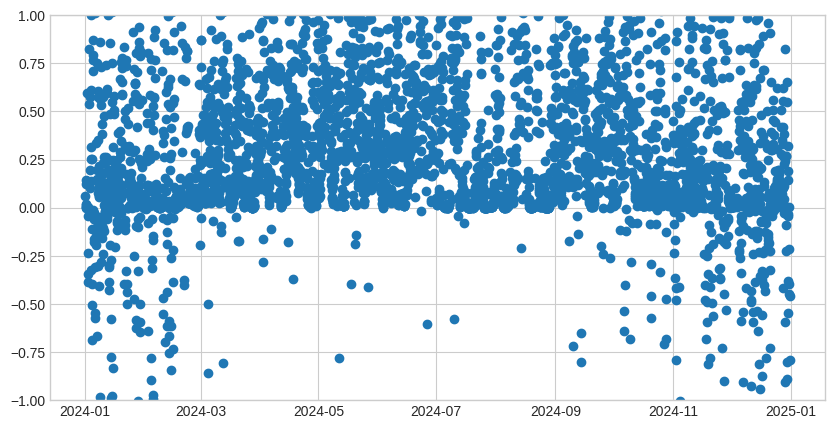

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(fluxes_SFC.resample('2h').mean().index, fluxes_SFC['(z-d)/L'].resample('2h').mean())
plt.ylim(-1,1)

In [4]:
MO_data=pd.read_csv(folder+'MO_fluxes_2024.csv', parse_dates=['time'], index_col=['time'])
MO_data


u_star   Tw_flux       qw_flux      zeta     psi_m  \
time                                                                        
2024-02-01 00:00:00  0.380470 -0.034062 -1.644415e-06 -0.447838  0.721486   
2024-02-01 00:10:00  0.400685 -0.033144 -1.289170e-06 -0.387363  0.664833   
2024-02-01 00:20:00  0.479944 -0.034499 -9.542329e-07 -0.246147  0.505756   
2024-02-01 00:30:00  0.373378 -0.028531 -9.157018e-07 -0.420970  0.696987   
2024-02-01 00:40:00  0.392571 -0.025676 -1.869329e-07 -0.332107  0.607767   
...                       ...       ...           ...       ...       ...   
2024-12-01 23:10:00  0.471875 -0.021808  1.866197e-07 -0.127959  0.324321   
2024-12-01 23:20:00  0.472125 -0.022359  1.356278e-07 -0.129252  0.326689   
2024-12-01 23:30:00  0.461051 -0.025033 -2.473638e-07 -0.153264  0.368789   
2024-12-01 23:40:00  0.412258 -0.028101 -7.961635e-07 -0.232141  0.487206   
2024-12-01 23:50:00  0.423256 -0.025825 -4.193635e-07 -0.198301  0.439587   

                        psi_s  converged        LE          H  
time                                                           
2024-02-01 00:00:00  1.133268        1.0 -5.296834 -38.831224  
2024-02-01 00:10:00  1.054724        1.0 -4.145949 -37.725626  
2024-02-01 00:20:00  0.828598        1.0 -3.062823 -39.192755  
2024-02-01 00:30:00  1.099416        1.0 -2.942306 -32.447122  
2024-02-01 00:40:00  0.974622        1.0 -0.600194 -29.178666  
...                       ...        ...       ...        ...  
2024-12-01 23:10:00  0.557264        1.0  0.605640 -25.045615  
2024-12-01 23:20:00  0.560926        1.0  0.440453 -25.694826  
2024-12-01 23:30:00  0.625431        1.0 -0.803927 -28.790134  
2024-12-01 23:40:00  0.801603        1.0 -2.592477 -32.379410  
2024-12-01 23:50:00  0.731603        1.0 -1.365100 -29.747284  

[43920 rows x 9 columns]

In [ ]:
"""PROCESS SPC SCRIPTS AND SAVE TO ONE MINUTE FILES"""
SPC_folder = '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed'
SPC_filenames = []
SPC_all = pd.DataFrame()
file_list = sorted(glob.glob(os.path.join(SPC_folder, '*.txt')))
batch_size = 25

for i in range(0, len(file_list), batch_size):
    batch_files = file_list[i:i + batch_size]
    # SPC_filenames.append(file)
    print(batch_files)
    SPC = getNormalizedData(batch_files, slowdata_cleaned)
    SPC = SPC.resample('1min').mean()
    SPC.to_csv('/home/engbers/Documents/PhD/EC_data_convert/SPC/SPC_OneMin_processed/'+batch_files[0].split('/')[-1], index=True, sep='\t')
    # SPC_all = pd.concat([SPC_all, SPC], ignore_index=True)



['/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240220_082027Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240221_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240222_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240223_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240224_000001Snow-04-1sec-org-0000.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240224_084612Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240225_000001Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240226_000001Snow-04-1sec-org-0001.txt', '/home/engbers/Documents/PhD/EC_data_convert/SPC/20241223_SFC/processed/U240227_000001S

KeyboardInterrupt: 

In [5]:
"""READ SPC FILES"""
SPC_filenames = []
SPC_folder='/home/engbers/Documents/PhD/EC_data_convert/SPC/SPC_OneMin_processed/'
file_list = sorted(glob.glob(os.path.join(SPC_folder, '*.txt')))
for file in file_list:
    SPC_filenames.append(file)
SPC=getRawData(SPC_filenames)


In [6]:
"""ADD POT TEMPERATURE AND TI, THEN SYNCHRONIZE NANS"""
p0 = 100000  # Reference pressure in Pa (1000 hPa)
R_d_over_cp = 0.286  # Rd / cp for dry air
# Compute potential temperature (theta
fluxes_SFC['theta'] = fluxes_SFC['air_temperature'] * (p0 / fluxes_SFC['air_pressure'])**R_d_over_cp
fluxes_SFC['theta_v'] = fluxes_SFC['theta'] * (1 + 0.61 * fluxes_SFC['specific_humidity'])
fluxes_16m['theta'] = fluxes_16m['air_temperature'] * (p0 / fluxes_16m['air_pressure'])**R_d_over_cp
fluxes_16m['theta_v'] = fluxes_16m['theta'] * (1 + 0.61 * fluxes_16m['specific_humidity'])
fluxes_26m['theta'] = fluxes_26m['air_temperature'] * (p0 / fluxes_26m['air_pressure'])**R_d_over_cp
fluxes_26m['theta_v'] = fluxes_26m['theta'] * (1 + 0.61 * fluxes_26m['specific_humidity'])

fluxes_SFC['TI']= np.sqrt(fluxes_SFC['u_var']**2 + fluxes_SFC['v_var']**2 + fluxes_SFC['w_var']**2) / fluxes_SFC['wind_speed']
fluxes_16m['TI']= np.sqrt(fluxes_16m['u_var']**2 + fluxes_16m['v_var']**2 + fluxes_16m['w_var']**2) / fluxes_16m['wind_speed']
fluxes_26m['TI']= np.sqrt(fluxes_26m['u_var']**2 + fluxes_26m['v_var']**2 + fluxes_26m['w_var']**2) / fluxes_26m['wind_speed']

fluxes_SFC['TI_w']=  np.sqrt(fluxes_SFC['w_var']) / fluxes_SFC['wind_speed']
fluxes_16m['TI_w']=  np.sqrt(fluxes_16m['w_var']) / fluxes_16m['wind_speed']
fluxes_26m['TI_w']=  np.sqrt(fluxes_26m['w_var']) / fluxes_26m['wind_speed']

def synchronize_nans_all_columns(*dfs):
    """
    Synchronizes NaN values across multiple DataFrames for all columns based on their timestamps.

    Parameters:
        *dfs: Variable number of pandas DataFrames to synchronize.

    Returns:
        A tuple of DataFrames with synchronized NaN values for all columns.
    """
    # Create a continuous datetime index from start to end with the desired frequency
    for df in dfs:
        df=resample_with_threshold(df, '30min', True, '30min', 80)
    continuous_index = pd.date_range(start=start, end=end, freq='30min')
    
    # Reindex each DataFrame to ensure continuity and fill missing timestamps with NaN
    synced_dfs = [df.reindex(continuous_index) for df in dfs]
    
    # Synchronize NaN values across all columns
    for i, df in enumerate(synced_dfs):
        for col in df.columns:
            for other_df in synced_dfs:
                if col in other_df.columns:
                    df.loc[other_df[col].isna(), col] = np.nan
    
    return tuple(synced_dfs)

# Example usage
fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced = synchronize_nans_all_columns(fluxes_SFC, fluxes_16m, fluxes_26m)

"""COMPUTE RICHARDSON BULK NUMBER"""
g=9.81

delta_theta_v=fluxes_26m_synced['theta'] - fluxes_SFC_synced['theta']
dz=26-2
T_v=resample_with_threshold(fluxes_SFC['air_temperature']*(1 + 0.61 * fluxes_SFC['specific_humidity']),'30min')
delta_u=fluxes_26m_synced['u_unrot'] - fluxes_SFC_synced['u_unrot']
delta_v=fluxes_26m_synced['v_unrot'] - fluxes_SFC_synced['v_unrot']
Ri_b= (g*delta_theta_v*dz) / (T_v*(delta_u**2 + delta_v**2))
fluxes_26m_synced['Ri_b'] = Ri_b


delta_theta_v=slowdata_cleaned['TA'] +273.15 - slowdata_cleaned['SFTempK']
Ri_b_surf = g * 1 * delta_theta_v / (slowdata_cleaned['SFTempK'] * slowdata_cleaned['WS2_Avg']**2)
Ri_b_surf = Ri_b_surf.where(slowdata_cleaned['WS2_Avg'] > 0.4)
slowdata_cleaned['Ri_b_surf'] = Ri_b_surf

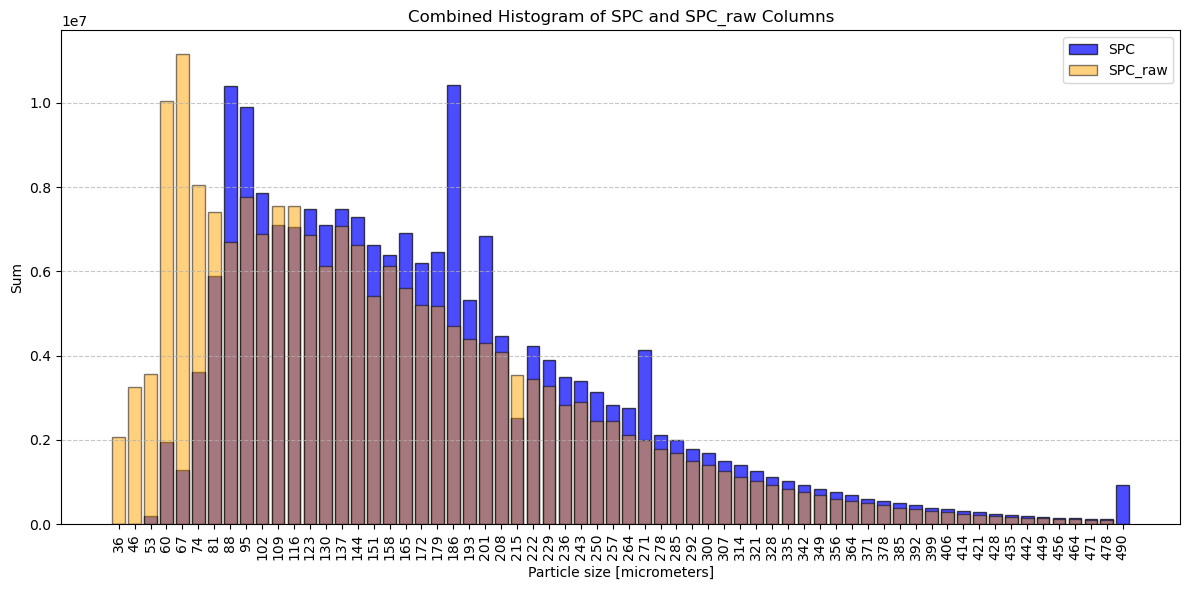

In [ ]:
column_sums_SPC = []
column_sums_SPC_raw = []

# Calculate the sum of all values for each column from index 1 to -2 for SPC
for column in SPC.columns[1:-1]:
    column_sums_SPC.append(SPC[column].sum())

# Calculate the sum of all values for each column from index 1 to -2 for SPC_raw
for column in SPC_raw.columns[2:-1]:
    column_sums_SPC_raw.append(SPC_raw[column].sum())

# Create the combined histogram
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(column_sums_SPC) + 1), column_sums_SPC, color='blue', edgecolor='black', alpha=0.7, label='SPC')
plt.bar(range(1, len(column_sums_SPC_raw) + 1), column_sums_SPC_raw, color='orange', edgecolor='black', alpha=0.5, label='SPC_raw')
plt.title("Combined Histogram of SPC and SPC_raw Columns")
plt.xlabel("Particle size [micrometers]")
plt.ylabel("Sum")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, len(column_sums_SPC) + 1), SPC.columns[1:-1], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

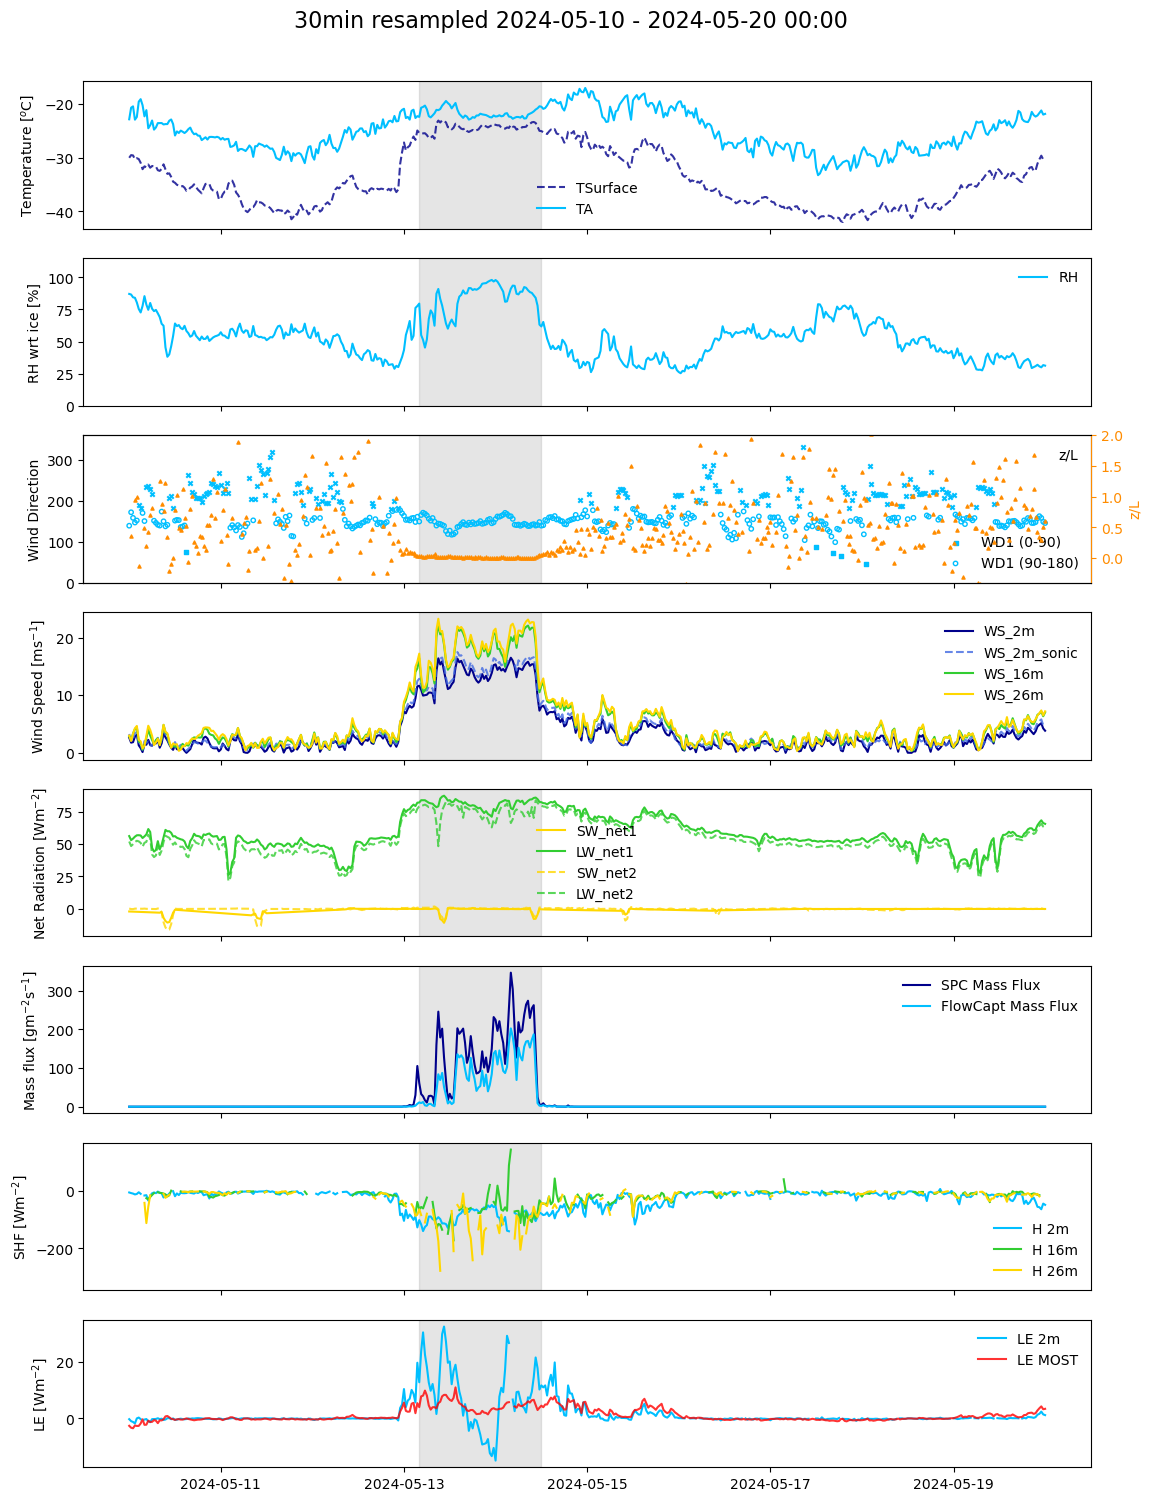

In [8]:
sensor='SFC'
start = '2024-05-10'
end = '2024-05-20 00:00'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, MO=MO_data, resample_time='30min', interpolate=True, interp_time='20min')
plt.savefig('/home/engbers/Documents/PhD/Candidacy exam/plots/blowing_snow_event_fluxes.pdf', dpi=300, bbox_inches='tight')

(<Figure size 1300x1800 with 10 Axes>,
 array([<Axes: ylabel='Temperature [$^o$C]'>,
        <Axes: ylabel='RH wrt ice [%]'>, <Axes: ylabel='Wind Direction'>,
        <Axes: ylabel='Wind Speed [ms$^{-1}$]'>,
        <Axes: ylabel='Net Radiation [Wm$^{-2}$]'>,
        <Axes: ylabel='Relative snow height [m]'>,
        <Axes: ylabel='Mass flux [gm$^{-2}$s$^{-1}$]'>,
        <Axes: ylabel='SHF [Wm$^{-2}$]'>, <Axes: ylabel='LE [Wm$^{-2}$]'>],
       dtype=object))

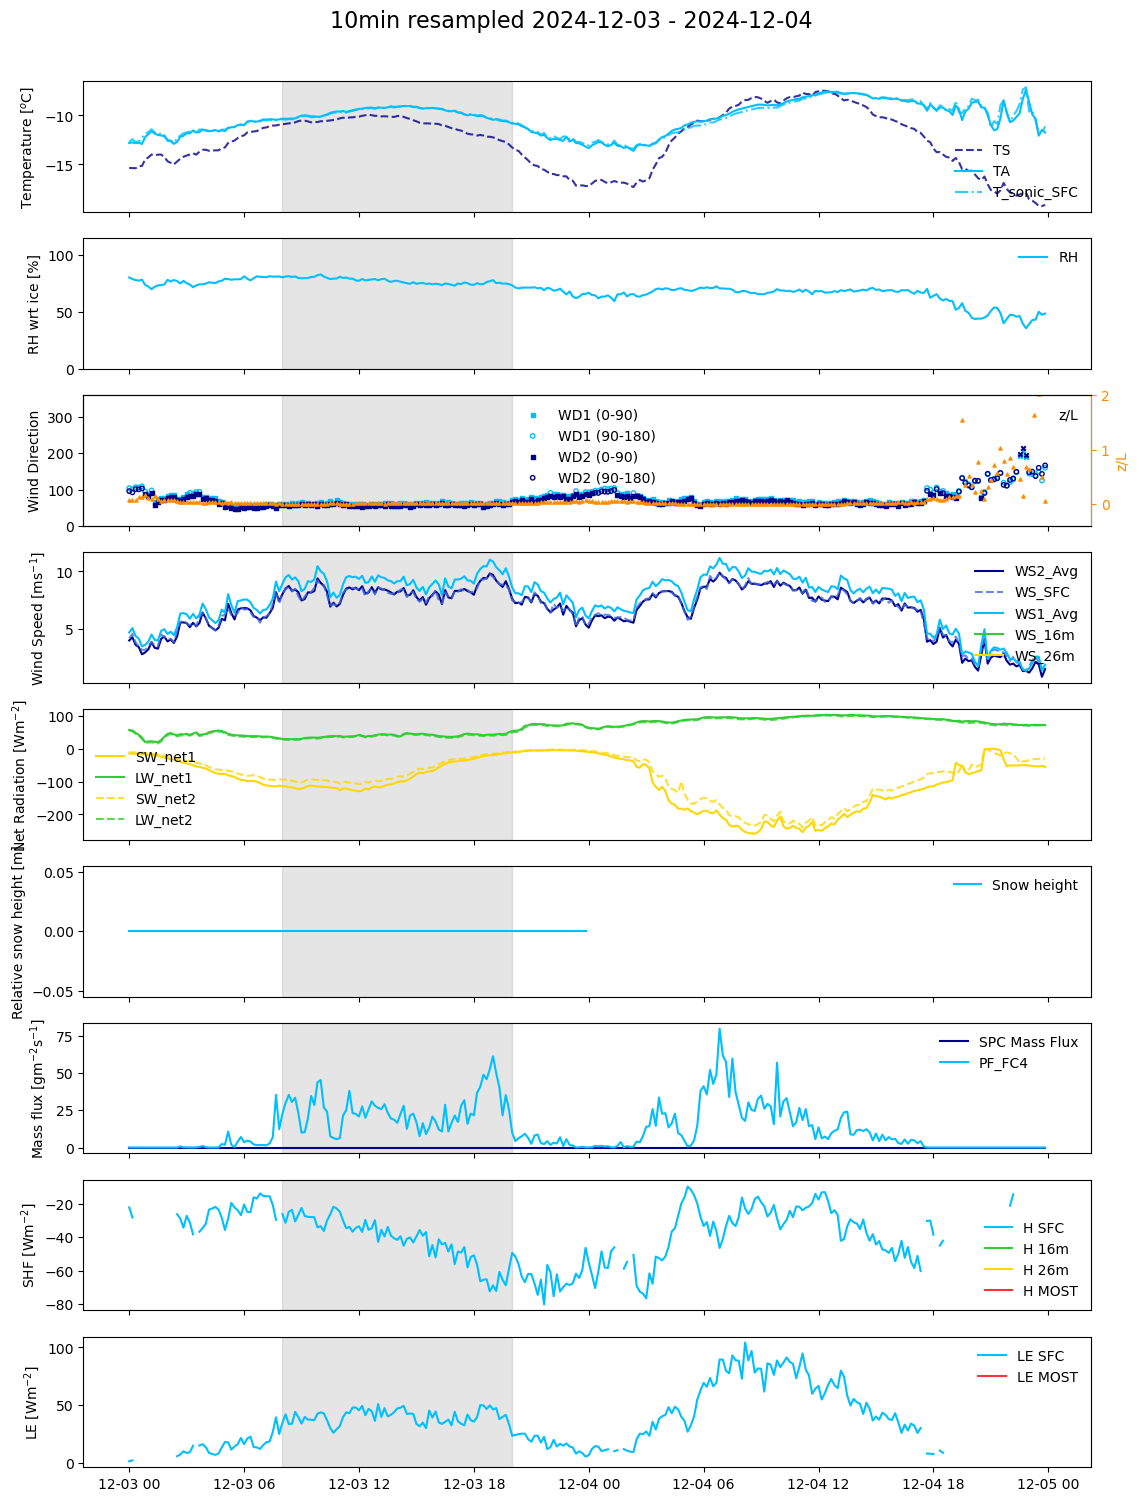

In [39]:
sensor='SFC'
start = '2024-12-03'
end = '2024-12-04'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, MO=MO_data)

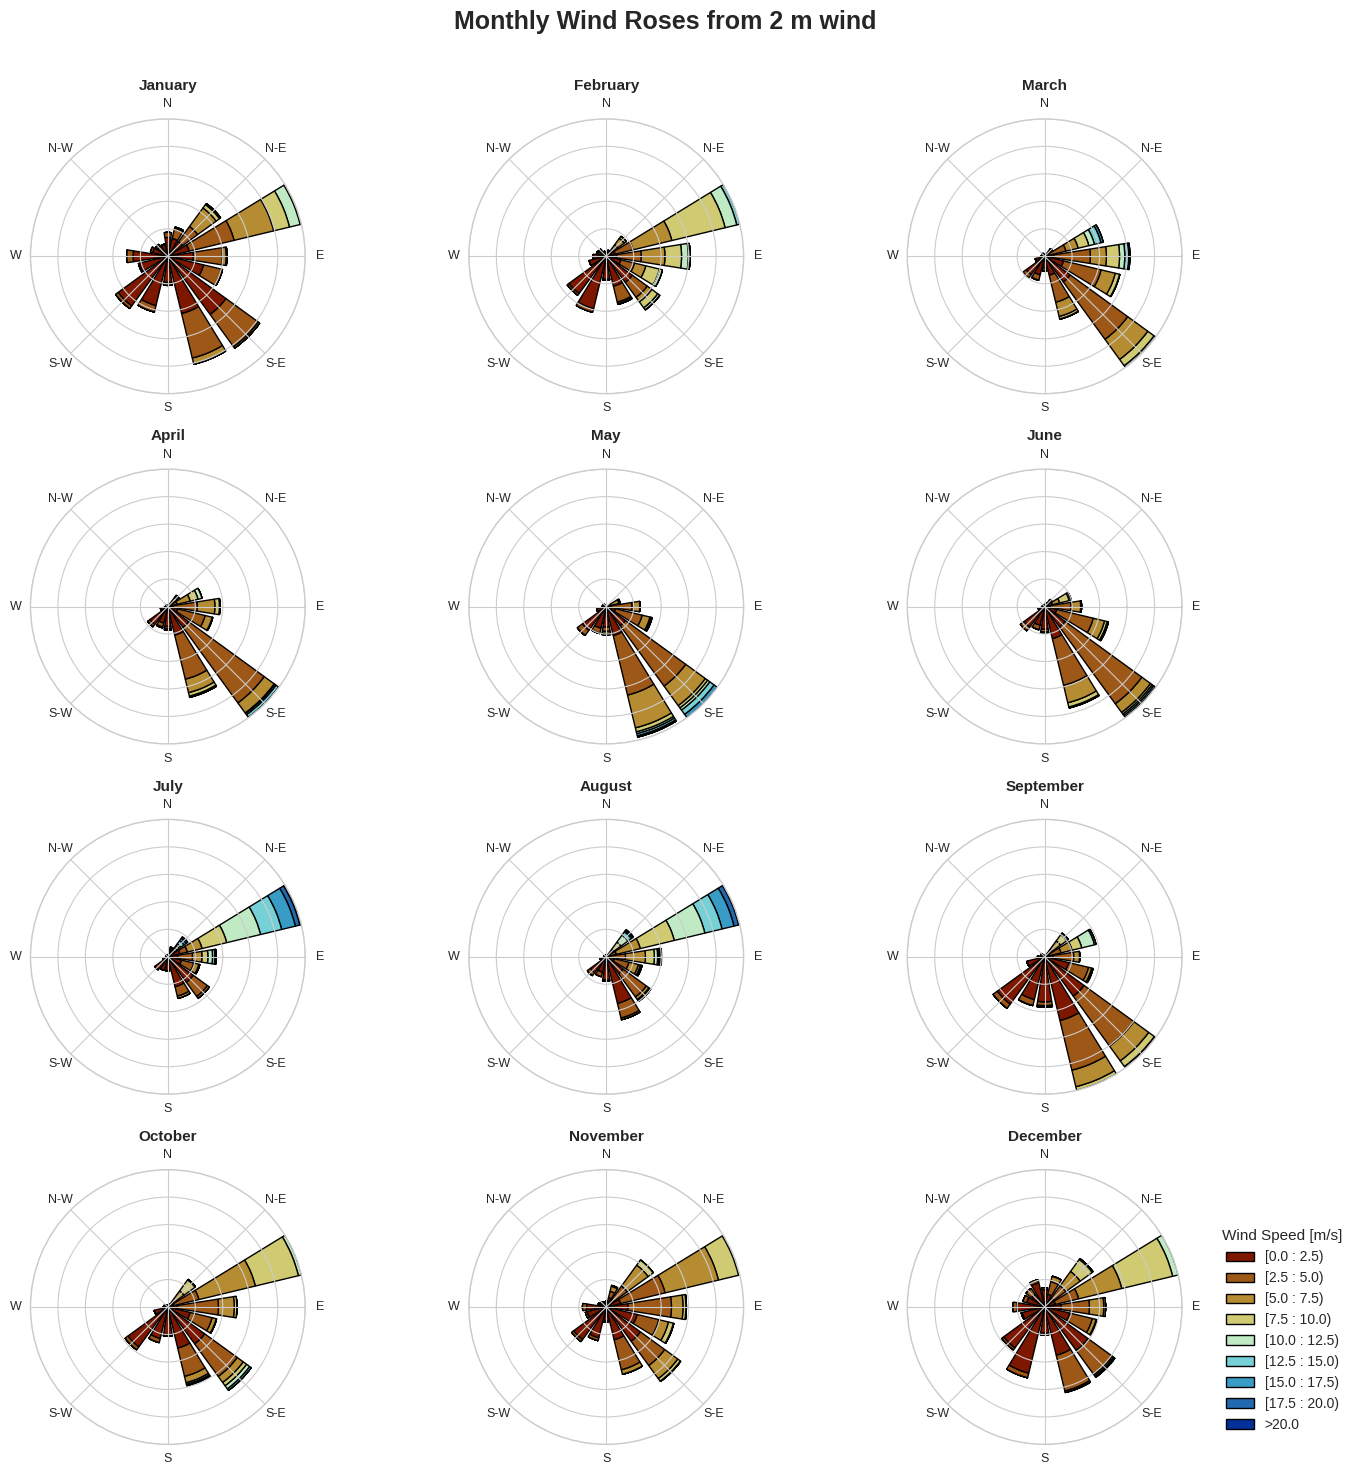

In [ ]:
# Add a new column for the month name and month number if not already present
slowdata_cleaned['Month_Name'] = slowdata_cleaned.index.month_name()
slowdata_cleaned['Month'] = slowdata_cleaned.index.month

# Set up the figure and scientific style
plt.style.use('seaborn-v0_8-whitegrid')  # Use the correct style name for seaborn whitegrid
fig = plt.figure(figsize=(15, 15))
cmap = cm.roma  # Use a perceptually uniform colormap

# Define wind speed bins and labels
ws_bins = np.arange(0, 20.1, 2.5)
ws_labels = [f"{ws_bins[i]:.1f}-{ws_bins[i+1]:.1f}" for i in range(len(ws_bins)-1)]

for month in range(1, 13):
    ax = fig.add_subplot(4, 3, month, projection='windrose')
    monthly_data = slowdata_cleaned[slowdata_cleaned['Month'] == month]
    bars = ax.bar(
        monthly_data['WD2'],
        monthly_data['WS2_Avg'],
        bins=ws_bins,
        normed=True,
        opening=0.8,
        edgecolor='black',
        cmap=cmap
    )
    # Set scientific axis labels and title
    ax.set_title(f"{slowdata_cleaned['Month_Name'][slowdata_cleaned['Month'] == month].iloc[0]}", fontsize=11, weight='bold')
    ax.set_yticklabels([])
    # Set 0° (North) at the top
    # ax.set_theta_zero_location('N')
    # Set the direction so that angles increase clockwise (North at top, East at right)
    # ax.set_theta_direction(1)
    # ax.set_xticklabels([f"{int(angle)}°" for angle in np.arange(0, 360, 45)], fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=9)
    # Add legend to each subplot
    if month == 12:
        l = ax.legend(
            title="Wind Speed [m/s]",
            bbox_to_anchor=(1.1, 0.0),
            loc='lower left',
            fontsize=10,
            title_fontsize=11,
            frameon=False
        )

plt.suptitle('Monthly Wind Roses from 2 m wind', fontsize=18, y=0.98, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('./plots/WD2_SFC_slowdata_windrose_year.png', bbox_inches='tight', dpi=300)
plt.show()

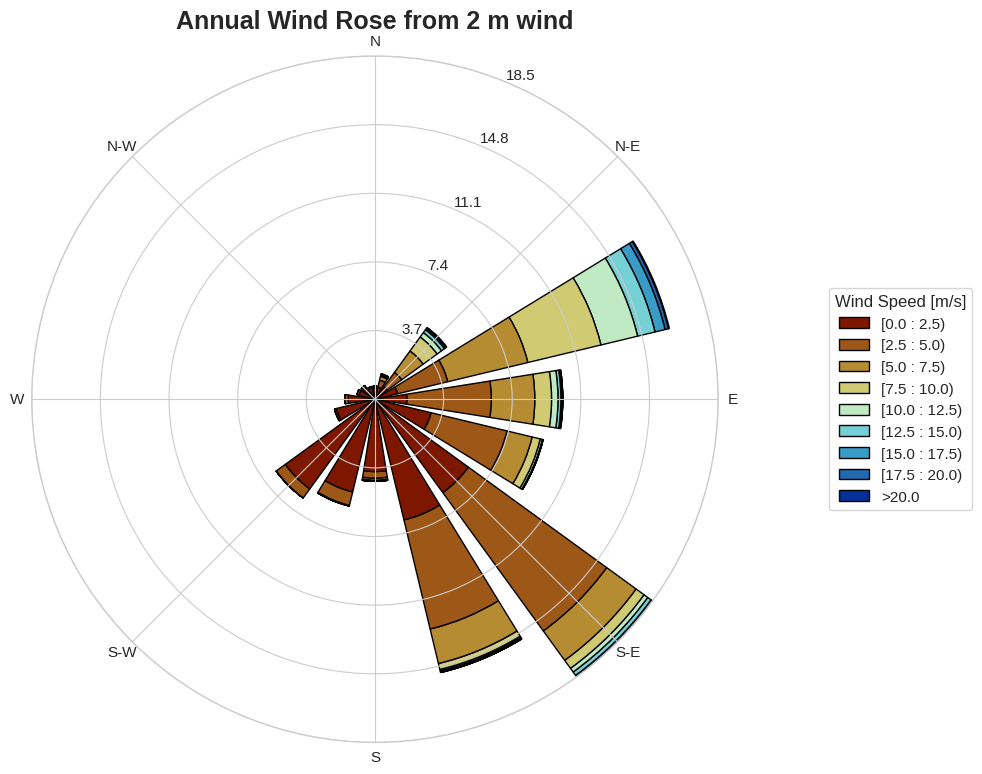

In [ ]:
# Create a windrose for the entire year
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='windrose')

# Use the colormap
cmap = cm.roma

# Define wind speed bins and labels
ws_bins = np.arange(0, 20.1, 2.5)

# Create the windrose for the entire year
bars = ax.bar(
    slowdata_cleaned['WD2'],
    slowdata_cleaned['WS2_Avg'],
    bins=ws_bins,
    normed=True,
    opening=0.8,
    edgecolor='black',
    cmap=cmap
)

# Set title and labels
ax.set_title('Annual Wind Rose from 2 m wind', fontsize=18, weight='bold', pad=20)
ax.tick_params(axis='both', which='major', labelsize=11)

# Add legend
ax.legend(
    title="Wind Speed [m/s]",
    bbox_to_anchor=(1.15, 0.5),
    loc='center left',
    fontsize=11,
    title_fontsize=12,
    frameon=True
)

plt.tight_layout()
# plt.savefig('./plots/WD2_SFC_slowdata_windrose_annual.png', bbox_inches='tight', dpi=300)
# Alternative path for presentation:
# plt.savefig('/home/engbers/Documents/PhD/Candidacy exam/Candidacy_presentation/figures/wind_rose_year.png', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_583642/2843917818.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)
/tmp/ipykernel_583642/2843917818.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)
/tmp/ipykernel_583642/2843917818.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)
/tmp/ipykernel_583642/2843917818.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)


(0.0, 10.0)

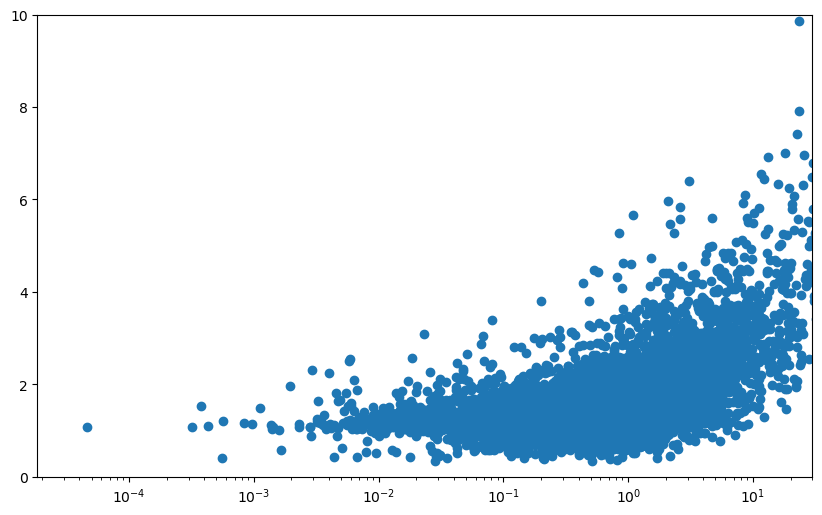

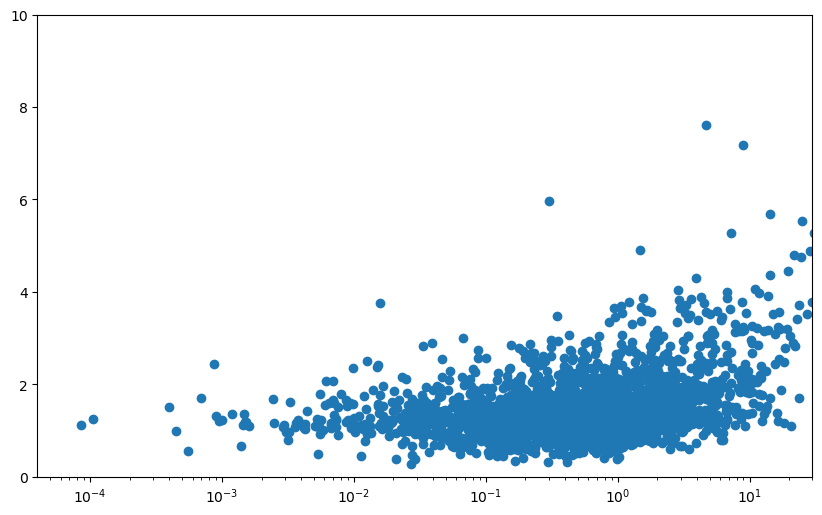

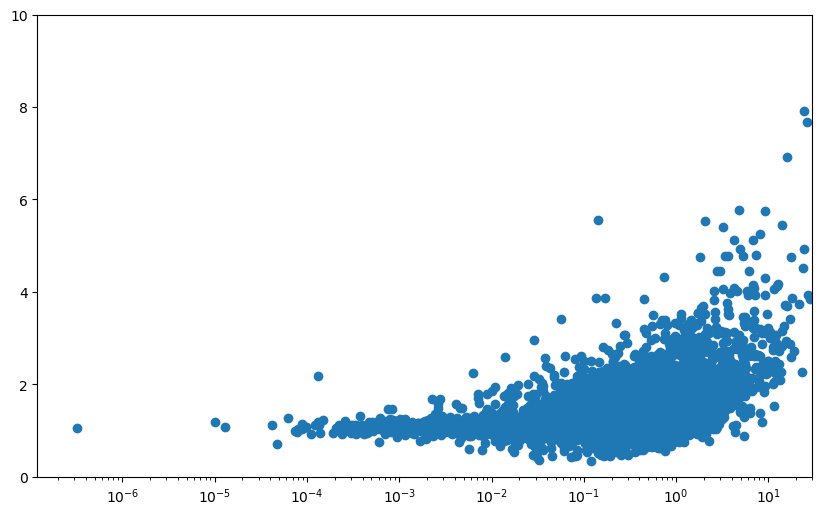

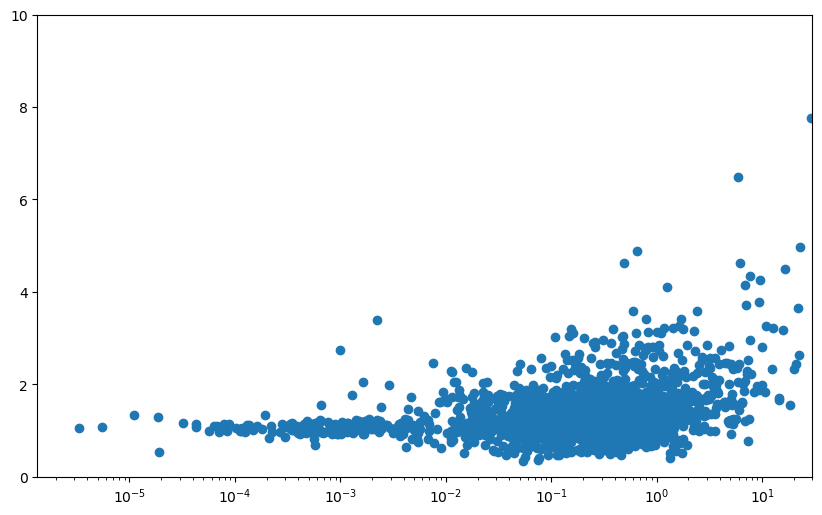

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.scatter(fluxes_16m_synced['(z-d)/L'], np.sqrt(fluxes_16m_synced['w_var'])/fluxes_16m_synced['u*'])
plt.xscale('log')
plt.xlim(0,30)
plt.ylim(0,10)
plt.figure(figsize=(10, 6)) 
plt.scatter(-fluxes_16m_synced['(z-d)/L'], np.sqrt(fluxes_16m_synced['w_var'])/fluxes_16m_synced['u*'])
plt.xscale('log')
plt.xlim(0,30)
plt.ylim(0,10)
plt.figure(figsize=(10, 6)) 
plt.scatter(fluxes_SFC_synced['(z-d)/L'], np.sqrt(fluxes_SFC_synced['w_var'])/fluxes_SFC_synced['u*'])
plt.xscale('log')
plt.xlim(0,30)
plt.ylim(0,10)
plt.figure(figsize=(10, 6)) 
plt.scatter(-fluxes_SFC_synced['(z-d)/L'], np.sqrt(fluxes_SFC_synced['w_var'])/fluxes_SFC_synced['u*'])
plt.xscale('log')
plt.xlim(0,30)
plt.ylim(0,10)


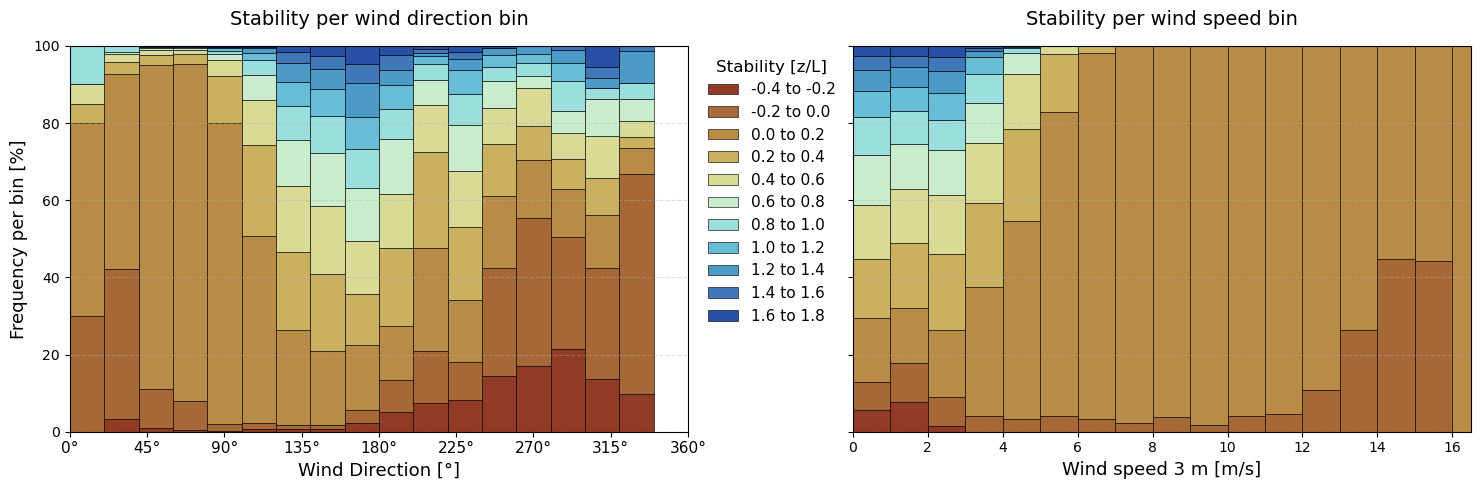

In [ ]:
stability_bins = np.arange(-0.4, 1.9, 0.2)
stability_labels = [f"{stability_bins[i]:.1f} to {stability_bins[i+1]:.1f}" for i in range(len(stability_bins)-1)]

# Align wind direction and stability index
wd = resample_with_threshold(slowdata_cleaned['WD2'], '30min').reindex(fluxes_SFC.index, method='nearest')
stability = resample_with_threshold(fluxes_SFC['(z-d)/L'], '30min')

# Prepare wind direction bins
wd_bins = np.arange(0, 361, 20)  # 20-degree bins
wd_centers = wd_bins[:-1] + np.diff(wd_bins) / 2

# Prepare wind speed bins
ws_bins = np.arange(0, 20, 1)
ws_centers = ws_bins[:-1] + np.diff(ws_bins) / 2
ws2 = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '30min').reindex(fluxes_SFC.index, method='nearest')

# Initialize matrices to hold counts for each (stability, wind direction/wind speed) bin
counts_matrix_wd = np.zeros((len(stability_bins)-1, len(wd_bins)-1))
counts_matrix_ws = np.zeros((len(stability_bins)-1, len(ws_bins)-1))

# Fill the matrices
for i, (left, right) in enumerate(zip(stability_bins[:-1], stability_bins[1:])):
    mask = (stability >= left) & (stability < right)
    # Wind direction
    wd_class = wd[mask & wd.notna()]
    counts_wd, _ = np.histogram(wd_class, bins=wd_bins)
    counts_matrix_wd[i, :] = counts_wd
    # Wind speed
    ws_class = ws2[mask & ws2.notna()]
    counts_ws, _ = np.histogram(ws_class, bins=ws_bins)
    counts_matrix_ws[i, :] = counts_ws

# Normalize so that for each bin, the sum over stability bins is 100%
col_sums_wd = counts_matrix_wd.sum(axis=0)
percent_matrix_wd = np.zeros_like(counts_matrix_wd)
for j in range(len(wd_bins)-1):
    if col_sums_wd[j] > 0:
        percent_matrix_wd[:, j] = 100 * counts_matrix_wd[:, j] / col_sums_wd[j]

col_sums_ws = counts_matrix_ws.sum(axis=0)
percent_matrix_ws = np.zeros_like(counts_matrix_ws)
for j in range(len(ws_bins)-1):
    if col_sums_ws[j] > 0:
        percent_matrix_ws[:, j] = 100 * counts_matrix_ws[:, j] / col_sums_ws[j]

# Plot as grouped bar chart with scientific style
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
cmap = cm.roma
colors = cmap(np.linspace(0, 1, len(stability_labels)))

# Wind direction subplot
bottom = np.zeros(len(wd_bins)-1)
for i, (label, color) in enumerate(zip(stability_labels, colors)):
    axes[0].bar(
        wd_centers, percent_matrix_wd[i], width=np.diff(wd_bins), bottom=bottom,
        alpha=0.85, align='center', label=label, color=color, edgecolor='black', linewidth=0.5
    )
    bottom += percent_matrix_wd[i]
axes[0].set_xlabel('Wind Direction [°]', fontsize=13)
axes[0].set_ylabel('Frequency per bin [%]', fontsize=13)
axes[0].set_title('Stability per wind direction bin', fontsize=14, pad=15)
axes[0].set_xticks(np.arange(0, 361, 45))
axes[0].set_xticklabels([f"{int(x)}°" for x in np.arange(0, 361, 45)], fontsize=11)
axes[0].set_xlim(0, 360)
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
axes[0].legend(
    title='Stability [z/L]', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=11, title_fontsize=12, frameon=False
)

# Wind speed subplot
bottom = np.zeros(len(ws_bins)-1)
for i, (label, color) in enumerate(zip(stability_labels, colors)):
    axes[1].bar(
        ws_centers, percent_matrix_ws[i], width=np.diff(ws_bins), bottom=bottom,
        alpha=0.85, align='center', label=label, color=color, edgecolor='black', linewidth=0.5
    )
    bottom += percent_matrix_ws[i]
axes[1].set_xlabel('Wind speed 3 m [m/s]', fontsize=13)
axes[1].set_title('Stability per wind speed bin', fontsize=14, pad=15)
axes[1].set_xticks(np.arange(0, 18, 2))
axes[1].set_xlim(0, 18)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

plt.tight_layout(rect=[0, 0, 0.87, 1])
plt.subplots_adjust(right=0.82)
axes[1].set_xlim(0, ws_centers[col_sums_ws > 0][-2] + 1)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/10_wdir_stab.png', bbox_inches='tight', dpi=300)

plt.show()

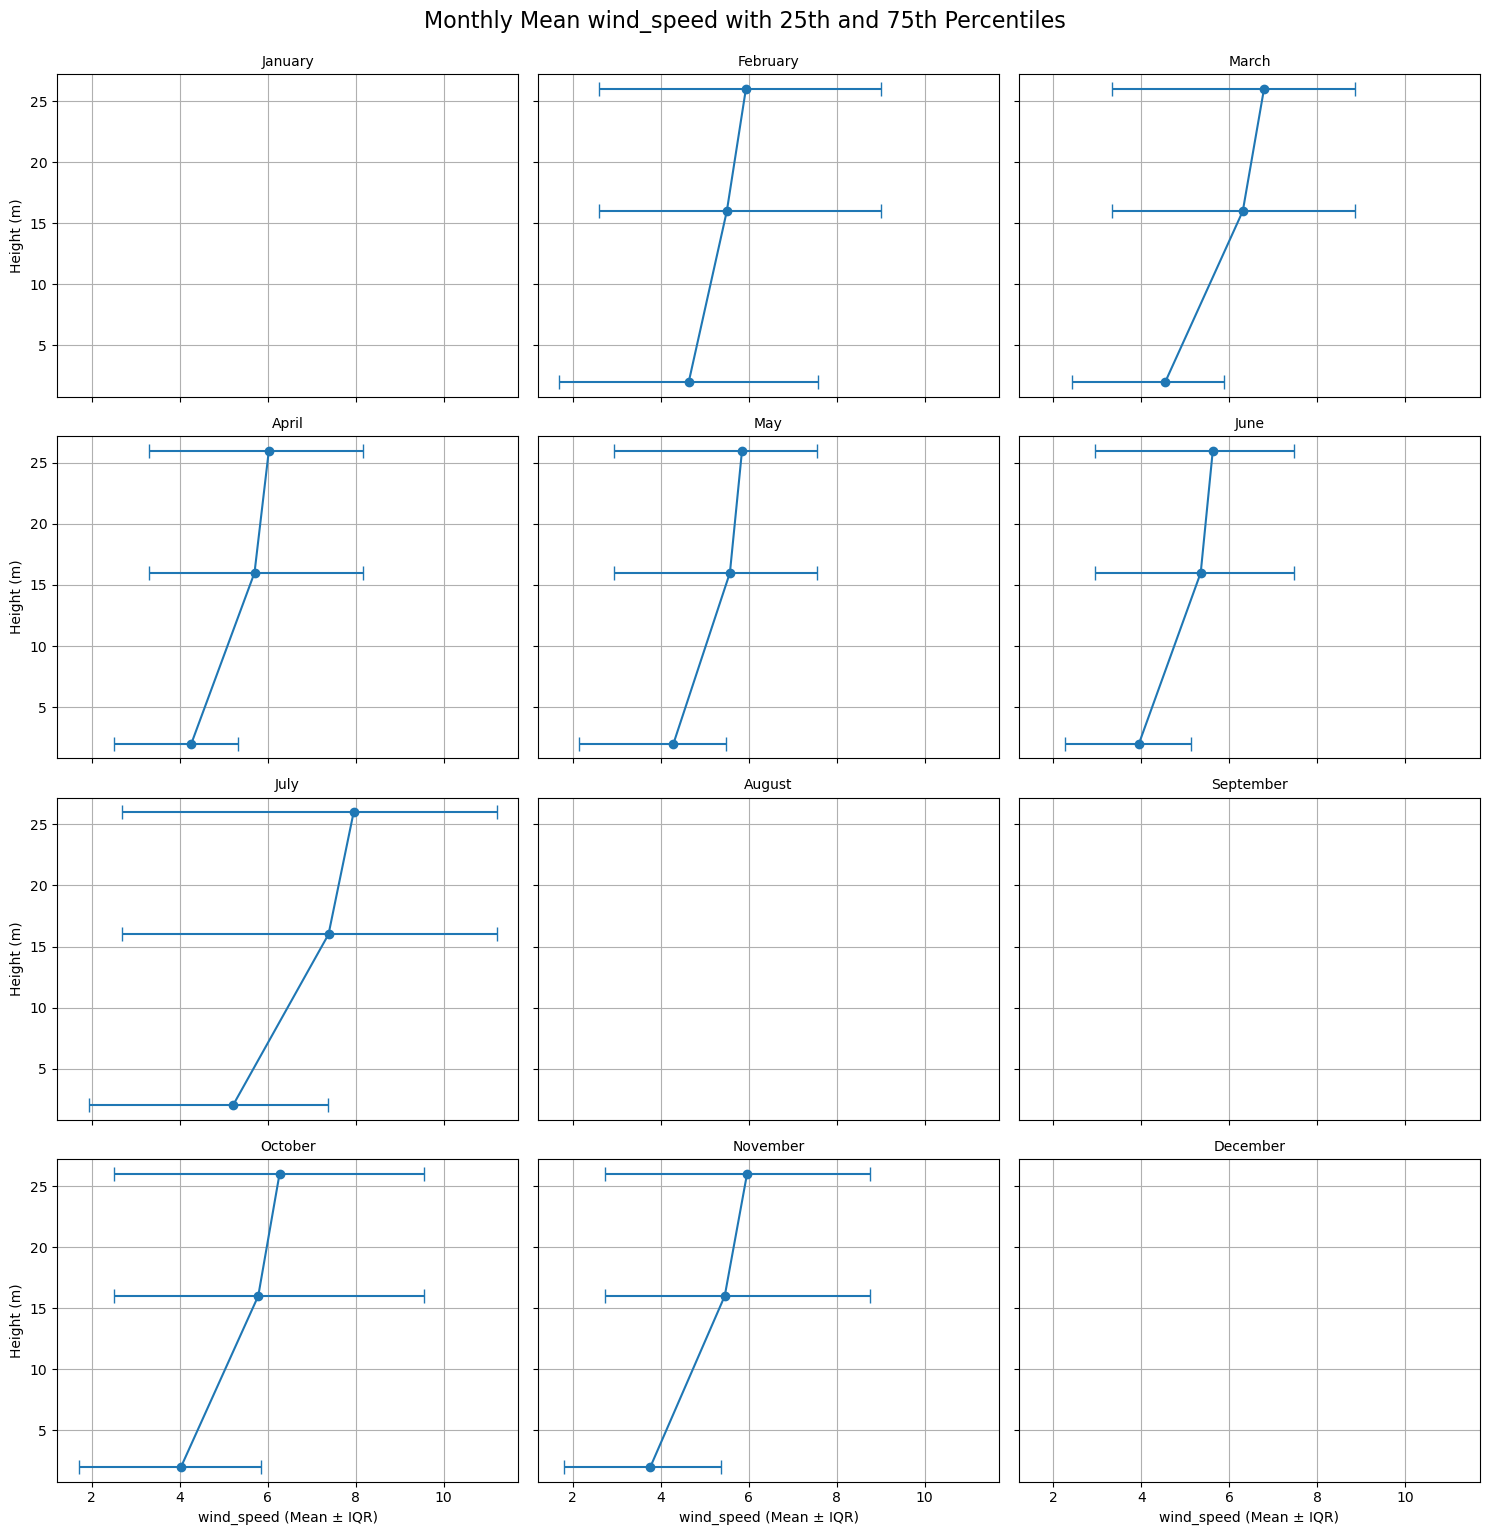

In [ ]:
def plot_monthly_mean_H(fluxes_SFC, fluxes_16m, fluxes_26m, heights, variable):
    """
    Plots the monthly mean H with 25th and 75th percentiles for different heights.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        resample_func (function): Function to resample data with a threshold.
    """
    # Add a 'Month' column to group data by month
    fluxes_SFC['Month'] = fluxes_SFC.index.month
    fluxes_16m['Month'] = fluxes_16m.index.month
    fluxes_26m['Month'] = fluxes_26m.index.month

    # Add a 'Month_Name' column to include the name of the month
    fluxes_SFC['Month_Name'] = fluxes_SFC.index.month_name()
    fluxes_16m['Month_Name'] = fluxes_16m.index.month_name()
    fluxes_26m['Month_Name'] = fluxes_26m.index.month_name()

    # Initialize the figure
    fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=True, sharex=True)
    axes = axes.flatten()

    # Loop through each month and create subplots
    for month in range(1, 13):
        ax = axes[month - 1]
        
        # Filter data for the current month
        sfc_month = fluxes_SFC[fluxes_SFC['Month'] == month][variable]
        m16_month = fluxes_16m[fluxes_16m['Month'] == month][variable]
        m26_month = fluxes_26m[fluxes_26m['Month'] == month][variable]
        
        # Calculate mean, 25th, and 75th percentiles
        means = [
            resample_with_threshold(sfc_month, '1ME', True, '30min', 70).mean() if not sfc_month.empty else np.nan, 
            resample_with_threshold(m16_month, '1ME', True, '3h', 70).mean() if not m16_month.empty else np.nan, 
            resample_with_threshold(m26_month, '1ME', True, '3h', 70).mean() if not m26_month.empty else np.nan
        ]
        percentiles_25 = [sfc_month.quantile(0.25), m16_month.quantile(0.25), m16_month.quantile(0.25)]
        percentiles_75 = [sfc_month.quantile(0.75), m26_month.quantile(0.75), m26_month.quantile(0.75)]
        
        # Plot the means with whiskers
        ax.errorbar(
            means, heights, 
            xerr=[np.array(means) - np.array(percentiles_25), np.array(percentiles_75) - np.array(means)], 
            fmt='o-', capsize=5, label='H'
        )
        
        # Set titles and labels
        if not fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].empty:
            ax.set_title(f"{fluxes_SFC['Month_Name'][fluxes_SFC['Month'] == month].iloc[0]}", fontsize=10)
        else:
            ax.set_title(f"Month {month}", fontsize=10)
        if month % 3 == 1:  # First column
            ax.set_ylabel("Height (m)")
        if month > 9:  # Last row
            ax.set_xlabel(f"{variable} (Mean ± IQR)")
        ax.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.suptitle(f"Monthly Mean {variable} with 25th and 75th Percentiles", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_monthly_mean_H(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, heights=[2, 16, 26], variable='wind_speed')

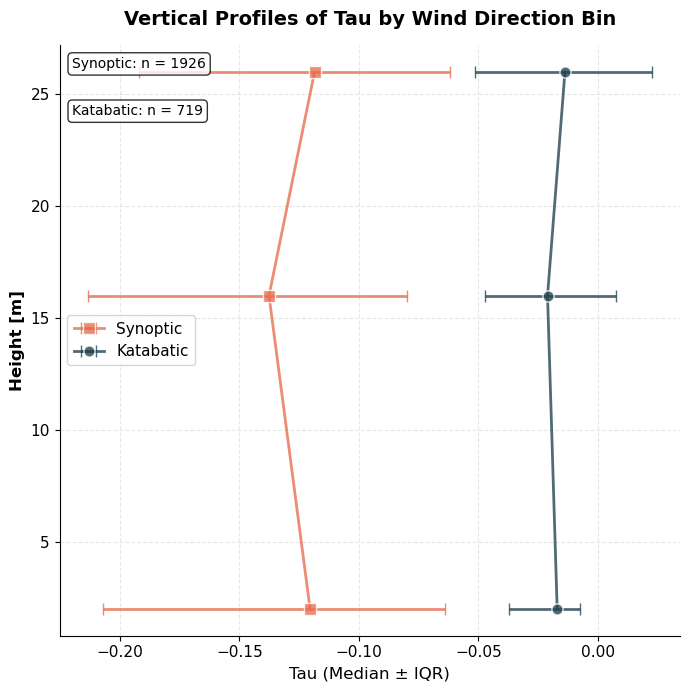

In [ ]:
def plot_wind_direction_binned(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variables):
    """
    Plots the median and IQR for different heights, grouped into wind direction bins,
    for each variable in `variables`. Each variable gets its own subplot, and both
    wind direction bins are shown in the same subplot, using scientific styling.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        slowdata (pd.DataFrame): DataFrame containing wind direction data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variables (list): List of variables to plot.
    """

    # Define wind direction bins (e.g., 45-110, 110-180)
    bins = [45, 110, 180]
    bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}°" for i in range(len(bins) - 1)]
    bin_labels=['Synoptic', 'Katabatic']
    slowdata_mean = slowdata.resample('30min').mean()
    slowdata_mean['Wind_Bin'] = pd.cut(slowdata_mean['WD2'], bins=bins, labels=bin_labels, include_lowest=True)

    # Add wind direction bins to flux data
    fluxes_SFC = fluxes_SFC.copy()
    fluxes_16m = fluxes_16m.copy()
    fluxes_26m = fluxes_26m.copy()
    fluxes_SFC['Wind_Bin'] = slowdata_mean['Wind_Bin']
    fluxes_16m['Wind_Bin'] = slowdata_mean['Wind_Bin']
    fluxes_26m['Wind_Bin'] = slowdata_mean['Wind_Bin']

    n_vars = len(variables)
    fig, axes = plt.subplots(1, n_vars, figsize=(7 * n_vars, 7), sharey=True)
    if n_vars == 1:
        axes = [axes]

    # Define colors and markers for each wind direction bin
    wind_bin_styles = {
        bin_labels[0]: {'color': '#e76f51',  'marker': 's', 'label': f'{bin_labels[0]}'},  # dark blue-green
        bin_labels[1]: {'color': '#264653', 'marker': 'o', 'label': f'{bin_labels[1]}'},  # scientific red-orange
    }

    for ax, variable in zip(axes, variables):
        for j, wind_bin in enumerate(bin_labels):
            style = wind_bin_styles[wind_bin]
            # Filter data for the current wind direction bin
            sfc_bin = fluxes_SFC[fluxes_SFC['Wind_Bin'] == wind_bin][variable]
            m16_bin = fluxes_16m[fluxes_16m['Wind_Bin'] == wind_bin][variable]
            m26_bin = fluxes_26m[fluxes_26m['Wind_Bin'] == wind_bin][variable]
            # Calculate statistics
            datasets = [sfc_bin, m16_bin, m26_bin]
            means = []
            percentiles_25 = []
            percentiles_75 = []
            for data in datasets:
                if not data.empty:
                    means.append(data.median())
                    percentiles_25.append(data.quantile(0.25))
                    percentiles_75.append(data.quantile(0.75))
                else:
                    means.append(np.nan)
                    percentiles_25.append(np.nan)
                    percentiles_75.append(np.nan)
            means = np.array(means)
            percentiles_25 = np.array(percentiles_25)
            percentiles_75 = np.array(percentiles_75)
            lower_error = np.maximum(0, means - percentiles_25)
            upper_error = np.maximum(0, percentiles_75 - means)

            # Create the profile plot
            ax.errorbar(
                means, heights,
                xerr=[lower_error, upper_error],
                fmt=style['marker'] + '-',
                color=style['color'],
                capsize=4,
                capthick=1.5,
                linewidth=2,
                markersize=8,
                markerfacecolor=style['color'],
                markeredgecolor='white',
                markeredgewidth=1,
                alpha=0.8,
                label=style['label']
            )

            # Add sample size annotation
            n_samples_SFC = len(sfc_bin.dropna())
            ax.text(
                0.02, 0.98 - 0.08 * j, f"{style['label']}: n = {n_samples_SFC}",
                transform=ax.transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
            )

        # Formatting
        ax.set_ylabel('Height [m]', fontsize=12, fontweight='bold')
        if variable == 'H':
            ax.set_xlabel(r'Sensible Heat Flux [$Wm^{-2}$]', fontsize=12)
        elif variable == 'TKE':
            ax.set_xlabel(r'Turbulent Kinetic Energy [$m$^{2}$s$^{-2}$]', fontsize=12)
        elif variable == 'wind_speed':
            ax.set_xlabel(r'Wind Speed [m s⁻¹]', fontsize=12)
        elif variable == 'TI':
            ax.set_xlabel(r'Turbulence Intensity [-]', fontsize=12)
        else:
            ax.set_xlabel(f'{variable} (Median ± IQR)', fontsize=12)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.legend(fontsize=11)

    plt.title(f'Vertical Profiles of {", ".join(variables)} by Wind Direction Bin', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    # plt.savefig(f'./plots/wind_direction_bins.png', bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variables=['Tau'])

In [9]:

    
def plot_stability_binned(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variables):
    """
    Plots the median and IQR for different heights, grouped into stability bins
    based on (z-d)/L from fluxes_SFC, for each variable in `variables`.
    Each variable gets its own subplot, and all stability bins are shown in the same subplot.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variables (list): List of variables to plot.
    """

    # Define stability bins (0 to 1 in steps of 0.25)
    bins = np.arange(-0.3, 1, 0.2)
    bin_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]
    # Bin by SFC (z-d)/L
    fluxes_SFC = fluxes_SFC.copy()
    fluxes_16m = fluxes_16m.copy()
    fluxes_26m = fluxes_26m.copy()
    fluxes_SFC['Stability_Bin'] = pd.cut(fluxes_SFC['(z-d)/L'], bins=bins, labels=bin_labels, include_lowest=True)
    fluxes_16m['Stability_Bin'] = fluxes_SFC['Stability_Bin']
    fluxes_26m['Stability_Bin'] = fluxes_SFC['Stability_Bin']

    n_vars = len(variables)
    fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), sharey=True)
    if n_vars == 1:
        axes = [axes]

    colors = plt.cm.viridis(np.linspace(0, 1, len(bin_labels)))
    for ax, variable in zip(axes, variables):
        for j, stability_bin in enumerate(bin_labels):
            # Filter data for the current stability bin
            sfc_bin = fluxes_SFC[fluxes_SFC['Stability_Bin'] == stability_bin][variable]
            m16_bin = fluxes_16m[fluxes_16m['Stability_Bin'] == stability_bin][variable]
            m26_bin = fluxes_26m[fluxes_26m['Stability_Bin'] == stability_bin][variable]
            # Calculate median, 25th, and 75th percentiles
            means = [
                sfc_bin.median() if not sfc_bin.empty else np.nan,
                m16_bin.median() if not m16_bin.empty else np.nan,
                m26_bin.median() if not m26_bin.empty else np.nan
            ]
            percentiles_25 = [
                sfc_bin.quantile(0.25) if not sfc_bin.empty else np.nan,
                m16_bin.quantile(0.25) if not m16_bin.empty else np.nan,
                m26_bin.quantile(0.25) if not m26_bin.empty else np.nan
            ]
            percentiles_75 = [
                sfc_bin.quantile(0.75) if not sfc_bin.empty else np.nan,
                m16_bin.quantile(0.75) if not m16_bin.empty else np.nan,
                m26_bin.quantile(0.75) if not m26_bin.empty else np.nan
            ]
            lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
            upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

            ax.errorbar(
                means, heights,
                xerr=[lower_error, upper_error],
                fmt='o-', capsize=5, label=f'Stability {stability_bin}', color=colors[j]
            )

        ax.set_title(f"{variable} by Stability Bin", fontsize=12)
        ax.set_xlabel(f"{variable} (Median ± IQR)")
        ax.grid(True)
        if ax == axes[0]:
            ax.set_ylabel("Height (m)")
        ax.legend()

    plt.tight_layout()
    plt.suptitle("Variables by Stability Bins (z/L) with 25th and 75th Percentiles", fontsize=16, y=1.04)
    plt.savefig('/home/engbers/Documents/PhD/plots_Hendrik/plots_mean_profiles/stability_bins.png', bbox_inches='tight', dpi=300)
    # plt.show()


def plot_stability_binned_Ri(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, Ri_b, heights, variables):
    """
    Plots the median and IQR for different heights, grouped into stability bins
    based on (z-d)/L from fluxes_SFC, for each variable in `variables`.
    Each variable gets its own subplot, and all stability bins are shown in the same subplot.

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m.
        variables (list): List of variables to plot.
    """

    # Define stability bins (0 to 1 in steps of 0.25)
    bins = np.arange(0, 1, 0.1)
    bin_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]
    # Bin by SFC (z-d)/L
    fluxes_SFC = fluxes_SFC.copy()
    fluxes_16m = fluxes_16m.copy()
    fluxes_26m = fluxes_26m.copy()
    fluxes_SFC['Stability_Bin'] = pd.cut(resample_with_threshold(Ri_b, '30min'), bins=bins, labels=bin_labels, include_lowest=True)
    fluxes_16m['Stability_Bin'] = fluxes_SFC['Stability_Bin']
    fluxes_26m['Stability_Bin'] = fluxes_SFC['Stability_Bin']

    n_vars = len(variables)
    fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), sharey=True)
    if n_vars == 1:
        axes = [axes]

    colors = plt.cm.viridis(np.linspace(0, 1, len(bin_labels)))
    for ax, variable in zip(axes, variables):
        for j, stability_bin in enumerate(bin_labels):
            # Filter data for the current stability bin
            sfc_bin = fluxes_SFC[fluxes_SFC['Stability_Bin'] == stability_bin][variable]
            m16_bin = fluxes_16m[fluxes_16m['Stability_Bin'] == stability_bin][variable]
            m26_bin = fluxes_26m[fluxes_26m['Stability_Bin'] == stability_bin][variable]
            # Calculate median, 25th, and 75th percentiles
            means = [
                sfc_bin.median() if not sfc_bin.empty else np.nan,
                m16_bin.median() if not m16_bin.empty else np.nan,
                m26_bin.median() if not m26_bin.empty else np.nan
            ]
            percentiles_25 = [
                sfc_bin.quantile(0.25) if not sfc_bin.empty else np.nan,
                m16_bin.quantile(0.25) if not m16_bin.empty else np.nan,
                m26_bin.quantile(0.25) if not m26_bin.empty else np.nan
            ]
            percentiles_75 = [
                sfc_bin.quantile(0.75) if not sfc_bin.empty else np.nan,
                m16_bin.quantile(0.75) if not m16_bin.empty else np.nan,
                m26_bin.quantile(0.75) if not m26_bin.empty else np.nan
            ]
            lower_error = np.maximum(0, np.array(means) - np.array(percentiles_25))
            upper_error = np.maximum(0, np.array(percentiles_75) - np.array(means))

            ax.errorbar(
                means, heights,
                xerr=[lower_error, upper_error],
                fmt='o-', capsize=5, label=f'Stability {stability_bin}', color=colors[j]
            )

        ax.set_title(f"{variable} by Stability Bin", fontsize=12)
        ax.set_xlabel(f"{variable} (Median ± IQR)")
        ax.grid(True)
        if ax == axes[0]:
            ax.set_ylabel("Height (m)")
        ax.legend()

    plt.tight_layout()
    plt.suptitle("Variables by Stability Bins Richardson_bulk_number with 25th and 75th Percentiles", fontsize=16, y=1.04)
    plt.show()




start = '2024-03-01 00:00'
end = '2024-06-01 00:00'
vars=['H', 'TKE', 'TI', 'wind_speed', '(z-d)/L', 'Tau']
plot_wind_direction_binned(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variables=vars, month='MAM')

start = '2024-06-01 00:00'
end = '2024-09-01 00:00'
vars=['H', 'TKE', 'TI', 'wind_speed', '(z-d)/L', 'sonic_temperature']
plot_wind_direction_binned(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variables=vars, month='JJA')
start = '2024-09-01 00:00'
end = '2024-12-01 00:00'
vars=['H', 'TKE', 'TI', 'wind_speed', '(z-d)/L', 'sonic_temperature']
plot_wind_direction_binned(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variables=vars, month='SON')

start = '2024-01-01 00:00'
end = '2024-12-01 00:00'
vars=['H', 'TKE', 'TI', 'wind_speed', '(z-d)/L', 'sonic_temperature']
plot_stability_binned(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variables=vars)
# plot_stability_binned_Ri(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], Ri_b_surf, heights=[2, 16, 26], variables=vars)

# plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TKE')
# plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TI')
# plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='wind_speed')
# plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='(z-d)/L')
# plot_wind_direction_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='sonic_temperature')
# plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TKE')
# plot_wind_speed_binned(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, slowdata_cleaned, heights=[2, 16, 26], variable='TI')

# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')
# start = '2024-04-01 00:00'
# end = '2024-05-01 00:00'
# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')
# start = '2024-05-01 00:00'
# end = '2024-06-01 00:00'
# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')
# start = '2024-06-01 00:00'
# end = '2024-07-01 00:00'
# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')
# start = '2024-07-01 00:00'
# end = '2024-08-01 00:00'
# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')
# start = '2024-08-01 00:00'
# end = '2024-09-01 00:00'
# plot_filtered_wind_speed(fluxes_SFC_synced[start:end], fluxes_16m_synced[start:end], fluxes_26m_synced[start:end], slowdata_cleaned[start:end], heights=[2, 16, 26], variable='TI')

NameError: name 'plot_wind_direction_binned' is not defined

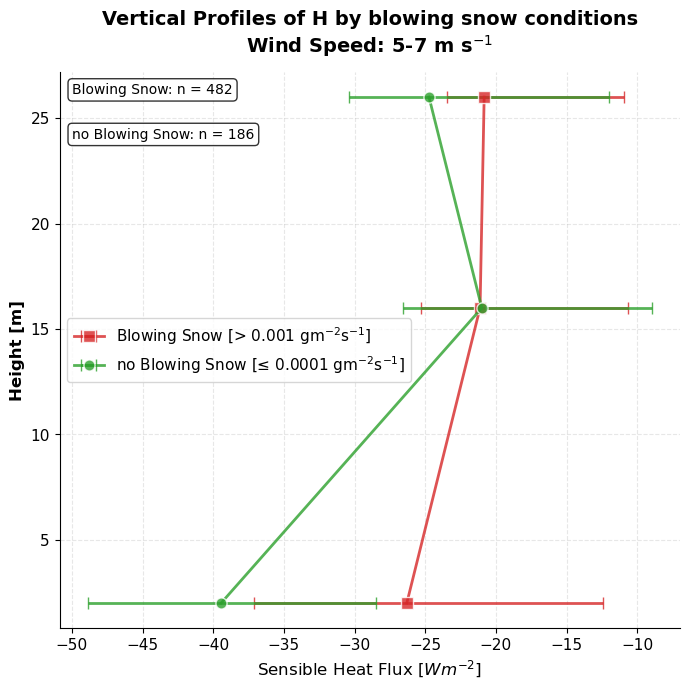

In [22]:
def plot_filtered_wind_speed(fluxes_SFC, fluxes_16m, fluxes_26m, slowdata, heights, variable):
    """
    Plots vertical profiles for two atmospheric conditions based on blowing snow occurrence:
    1. Blowing snow conditions (PF_FC4 > 0.1, 5 < WS1_Avg < 8 m/s)
    2. Clear conditions (PF_FC4 ≤ 0.0001, 5 < WS1_Avg < 8 m/s)

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing SFC flux data.
        fluxes_16m (pd.DataFrame): DataFrame containing 16m flux data.
        fluxes_26m (pd.DataFrame): DataFrame containing 26m flux data.
        slowdata (pd.DataFrame): DataFrame containing meteorological data.
        heights (list): List of heights corresponding to SFC, 16m, and 26m [m].
        variable (str): The variable to plot.
    """
    # Define atmospheric conditions
    slowdata_mean = slowdata.resample('30min').mean()
    case_BS_condition = (slowdata_mean['PF_FC4'] > 0.001) & (slowdata_mean['WS1_Avg'] > 5) & (slowdata_mean['WS1_Avg'] < 7)
    case_noBS_condition = (slowdata_mean['PF_FC4'] <= 0.0001) & (slowdata_mean['WS1_Avg'] > 5) & (slowdata_mean['WS1_Avg'] < 7)

    # Assign atmospheric condition labels to flux data
    fluxes_SFC = fluxes_SFC.copy()
    fluxes_16m = fluxes_16m.copy()
    fluxes_26m = fluxes_26m.copy()
    
    condition_labels = np.where(case_BS_condition, 'Blowing Snow', 
                               np.where(case_noBS_condition, 'Clear', 'Other'))
    
    fluxes_SFC.loc[:, 'Condition'] = condition_labels
    fluxes_16m.loc[:, 'Condition'] = condition_labels
    fluxes_26m.loc[:, 'Condition'] = condition_labels

    # Set up the figure with scientific styling
    fig, ax = plt.subplots(figsize=(7, 7))

    # Define colors and markers for each condition
    condition_styles = {
        'Blowing Snow': {'color': '#d62728', 'marker': 's', 'label': r'Blowing Snow [> 0.001 gm$^{-2}$s$^{-1}$]'},
        'Clear': {'color': '#2ca02c', 'marker': 'o', 'label': r'no Blowing Snow [≤ 0.0001 gm$^{-2}$s$^{-1}$]'},
    }
    conditions = ['Blowing Snow', 'Clear']

    for condition in conditions:
        style = condition_styles[condition]
        # Filter data for current atmospheric condition
        sfc_bin = fluxes_SFC[fluxes_SFC['Condition'] == condition][variable]
        m16_bin = fluxes_16m[fluxes_16m['Condition'] == condition][variable]
        m26_bin = fluxes_26m[fluxes_26m['Condition'] == condition][variable]
        
        # Calculate statistics
        datasets = [sfc_bin, m16_bin, m26_bin]
        means = []
        percentiles_25 = []
        percentiles_75 = []
        
        for data in datasets:
            if not data.empty:
                resampled = resample_with_threshold(data, '30min', False, '30min', 50)
                means.append(resampled.mean())
                percentiles_25.append(resampled.quantile(0.25))
                percentiles_75.append(resampled.quantile(0.75))
            else:
                means.append(np.nan)
                percentiles_25.append(np.nan)
                percentiles_75.append(np.nan)
        
        # Calculate error bars (ensure non-negative)
        means = np.array(means)
        percentiles_25 = np.array(percentiles_25)
        percentiles_75 = np.array(percentiles_75)
        lower_error = np.maximum(0, means - percentiles_25)
        upper_error = np.maximum(0, percentiles_75 - means)
        
        # Create the profile plot
        ax.errorbar(
            means, heights,
            xerr=[lower_error, upper_error],
            fmt=style['marker'] + '-',
            color=style['color'],
            capsize=4,
            capthick=1.5,
            linewidth=2,
            markersize=8,
            markerfacecolor=style['color'],
            markeredgecolor='white',
            markeredgewidth=1,
            alpha=0.8,
            label=style['label']
        )
        
        # Add sample size annotation
        n_samples_SFC = len(sfc_bin.dropna())
        ax.text(
            0.02, 0.98 - 0.08 * conditions.index(condition), f"{style['label'].split('[')[0].strip()}: n = {n_samples_SFC}",
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
        )

    # Formatting
    ax.set_ylabel('Height [m]', fontsize=12, fontweight='bold')
    if variable == 'H':
        ax.set_xlabel(r'Sensible Heat Flux [$Wm^{-2}$]', fontsize=12)
    elif variable == 'TKE':
        ax.set_xlabel(r'Turbulent Kinetic Energy [$m$^{2}$s$^{-2}$]', fontsize=12)
    elif variable == 'wind_speed':
        ax.set_xlabel(r'Wind Speed [m s⁻¹]', fontsize=12)
    elif variable == 'TI':
        ax.set_xlabel(r'Turbulence Intensity [-]', fontsize=12)
    else:
        ax.set_xlabel(f'{variable} (Mean ± IQR)', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.legend(fontsize=11)
    plt.title(f'Vertical Profiles of {variable} by blowing snow conditions\n'
              r'Wind Speed: 5-7 m s$^{-1}$',
              fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f'/home/engbers/Documents/PhD/Candidacy exam/plots/{variable}_atmospheric_conditions_profile_in_one.png', 
                bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()

# Usage with updated variable name
heights = [2, 16, 26]
plot_filtered_wind_speed(fluxes_SFC_synced, fluxes_16m_synced, fluxes_26m_synced, 
                         slowdata, heights, variable='H')


(0.0, 1.0)

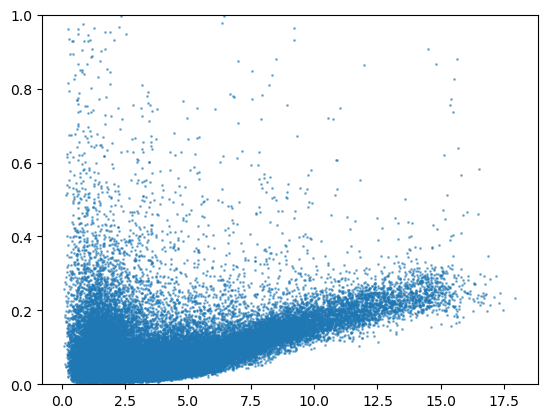

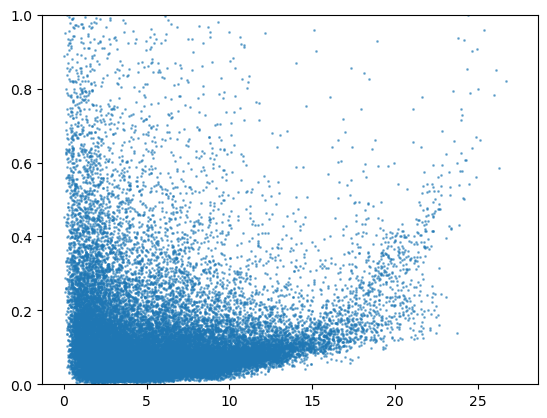

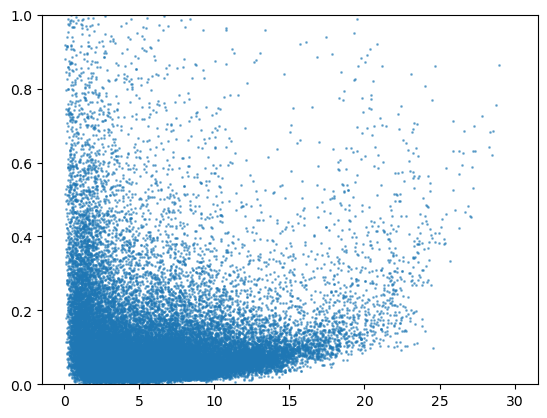

In [ ]:
plt.figure()
plt.scatter(resample_with_threshold(fluxes_SFC['wind_speed'], '10min'), resample_with_threshold(fluxes_SFC['TI'], '10min'), s=1, alpha=0.5)
plt.ylim(0,1)
plt.figure()
plt.scatter(resample_with_threshold(fluxes_16m['wind_speed'], '10min'), resample_with_threshold(fluxes_16m['TI'], '10min'), s=1, alpha=0.5)
plt.ylim(0,1)
plt.figure()
plt.scatter(resample_with_threshold(fluxes_26m['wind_speed'], '10min'), resample_with_threshold(fluxes_26m['TI'], '10min'), s=1, alpha=0.5)
plt.ylim(0,1)

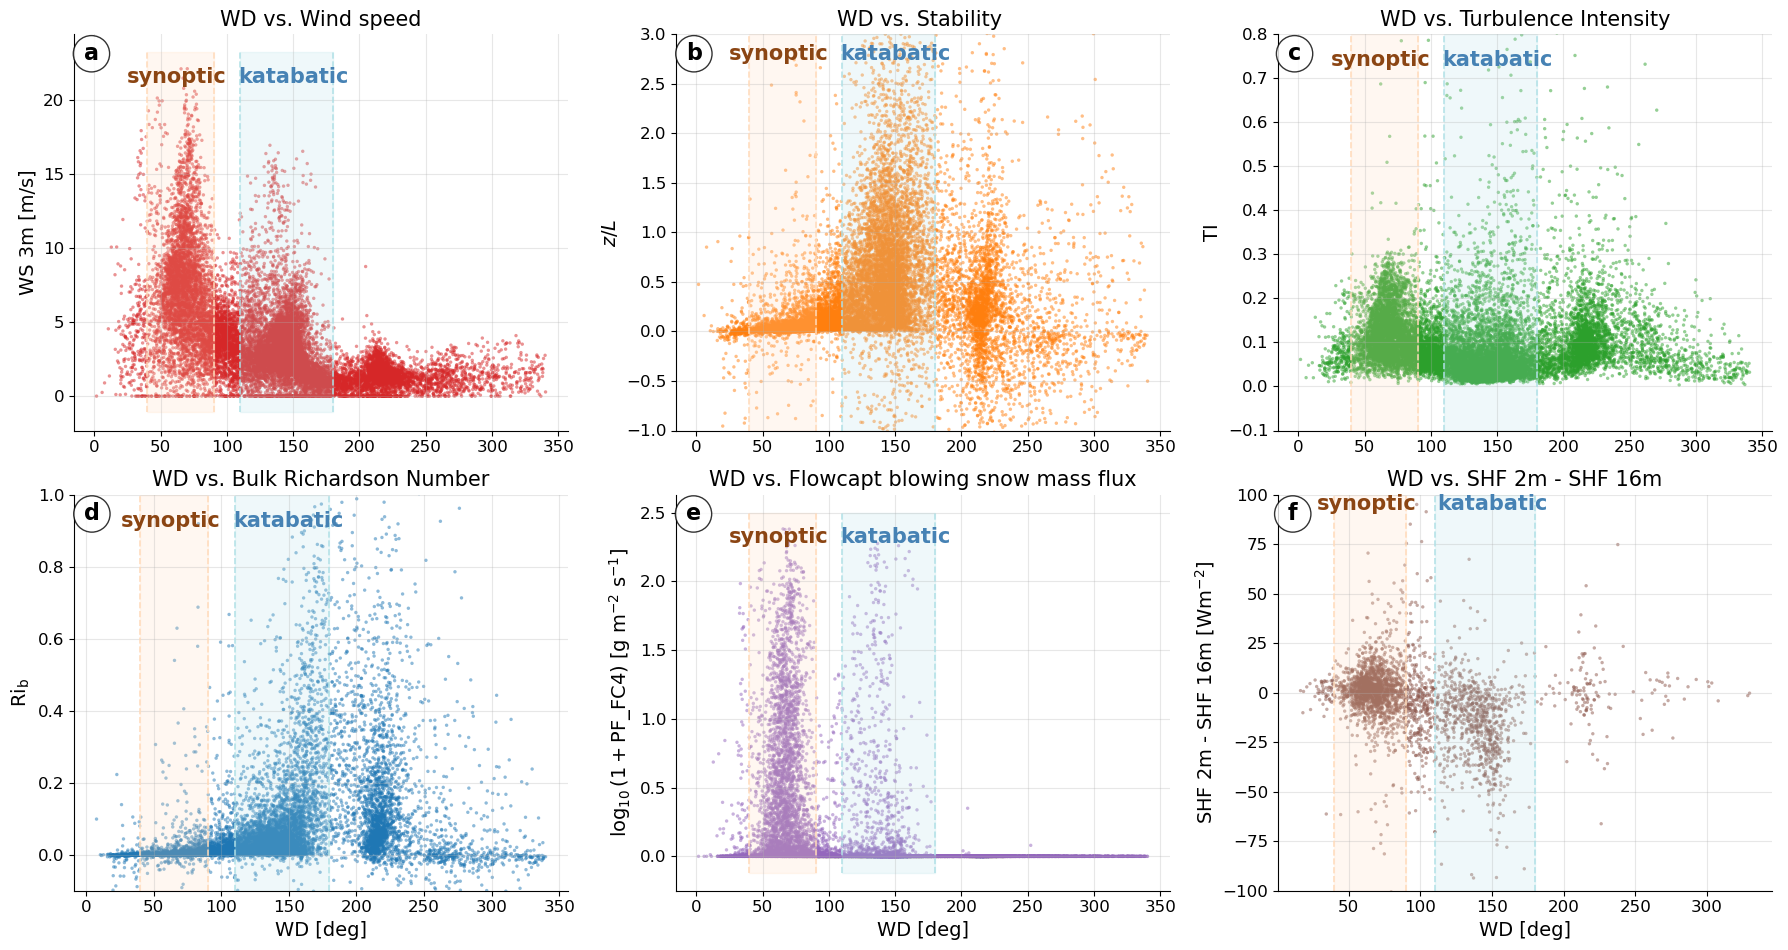

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=False)
axes = axes.flatten()

scatter_kwargs = dict(s=6, alpha=0.5, edgecolor='none')

# 1. WD2 vs Ri_b_surf
x1 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')
y1 = resample_with_threshold(Ri_b_surf, '30min')
mask1 = x1.notna() & y1.notna()
axes[3].scatter(x1[mask1], y1[mask1], **scatter_kwargs, color="#1f77b4")
axes[3].set_ylim(-0.1, 1)
axes[3].set_ylabel(r'$\mathrm{Ri_b}$', fontsize=14)
axes[3].set_xlabel('WD [deg]', fontsize=14)
axes[3].set_title('WD vs. Bulk Richardson Number', fontsize=15)
axes[3].grid(True, alpha=0.3)
axes[3].tick_params(labelsize=12)

# 2. WD2 vs (z-d)/L
x2 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')[start:end]
y2 = resample_with_threshold(fluxes_SFC['(z-d)/L'], '30min')[start:end]
mask2 = x2.notna() & y2.notna()
axes[1].scatter(x2[mask2], y2[mask2], **scatter_kwargs, color="#ff7f0e")
axes[1].set_ylim(-1, 3)
axes[1].set_ylabel(r'$z/L$', fontsize=14)
axes[1].set_title('WD vs. Stability ', fontsize=15)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(labelsize=12)

# 3. WD2 vs TI
x3 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')[start:end]
y3 = resample_with_threshold(fluxes_SFC['TI'], '30min')[start:end]
mask3 = x3.notna() & y3.notna()
axes[2].scatter(x3[mask3], y3[mask3], **scatter_kwargs, color="#2ca02c")
axes[2].set_ylim(-0.1, 0.8)
axes[2].set_ylabel('TI', fontsize=14)
axes[2].set_title('WD vs. Turbulence Intensity', fontsize=15)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(labelsize=12)

# 4. WD2 vs WS2_Avg
x4 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')[start:end]
y4 = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '30min')[start:end]
mask4 = x4.notna() & y4.notna()
axes[0].scatter(x4[mask4], y4[mask4], **scatter_kwargs, color="#d62728")
axes[0].set_ylabel('WS 3m [m/s]', fontsize=14)
axes[0].set_title('WD vs. Wind speed', fontsize=15)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(labelsize=12)

# 5. WD2 vs PF_FC4
x5 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')[start:end]
y5 = np.log10(1 + resample_with_threshold(slowdata_cleaned['PF_FC4'], '30min')[start:end])
mask5 = x5.notna() & y5.notna()
axes[4].scatter(x5[mask5], y5[mask5], **scatter_kwargs, color="#9467bd")
axes[4].set_xlabel('WD [deg]', fontsize=14)
axes[4].set_ylabel(r'$\log_{10}(1+\mathrm{PF\_FC4})$ [g m$^{-2}$ s$^{-1}$]', fontsize=14)
axes[4].set_title('WD vs. Flowcapt blowing snow mass flux', fontsize=15)
axes[4].grid(True, alpha=0.3)
axes[4].tick_params(labelsize=12)

# 6. WD2 vs H_16m - H_SFC
x6 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')[start:end]
y6 = (resample_with_threshold(fluxes_SFC_synced['H'], '30min')[start:end] -
    resample_with_threshold(fluxes_16m_synced['H'], '30min')[start:end])
mask6 = x6.notna() & y6.notna()
axes[5].scatter(x6[mask6], y6[mask6], **scatter_kwargs, color="#8c564b")
axes[5].set_xlabel('WD [deg]', fontsize=14)
axes[5].set_ylabel(r'SHF 2m - SHF 16m [Wm$^{-2}$]', fontsize=14)
axes[5].set_title('WD vs. SHF 2m - SHF 16m', fontsize=15)
axes[5].grid(True, alpha=0.3)
axes[5].set_ylim(-100, 100)
axes[5].tick_params(labelsize=12)

for idx, ax in enumerate(axes):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Add vertical lines at 45 and 90 degrees spanning the full y-range of each subplot
    ymin, ymax = ax.get_ylim()
    # Add annotation at the top between 45 and 90 degrees
    # Add annotation at the top of the figure (but inside the figure area)
    # Add annotation at the top between 45 and 90 degrees
    ax.text(
        0.5 * (45 + 80), ymax-ymax/10, "synoptic", color='saddlebrown', fontsize=15,
        ha='center', va='bottom', alpha=1, fontweight='bold'
    )
    ax.text(
        0.5 * (120 + 180), ymax-ymax/10, "katabatic", color='steelblue', fontsize=15,
        ha='center', va='bottom', alpha=1, fontweight='bold'
    )
    ax.vlines([40, 90], ymin, ymax, colors='peachpuff', linestyles='dashed', linewidth=1.2, alpha=0.9)
    ax.fill_betweenx(np.linspace(ymin, ymax, 110), 40, 90, color='peachpuff', alpha=0.2)
    ax.vlines([110, 180], ymin, ymax, colors='powderblue', linestyles='dashed', linewidth=1.2, alpha=0.9)
    ax.fill_betweenx(np.linspace(ymin, ymax, 110), 110, 180, color='powderblue', alpha=0.2)
    
    # Add letter labels (a, b, c, d, e, f)
    letter = chr(ord('a') + idx)
    ax.text(0.02, 0.98, letter, transform=ax.transAxes, fontsize=16, fontweight='bold',
            verticalalignment='top', bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8))

# plt.suptitle('Wind Direction Relationships (30min resampled)', fontsize=20, y=0.98, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/home/engbers/Documents/PhD/Candidacy exam/plots/9_wdir_vars.pdf', bbox_inches='tight', dpi=300)
plt.show()

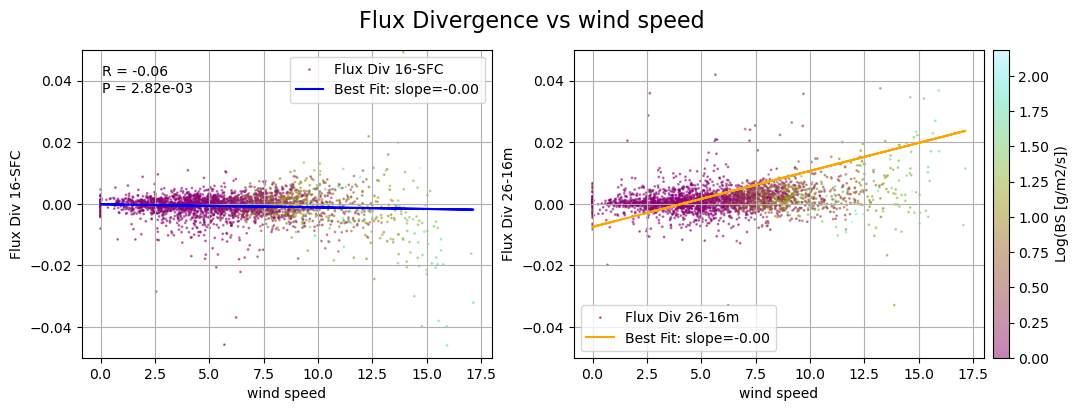

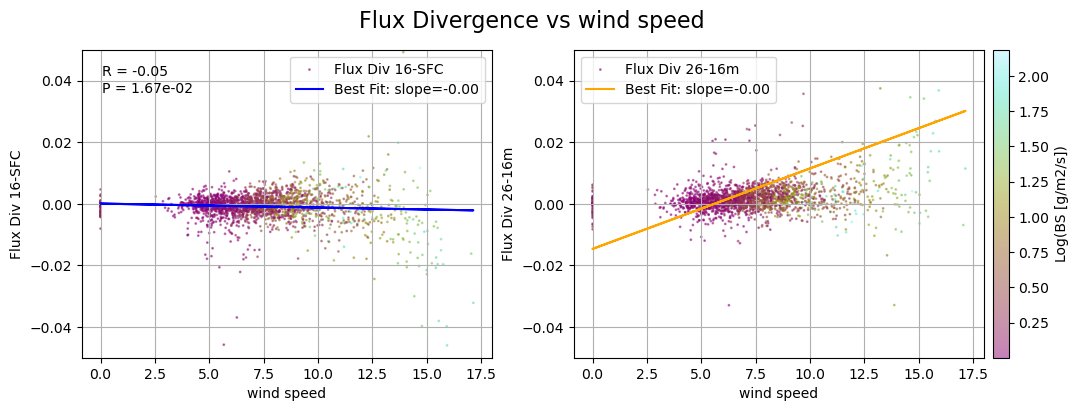

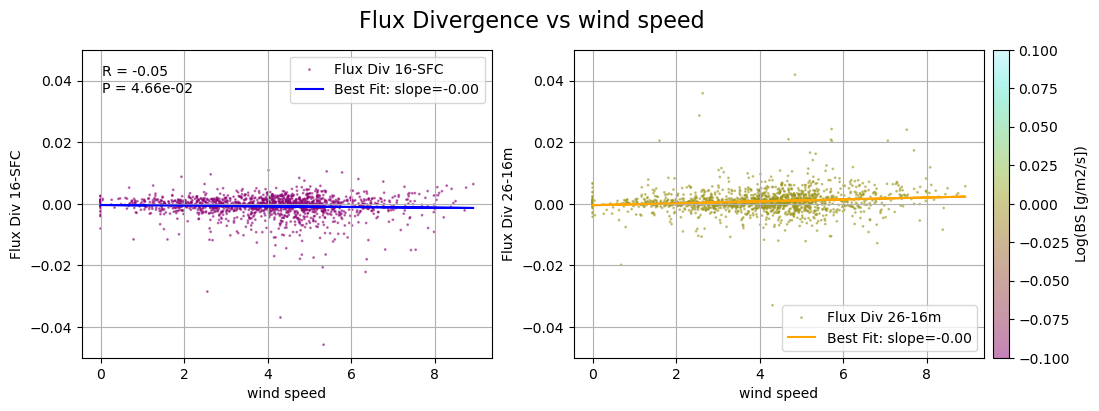

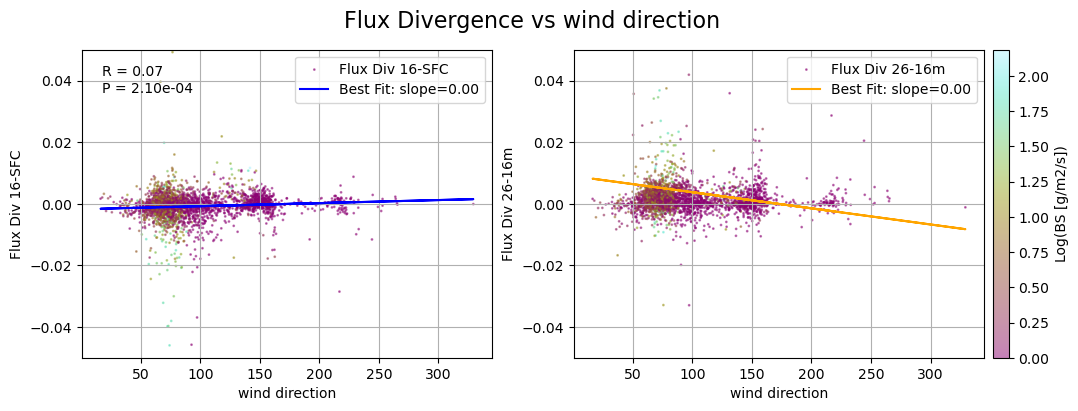

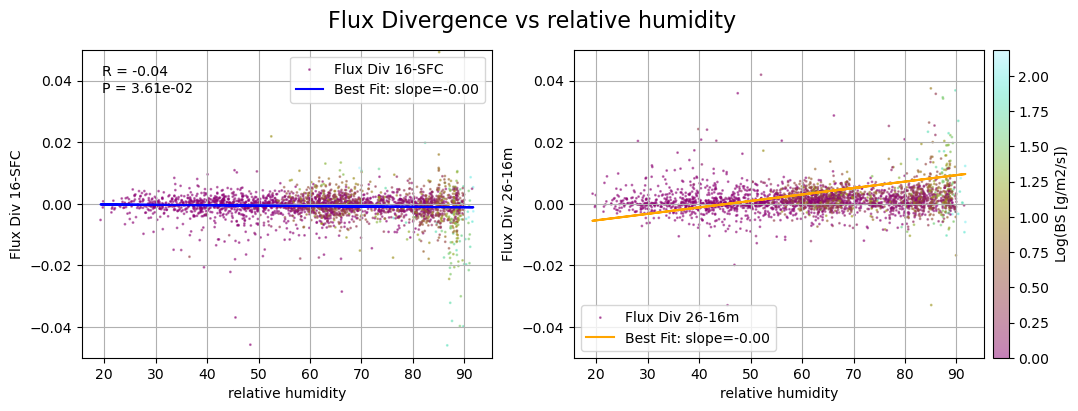

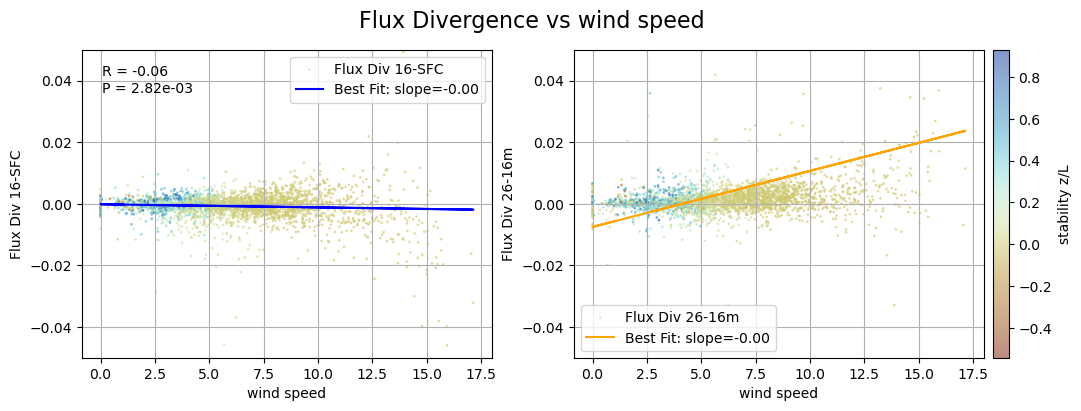

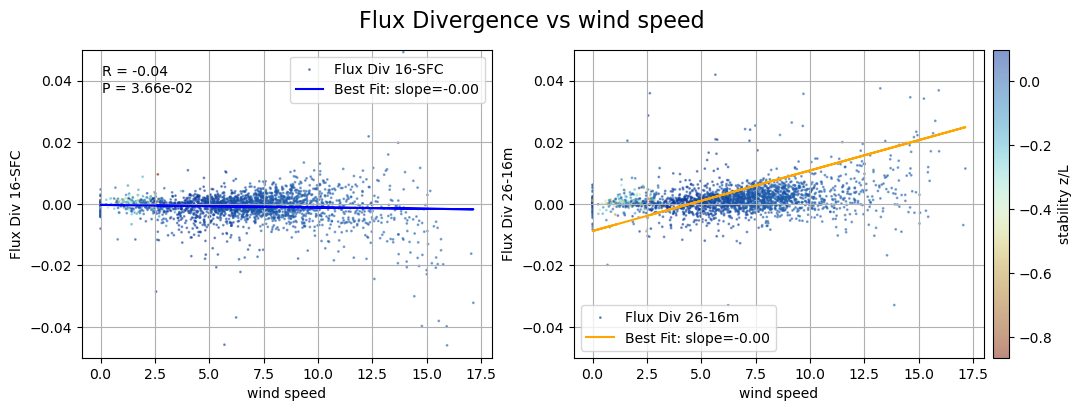

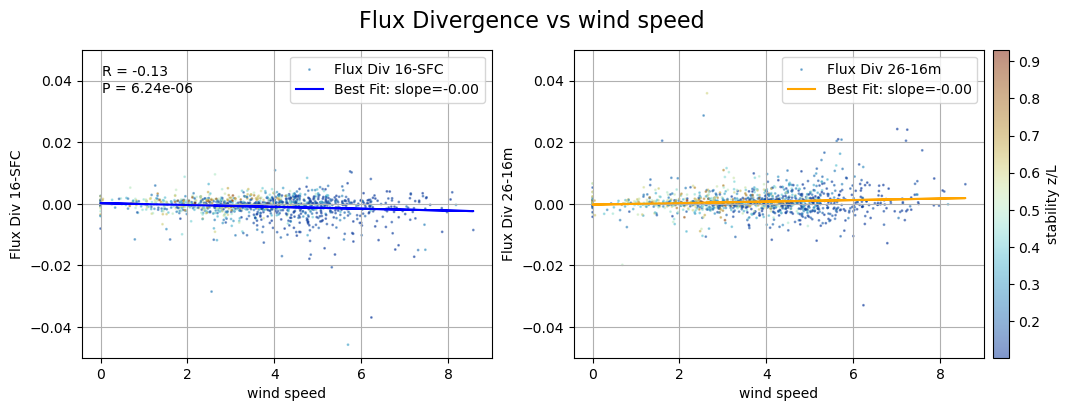

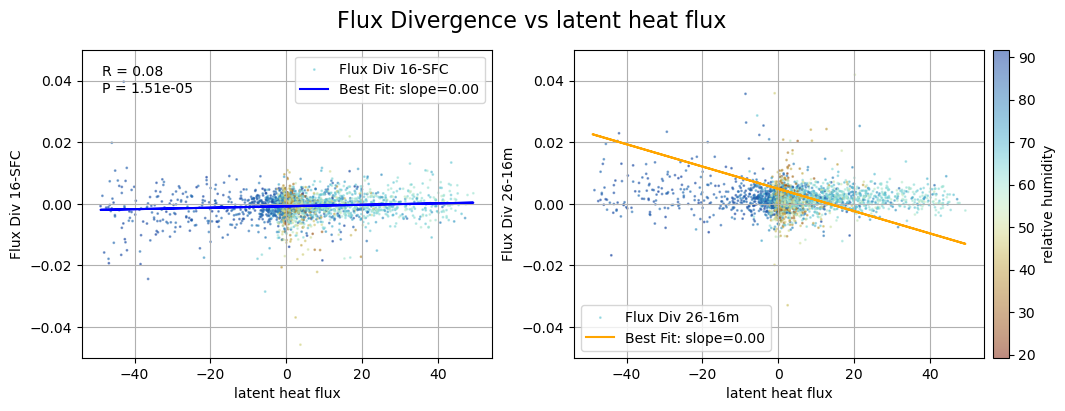

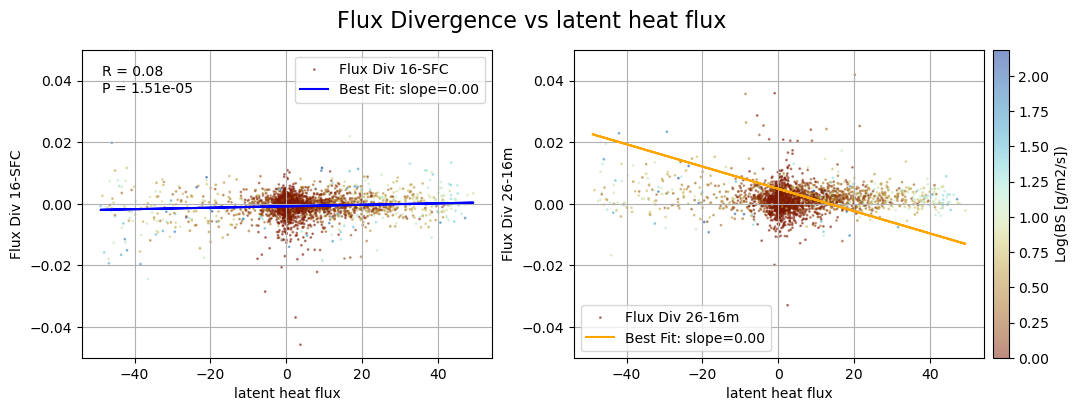

In [ ]:
def plot_flux_div(ws_column, fluxes_16m, fluxes_SFC, fluxes_26m, start, end, label, ylim=(-8, 8), color_column='blue', color_column_name='Log(BS [g/m2/s])', log=True, filter_func=None, cmap=cm.hawaii):
    """
    Plots scatter plots and lines of best fit for flux divergence against a given variable.

    Parameters:
        ws_column (pd.Series): The column to use as the x-axis variable.
        fluxes_16m (pd.DataFrame): Fluxes at 16m height.
        fluxes_SFC (pd.DataFrame): Fluxes at surface.
        fluxes_26m (pd.DataFrame): Fluxes at 26m height.
        start (str): Start datetime for slicing.
        end (str): End datetime for slicing.
        label (str): Label for the x-axis variable.
        ylim (tuple): Limits for the y-axis.
        filter_func (function, optional): Function to filter the x-axis variable.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

    flux_div_1 = (fluxes_16m['Tau'][start:end] - fluxes_SFC['Tau'][start:end]) / 14
    flux_div_2 = (fluxes_26m['Tau'][start:end] - fluxes_16m['Tau'][start:end]) / 10
    ws = resample_with_threshold(ws_column, '30min', True, '30min', 80)[start:end]
    color_column = resample_with_threshold(color_column, '30min', True,'30min', 80)[start:end]
    if filter_func:
        ws = ws.where(filter_func)
    
    # Drop rows with NaN values to ensure all variables have the same length
    valid_data = pd.concat([ws, flux_div_1, flux_div_2, color_column], axis=1).dropna()
    ws = valid_data.iloc[:, 0]
    flux_div_1 = valid_data.iloc[:, 1]
    flux_div_2 = valid_data.iloc[:, 2]
    color_column = valid_data.iloc[:, 3]

    # Plot for flux_div_1
    if log:
        scatter_1 = axes[0].scatter(ws, flux_div_1, s=1, alpha=0.5, label='Flux Div 16-SFC', c=np.log1p(color_column), cmap=cmap)
    else:   
        scatter_1 = axes[0].scatter(ws, flux_div_1, s=1, alpha=0.5, label='Flux Div 16-SFC', c=color_column, cmap=cmap)
    coeffs_1 = np.polyfit(ws, flux_div_1, 1)
    line_1 = np.polyval(coeffs_1, ws)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(ws, flux_div_1)
    # Generate the line of best fit
    line_1 = slope * ws + intercept
    # Plot the scatter plot and the line of best fit
    axes[0].plot(ws, line_1, color='blue', label=f'Best Fit: slope={slope:.2f}')
    # Add R-squared and p-value to the plot
    # axes[0].text(0.05, 0.95, f'R² = {r_value**2:.2f}\nP = {p_value:.2e}', transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
    axes[0].text(0.05, 0.95, f'R = {r_value:.2f}\nP = {p_value:.2e}', transform=axes[0].transAxes, fontsize=10, verticalalignment='top')

    # axes[0].plot(ws, line_1, color='blue', label='Best Fit Flux Div 16-SFC')
    axes[0].set_ylim(ylim)
    axes[0].set_ylabel('Flux Div 16-SFC')
    axes[0].legend()
    axes[0].grid(True)

    # Plot for flux_div_2
    if log:
        scatter_2 = axes[1].scatter(ws, flux_div_2, s=1, alpha=0.5, label='Flux Div 26-16m', c=np.log10(1+color_column), cmap=cmap)
    else:
        scatter_2 = axes[1].scatter(ws, flux_div_2, s=1, alpha=0.5, label='Flux Div 26-16m', c=color_column, cmap=cmap)
    coeffs_2 = np.polyfit(ws, flux_div_2, 1)
    line_2 = np.polyval(coeffs_2, ws)
    axes[1].plot(ws, line_2, color='orange', label=f'Best Fit: slope={slope:.2f}')
    axes[1].set_ylim(ylim)
    axes[0].set_xlabel(label)
    axes[1].set_xlabel(label)
    axes[1].set_ylabel('Flux Div 26-16m')
    axes[1].legend()
    axes[1].grid(True)

    # Add a colorbar
    cbar = fig.colorbar(scatter_2, ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
    cbar.set_label(color_column_name)

    fig.suptitle(f'Flux Divergence vs {label}', fontsize=16)
    # plt.tight_layout()
    # plt.show()

start = '2024-01-01 00:00'
end = '2024-12-01 00:00'
color_column_name='Log(BS [g/m2/s])'

ws_column = slowdata_cleaned['WS2_Avg']
color_column = slowdata_cleaned['PF_FC4']
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/1_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)
ws_column = slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['PF_FC4'] > 0.0001)
color_column = slowdata_cleaned['PF_FC4'].where(slowdata_cleaned['PF_FC4'] > 0.0001)
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ),color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/2_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)

ws_column = slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['PF_FC4'] < 0.0001)
color_column = slowdata_cleaned['PF_FC4'].where(slowdata_cleaned['PF_FC4'] < 0.0001)
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ),color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/3_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)
ws_column = slowdata_cleaned['WD1']
color_column = slowdata_cleaned['PF_FC4']
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind direction', ylim=(-0.05,0.05 ),color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/4_wind_dir_flux_div.png', bbox_inches='tight', dpi=300)
ws_column = fluxes_SFC['u*']
ws_column = slowdata_cleaned['RH']
color_column = slowdata_cleaned['WS1_Avg']
color_column = slowdata_cleaned['PF_FC4']
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'relative humidity', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/5_rh_flux_div.png', bbox_inches='tight', dpi=300)

# ws_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 1) & (x > -1))
# color_column = slowdata_cleaned['WS1_Avg']
# color_column = slowdata_cleaned['PF_FC4']
# plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wd', ylim=(-0.05,0.05 ), color_column=color_column, log=True, filter_func=lambda x: (x < 1) & (x > -1))

ws_column =slowdata_cleaned['WS2_Avg']
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 1) & (x > -1))
color_column_name='stability z/L'
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/6_stab_flux_div.png', bbox_inches='tight', dpi=300)

ws_column =slowdata_cleaned['WS2_Avg']
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 0.1) & (x > -1))
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/7_stab_flux_div.png', bbox_inches='tight', dpi=300)

ws_column =slowdata_cleaned['WS2_Avg']
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 1) & (x > 0.1))
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma_r)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/8_stab_flux_div.png', bbox_inches='tight', dpi=300)

color_column =slowdata_cleaned['RH']
color_column_name='relative humidity'
ws_column = fluxes_SFC['LE'].where(lambda x: (x < 50) & (x > -50))
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'latent heat flux', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma)

color_column = slowdata_cleaned['PF_FC4']
color_column_name='Log(BS [g/m2/s])'
ws_column = fluxes_SFC['LE'].where(lambda x: (x < 50) & (x > -50))
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'latent heat flux', ylim=(-0.05,0.05 ), color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None, cmap=cm.roma)


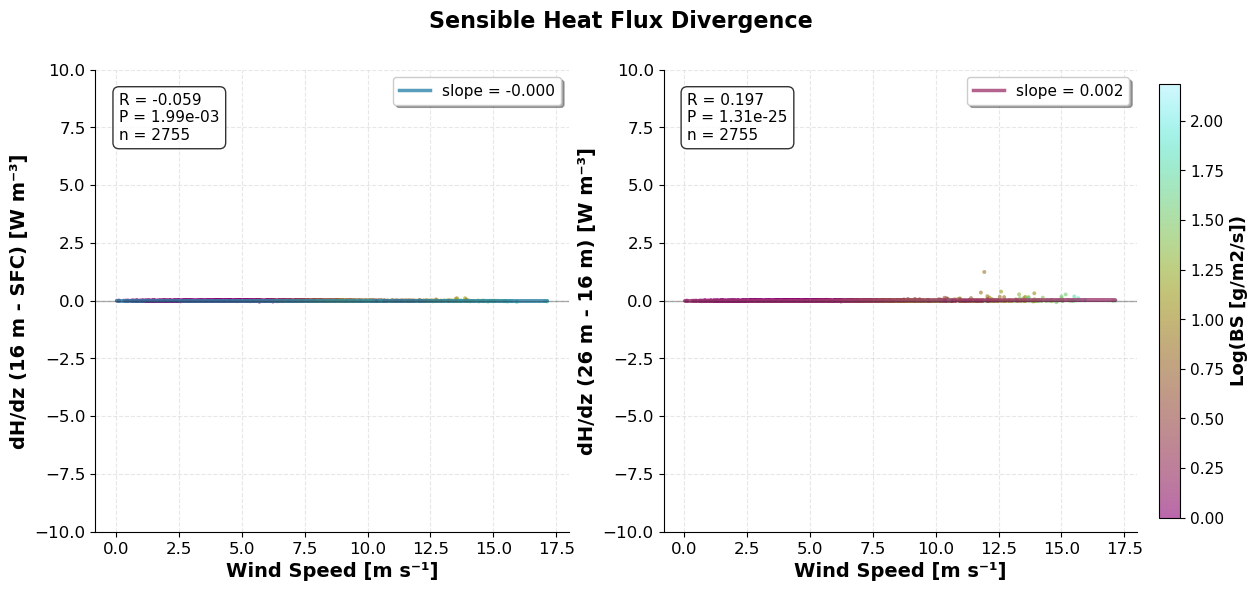

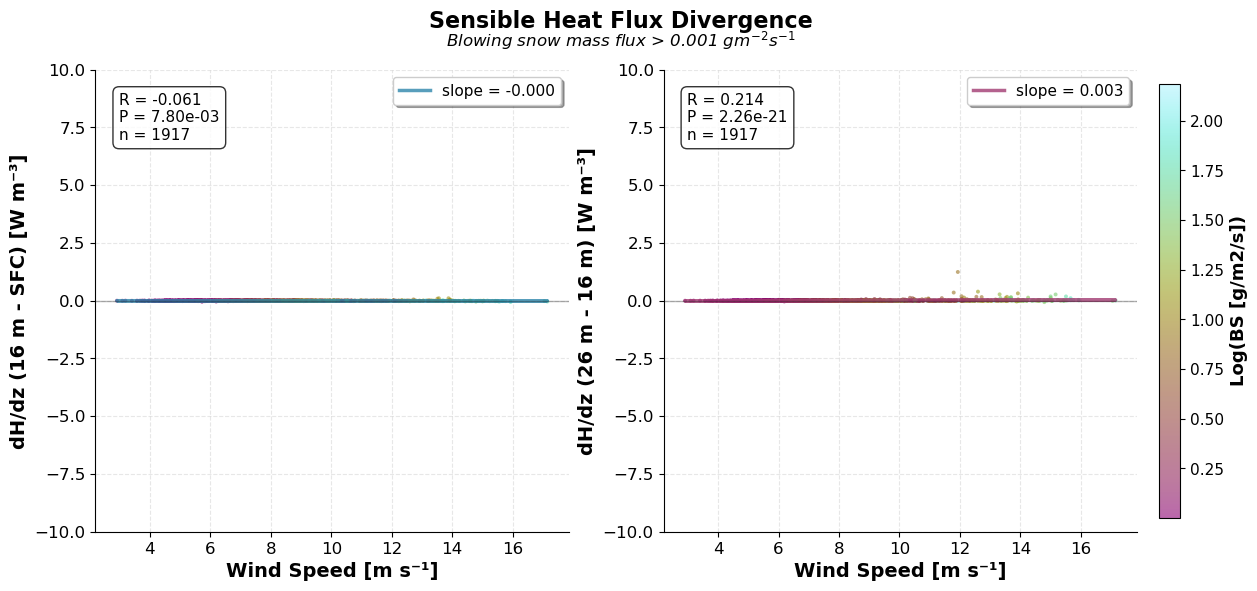

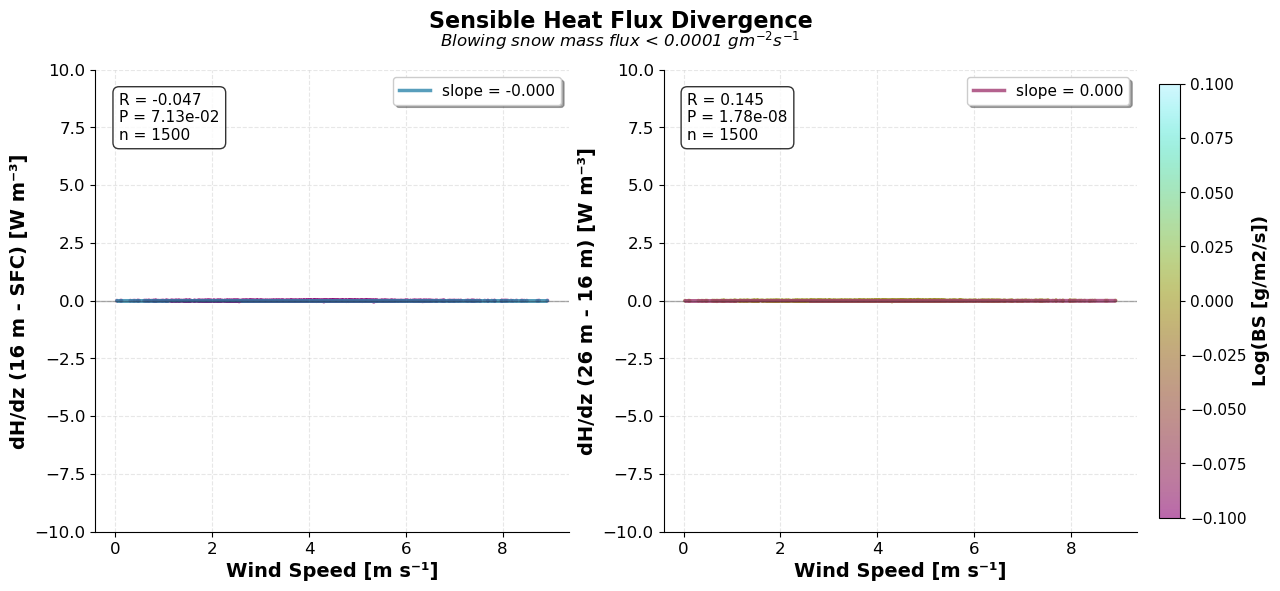

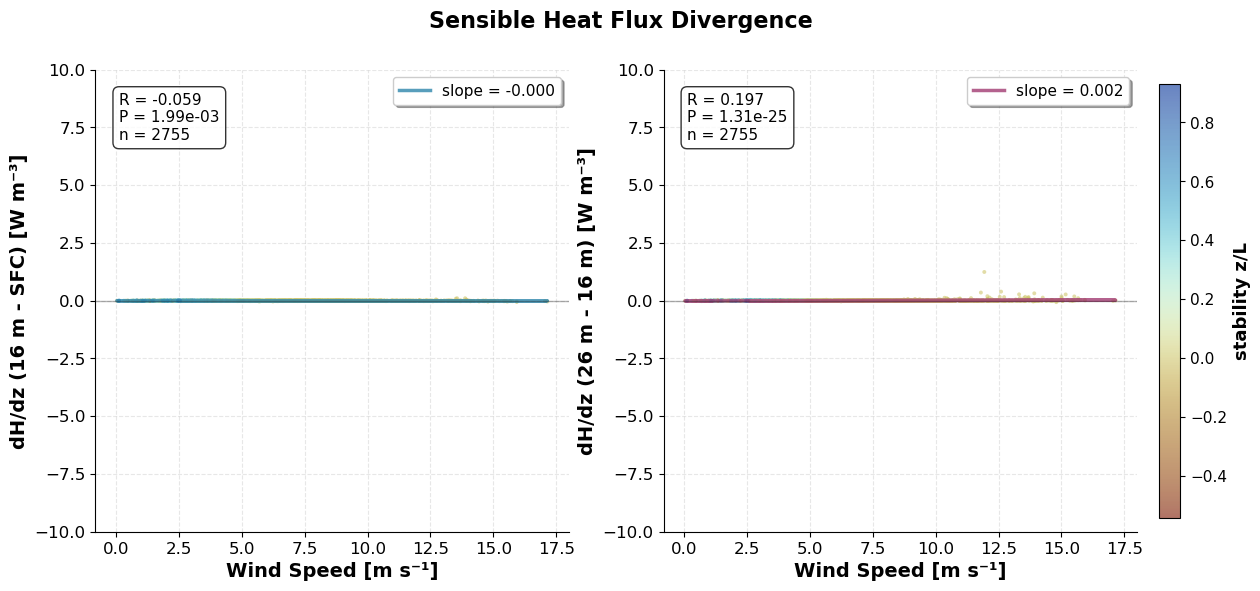

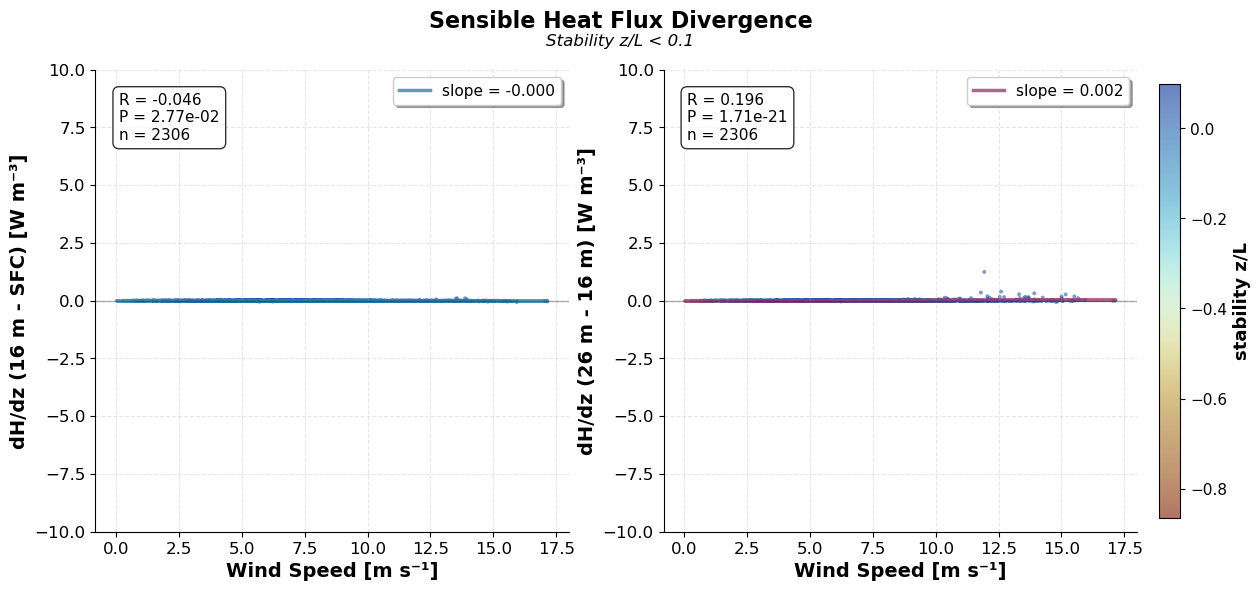

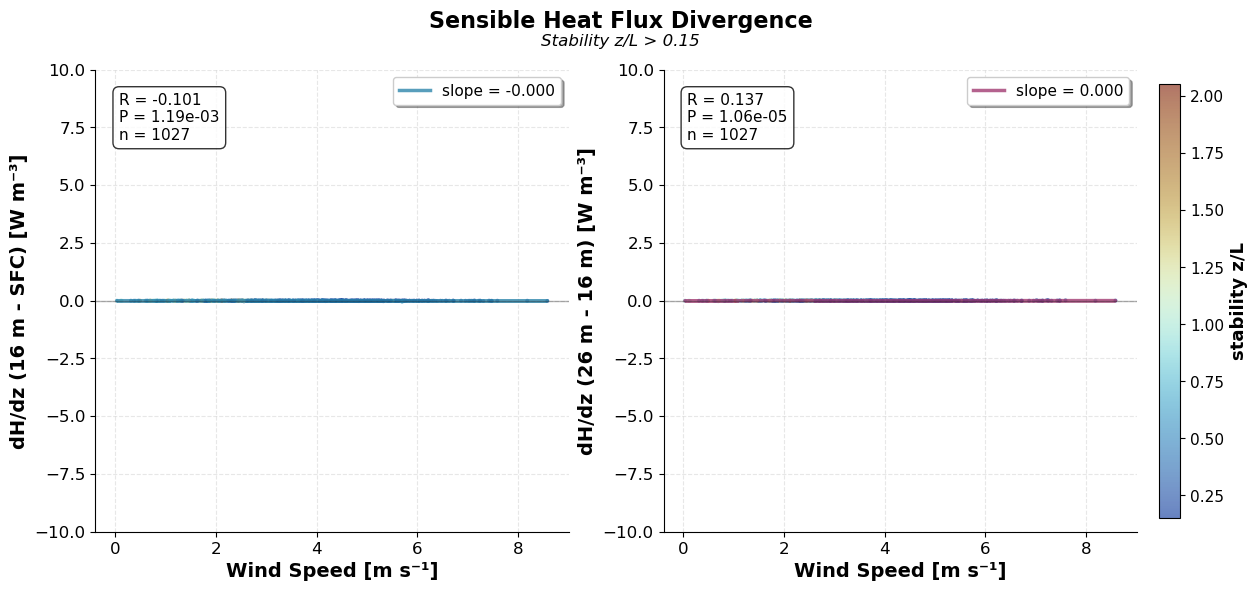

In [ ]:
def plot_flux_div(ws_column, fluxes_16m, fluxes_SFC, fluxes_26m, start, end, label, ylim=(-8, 8), 
                  color_column='blue', color_column_name='Log(BS [g/m²/s])', log=True, 
                  filter_func=None, cmap=cm.hawaii, text=None):
    """
    Plots scatter plots and lines of best fit for sensible heat flux divergence against a given variable.

    Parameters:
        ws_column (pd.Series): The column to use as the x-axis variable.
        fluxes_16m (pd.DataFrame): Fluxes at 16m height.
        fluxes_SFC (pd.DataFrame): Fluxes at surface.
        fluxes_26m (pd.DataFrame): Fluxes at 26m height.
        start (str): Start datetime for slicing.
        end (str): End datetime for slicing.
        label (str): Label for the x-axis variable.
        ylim (tuple): Limits for the y-axis.
        color_column: Column to use for color mapping.
        color_column_name (str): Label for the colorbar.
        log (bool): Whether to apply logarithmic transformation to color column.
        filter_func (function, optional): Function to filter the x-axis variable.
        cmap: Colormap for the scatter plot.
    """
    
    # Set up scientific styling
    plt.style.use('default')
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
    
    # Calculate flux divergences (units: W m⁻² m⁻¹)
    flux_div_1 = (fluxes_16m['Tau'][start:end] - fluxes_SFC['Tau'][start:end]) / 14
    flux_div_2 = (fluxes_26m['Tau'][start:end] - fluxes_16m['Tau'][start:end]) / 10
    
    # Resample data to consistent time intervals
    ws = resample_with_threshold(ws_column, '30min', True, '30min', 80)[start:end]
    color_column = resample_with_threshold(color_column, '30min', True, '30min', 80)[start:end]
    
    if filter_func:
        ws = ws.where(filter_func)
    
    # Drop rows with NaN values to ensure all variables have the same length
    valid_data = pd.concat([ws, flux_div_1, flux_div_2, color_column], axis=1).dropna()
    ws = valid_data.iloc[:, 0]
    flux_div_1 = valid_data.iloc[:, 1]
    flux_div_2 = valid_data.iloc[:, 2]
    color_column_data = valid_data.iloc[:, 3]

    # First subplot: 16m - SFC flux divergence
    if log:
        colors_1 = np.log1p(color_column_data)
    else:   
        colors_1 = color_column_data
    
    scatter_1 = axes[0].scatter(ws, flux_div_1, s=8, alpha=0.6, c=colors_1, cmap=cmap, 
                               edgecolors='none', rasterized=True)
    
    # Perform linear regression for first subplot
    slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(ws, flux_div_1)
    line_1 = slope_1 * ws + intercept_1
    
    # Plot regression line
    axes[0].plot(ws, line_1, color='#2E86AB', linewidth=2.5, alpha=0.8, 
                label=f'slope = {slope_1:.3f}')
    
    # Add statistics
    axes[0].text(0.05, 0.95, f'R = {r_value_1:.3f}\nP = {p_value_1:.2e}\nn = {len(ws)}', 
                transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
    
    # Format first subplot
    axes[0].set_ylim(ylim)
    axes[0].set_ylabel('dH/dz (16 m - SFC) [W m⁻³]', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    
    # Second subplot: 26m - 16m flux divergence
    if log:
        colors_2 = np.log10(1 + color_column_data)
    else:
        colors_2 = color_column_data
    
    scatter_2 = axes[1].scatter(ws, flux_div_2, s=8, alpha=0.6, c=colors_2, cmap=cmap,
                               edgecolors='none', rasterized=True)
    
    # Perform linear regression for second subplot
    slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(ws, flux_div_2)
    line_2 = slope_2 * ws + intercept_2
    
    # Plot regression line
    axes[1].plot(ws, line_2, color='#A23B72', linewidth=2.5, alpha=0.8,
                label=f'slope = {slope_2:.3f}')
    
    # Add statistics
    axes[1].text(0.05, 0.95, f'R = {r_value_2:.3f}\nP = {p_value_2:.2e}\nn = {len(ws)}', 
                transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
    
    # Format second subplot
    axes[1].set_ylim(ylim)
    axes[1].set_ylabel('dH/dz (26 m - 16 m) [W m⁻³]', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
    axes[1].grid(True, alpha=0.3, linestyle='--')
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    
    # Set x-axis labels
    for ax in axes:
        if 'wind' in label.lower():
            ax.set_xlabel('Wind Speed [m s⁻¹]', fontsize=14, fontweight='bold')
        elif 'direction' in label.lower():
            ax.set_xlabel('Wind Direction [°]', fontsize=14, fontweight='bold')
        elif 'temperature' in label.lower():
            ax.set_xlabel('Temperature [°C]', fontsize=14, fontweight='bold')
        elif 'humidity' in label.lower():
            ax.set_xlabel('Relative Humidity [%]', fontsize=14, fontweight='bold')
        elif 'flux' in label.lower():
            ax.set_xlabel('Latent Heat Flux [W m⁻²]', fontsize=14, fontweight='bold')
        else:
            ax.set_xlabel(label.title(), fontsize=14, fontweight='bold')
        
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add colorbar
    cbar = fig.colorbar(scatter_2, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label(color_column_name, fontsize=13, fontweight='bold')
    cbar.ax.tick_params(labelsize=11)
    
    # Add horizontal reference line at y=0
    for ax in axes:
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
    
    # Main title
    fig.suptitle('Sensible Heat Flux Divergence', fontsize=16, fontweight='bold', y=0.98)
    
    # Add height information as subtitle
    if text is not None:
        fig.text(0.5, 0.92, f'{text}', 
                ha='center', fontsize=12, style='italic')
    
    # Adjust layout to make space for colorbar on the right
    # plt.tight_layout(rect=[0, 0, 0.96, 0.90])
    
    return fig, axes

start = '2024-01-01 00:00'
end = '2024-12-01 00:00'
color_column_name='Log(BS [g/m2/s])'

ws_column = slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01)
color_column = slowdata_cleaned['PF_FC4']
text=''
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ), color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/1_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)
ws_column = slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01).where(slowdata_cleaned['PF_FC4'] > 0.001)
color_column = slowdata_cleaned['PF_FC4'].where(slowdata_cleaned['PF_FC4'] > 0.001)
text=r'Blowing snow mass flux > 0.001 $g m^{-2} s^{-1}$'
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ),color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/2_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)
text=r'Blowing snow mass flux < 0.0001 $g m^{-2} s^{-1}$'
ws_column = slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01).where(slowdata_cleaned['PF_FC4'] < 0.0001)
color_column = slowdata_cleaned['PF_FC4'].where(slowdata_cleaned['PF_FC4'] < 0.0001)
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ),color_column=color_column, color_column_name=color_column_name, log=True, filter_func=None, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/3_wind_speed_flux_div.png', bbox_inches='tight', dpi=300)

ws_column =slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01)
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 1) & (x > -1))
color_column_name='stability z/L'
text=''
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/6_stab_flux_div.png', bbox_inches='tight', dpi=300)

ws_column =slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01)
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 0.1) & (x > -1))
text='Stability z/L < 0.1'
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/7_stab_flux_div.png', bbox_inches='tight', dpi=300)

ws_column =slowdata_cleaned['WS2_Avg'].where(slowdata_cleaned['WS2_Avg'] > 0.01)
color_column = fluxes_SFC['(z-d)/L'].where(lambda x: (x < 3) & (x > 0.15))
text='Stability z/L > 0.15'
plot_flux_div(ws_column, fluxes_16m_synced, fluxes_SFC_synced, fluxes_26m_synced, start, end, 'wind speed', ylim=(-10,10 ), color_column=color_column, color_column_name=color_column_name, log=False, filter_func=None, cmap=cm.roma_r, text=text)
plt.savefig('/home/engbers/Documents/PhD/Data/plots/8_stab_flux_div.png', bbox_inches='tight', dpi=300)



Text(0.5, 1.0, 'LE vs Log(1 + BS)')

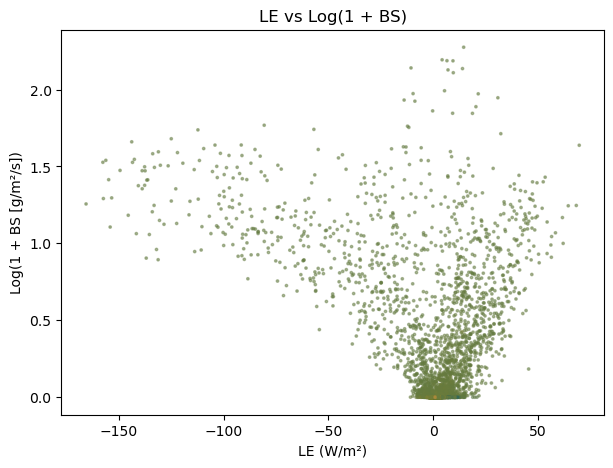

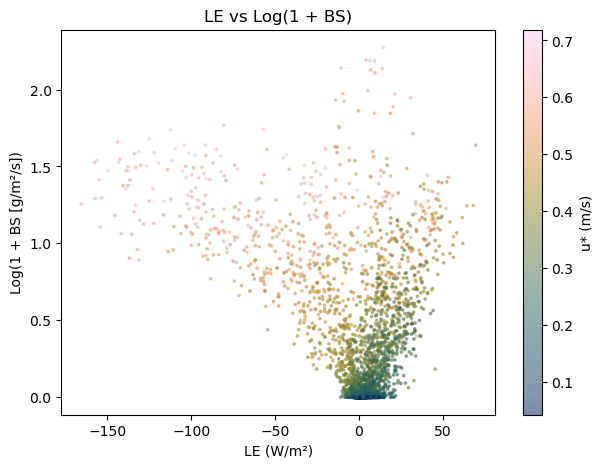

In [ ]:
start = '2024-04-01 00:00'
end = '2024-12-01 00:00'
plt.figure(figsize=(7, 5))
plt.scatter(
    resample_with_threshold(fluxes_SFC['LE'][start:end], '30min'),
    np.log10(1+resample_with_threshold(slowdata_cleaned['PF_FC4'][start:end], '30min')), c=resample_with_threshold(fluxes_SFC['(z-d)/L'][start:end], '30min'), cmap=cmc.cm.batlow,
    s=3, alpha=0.5
)
plt.xlabel('LE (W/m²)')
plt.ylabel('Log(1 + BS [g/m²/s])')
plt.title('LE vs Log(1 + BS)')


start = '2024-04-01 00:00'
end = '2024-12-01 00:00'
plt.figure(figsize=(7, 5))
plt.scatter(
    resample_with_threshold(fluxes_SFC['LE'][start:end], '30min'),
    np.log10(1+resample_with_threshold(slowdata_cleaned['PF_FC4'][start:end], '30min')), c=resample_with_threshold(fluxes_SFC['u*'][start:end], '30min'), cmap=cmc.cm.batlow,
    s=3, alpha=0.5
)
plt.colorbar(label='u* (m/s)')
plt.xlabel('LE (W/m²)')
plt.ylabel('Log(1 + BS [g/m²/s])')
plt.title('LE vs Log(1 + BS)')



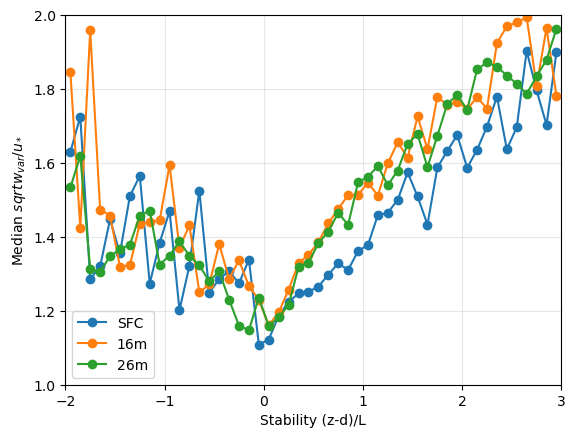

In [ ]:
bins = np.arange(-2, 3.1, 0.1)
bin_centers = (bins[:-1] + bins[1:]) / 2

def median_profile(df, label):
    x = df['(z-d)/L']
    y = np.sqrt(df['w_var']) / df['u*']
    medians = []
    for left, right in zip(bins[:-1], bins[1:]):
        mask = (x >= left) & (x < right)
        medians.append(np.nanmedian(y[mask]))
    plt.plot(bin_centers, medians, marker='o', label=label)

median_profile(fluxes_SFC_synced, 'SFC')
median_profile(fluxes_16m_synced, '16m')
median_profile(fluxes_26m_synced, '26m')
plt.xlabel('Stability (z-d)/L')
plt.ylabel('Median $sqrt{w_{var}}/u_*$')
plt.legend()
plt.xlim(-2, 3)
plt.ylim(1, 2)
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_1264862/2274280703.py:15: RuntimeWarning: All-NaN slice encountered
  medians.append(np.nanmedian(y[mask]))


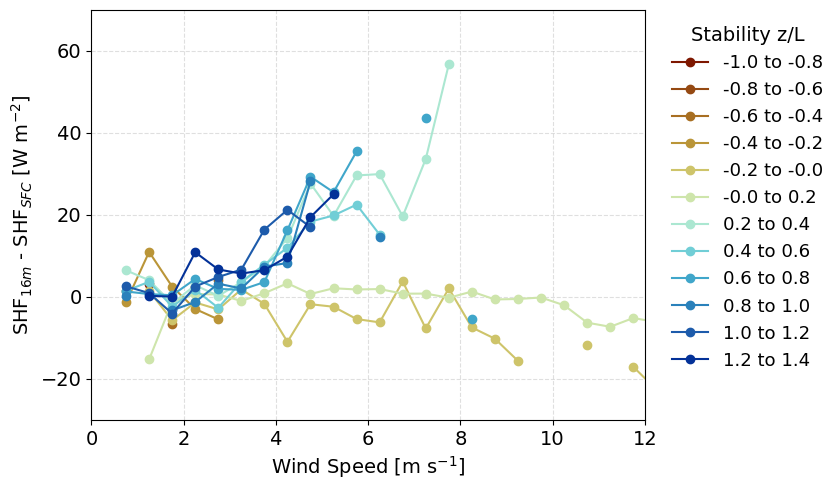

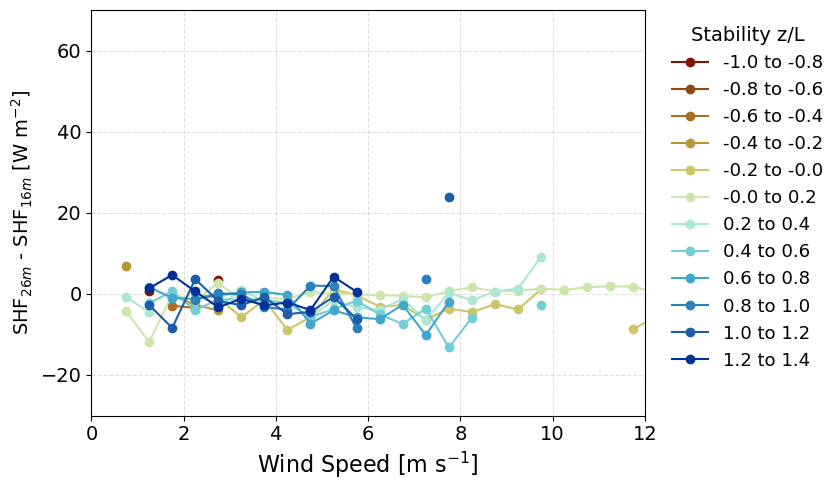

In [ ]:
bins = np.arange(0, 18, 0.5)
bin_centers = (bins[:-1] + bins[1:]) / 2
stability_bins = np.arange(-1, 1.5, 0.2)
stability_labels = [f"{stability_bins[i]:.1f} to {stability_bins[i+1]:.1f}" for i in range(len(stability_bins)-1)]

cmap = cm.roma
colors = cmap(np.linspace(0, 1, len(stability_labels)))

def median_profile_stability(df, df2, label, stability_mask, color):
    y = (df2['H'] - df['H'])
    x = df['wind_speed']
    medians = []
    for left, right in zip(bins[:-1], bins[1:]):
        mask = (x >= left) & (x < right) & stability_mask
        medians.append(np.nanmedian(y[mask]))
    plt.plot(bin_centers, medians, marker='o', label=label, color=color)

plt.figure(figsize=(10, 5))

# for i, (left, right) in enumerate(zip(stability_bins[:-1], stability_bins[1:])):
#     stability_mask = (fluxes_SFC_synced['(z-d)/L'] >= left) & (fluxes_SFC_synced['(z-d)/L'] < right)
#     median_profile_stability(
#         fluxes_SFC_synced, fluxes_16m_synced, f"({left:.1f}, {right:.1f})", stability_mask, colors[i]
#     )
    # Improve plot aesthetics for presentation
for i, (left, right) in enumerate(zip(stability_bins[:-1], stability_bins[1:])):
    stability_mask = (fluxes_SFC_synced['(z-d)/L'] >= left) & (fluxes_SFC_synced['(z-d)/L'] < right)
    median_profile_stability(
        fluxes_SFC_synced, fluxes_16m_synced, f"{left:.1f} to {right:.1f}", stability_mask, colors[i]
    )

    plt.xlabel(r'Wind Speed [m s$^{-1}$]', fontsize=14)
    plt.ylabel('SHF$_{16m}$ - SHF$_{SFC}$ [W m$^{-2}$]', fontsize=14)
    plt.legend(title='Stability z/L', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=13, title_fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.xlim(0, 12)
    plt.ylim(-30,70)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('/home/engbers/Documents/PhD/Data/plots/10_wind_speed_stability.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
for i, (left, right) in enumerate(zip(stability_bins[:-1], stability_bins[1:])):
    stability_mask = (fluxes_SFC_synced['(z-d)/L'] >= left) & (fluxes_SFC_synced['(z-d)/L'] < right)
    median_profile_stability(
        fluxes_16m_synced, fluxes_26m_synced, f"{left:.1f} to {right:.1f}", stability_mask, colors[i]
    )

    plt.xlabel(r'Wind Speed [m s$^{-1}$]', fontsize=16)
    plt.ylabel('SHF$_{26m}$ - SHF$_{16m}$ [W m$^{-2}$]', fontsize=14)
    plt.legend(title='Stability z/L', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=13, title_fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.xlim(0, 12)
    plt.ylim(-30,70)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('/home/engbers/Documents/PhD/Data/plots/10_wind_speed_stability2.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
events=[(pd.Timestamp('2024-09-19 08:30'), pd.Timestamp('2024-09-20 18:30')),
         (pd.Timestamp('2024-10-16 02:30'), pd.Timestamp('2024-10-17 04:30')),
         (pd.Timestamp('2024-10-28 16:00'), pd.Timestamp('2024-10-29 22:00')),
         (pd.Timestamp('2024-04-18 19:00'), pd.Timestamp('2024-04-21 11:00')),
         (pd.Timestamp('2024-06-08 22:00'), pd.Timestamp('2024-06-09 23:30')),
         (pd.Timestamp('2024-11-06 13:30'), pd.Timestamp('2024-11-07 21:00'))]
events=BS_periods
for event in events:
    start, end = event
    # plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')
    # plt.savefig(f'../../plots/{sensor}_{start}_slowdata.png', bbox_inches='tight')


In [ ]:
def find_consecutive_wd1_periods(slowdata, wd1_min, wd1_max, min_duration='1h'):
    """
    Finds consecutive periods where slowdata['WD1'] is within [wd1_min, wd1_max] degrees.

    Parameters:
        slowdata (pd.DataFrame): DataFrame containing 'WD1' column.
        wd1_min (float): Minimum wind direction (inclusive).
        wd1_max (float): Maximum wind direction (inclusive).
        min_duration (str): Minimum duration for a valid period (e.g., '1H').

    Returns:
        list: List of (start, end) tuples for each valid period.
    """
    mask = (slowdata['WD1'] >= wd1_min) & (slowdata['WD1'] <= wd1_max)
    mask = mask.astype(int)
    diff = mask.diff().fillna(0)
    starts = slowdata.index[diff == 1]
    ends = slowdata.index[diff == -1]

    # Handle if period starts at the beginning
    if mask.iloc[0]:
        starts = starts.insert(0, slowdata.index[0])
    # Handle if period ends at the end
    if len(ends) < len(starts):
        ends = ends.append(pd.Index([slowdata.index[-1]]))

    periods = []
    for s, e in zip(starts, ends):
        if (e - s) >= pd.Timedelta(min_duration):
            periods.append((s, e))
    return periods

wd1_45_100_periods = find_consecutive_wd1_periods(slowdata_cleaned, 45,100, '12h')
wd1_110_180_periods = find_consecutive_wd1_periods(slowdata_cleaned, 110, 180, '12h')

with open('../events/wd1_45_100_periods.pkl', 'wb') as f:
    pickle.dump(wd1_45_100_periods, f)

with open('../events/wd1_110_180_periods.pkl', 'wb') as f:
    pickle.dump(wd1_110_180_periods, f)


In [ ]:
def find_consecutive_stability_periods(fluxes_SFC, lower, upper, min_duration='1h'):
    """
    Finds consecutive periods where fluxes_SFC['(z-d)/L'] is within [lower, upper].

    Parameters:
        fluxes_SFC (pd.DataFrame): DataFrame containing '(z-d)/L' column.
        lower (float): Lower bound (inclusive).
        upper (float): Upper bound (inclusive).
        min_duration (str): Minimum duration for a valid period (e.g., '1H').

    Returns:
        list: List of (start, end) tuples for each valid period.
    """
    mask = (fluxes_SFC['(z-d)/L'] >= lower) & (fluxes_SFC['(z-d)/L'] <= upper)
    mask = mask.astype(int)
    diff = mask.diff().fillna(0)
    starts = fluxes_SFC.index[diff == 1]
    ends = fluxes_SFC.index[diff == -1]

    # Handle if period starts at the beginning
    if mask.iloc[0]:
        starts = starts.insert(0, fluxes_SFC.index[0])
    # Handle if period ends at the end
    if len(ends) < len(starts):
        ends = ends.append(pd.Index([fluxes_SFC.index[-1]]))

    periods = []
    for s, e in zip(starts, ends):
        if (e - s) >= pd.Timedelta(min_duration):
            periods.append((s, e))
    return periods

stability_10_01_periods = find_consecutive_stability_periods(fluxes_SFC_synced, -10, -0.1, min_duration='12h')
stability_01_01_periods = find_consecutive_stability_periods(fluxes_SFC_synced, -0.1, 0.1, min_duration='12h')
stability_015_10_periods = find_consecutive_stability_periods(fluxes_SFC_synced, 0.1, 10, min_duration='12h')

# Save the periods as pickle files
with open('../events/stability_01_01_periods.pkl', 'wb') as f:
    pickle.dump(stability_01_01_periods, f)

with open('../events/stability_015_10_periods.pkl', 'wb') as f:
    pickle.dump(stability_015_10_periods, f)

with open('../events/stability_10_01_periods.pkl', 'wb') as f:
    pickle.dump(stability_10_01_periods, f)

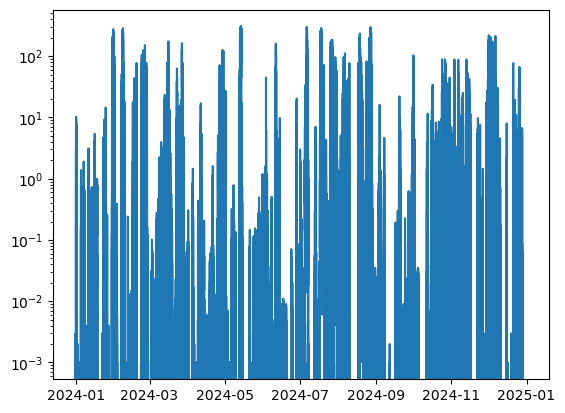

In [ ]:
plt.plot(slowdata_cleaned['PF_FC4'])
plt.yscale('log')

In [ ]:
BS_periods = find_consecutive_periods(slowdata_cleaned, SPC, threshold=0.001, duration='12h')
noBS_periods = find_consecutive_periods(slowdata_cleaned, SPC, threshold=0.0001, duration='12h', noBS=True)
with open('../events/BS_periods.pkl', 'wb') as f:
    pickle.dump(BS_periods, f)

with open('../events/noBS_periods.pkl', 'wb') as f:
    pickle.dump(noBS_periods, f)


In [ ]:
slowdata_cleaned

WD1     WD2     TA     RH  HS_Cor  SFTempK  SWdown1  \
TIMESTAMP                                                                      
2024-01-01 00:00:00  159.600  154.80 -13.39  48.54   1.686    252.0   115.20   
2024-01-01 00:01:00  157.600  154.50 -13.33  48.56   1.686    252.0   115.84   
2024-01-01 00:02:00  161.900  156.40 -13.36  48.39   1.686    252.0   115.58   
2024-01-01 00:03:00  164.000  159.70 -13.44  48.37   1.686    251.9   116.29   
2024-01-01 00:04:00  160.800  163.00 -13.47  48.66   1.686    251.9   116.68   
...                      ...     ...    ...    ...     ...      ...      ...   
2024-12-31 23:56:00    6.052   23.77 -11.02  88.40   1.653    262.5    37.73   
2024-12-31 23:57:00   92.700   76.68 -11.01  88.30   1.653    262.6    35.75   
2024-12-31 23:58:00   59.650   37.63 -10.99  88.40   1.653    262.5    37.00   
2024-12-31 23:59:00   65.720   57.51 -10.99  88.40   1.653    262.5    36.98   
2025-01-01 00:00:00   77.000   69.70 -10.98  88.30   1.653    262.5    37.47   

                     SWdown2  SWup1  SWup2  ...   SWdn  PF_FC4    WS_FC4  \
TIMESTAMP                                   ...                            
2024-01-01 00:00:00   120.17  61.51  63.83  ...  24.81     0.0  2.164167   
2024-01-01 00:01:00   121.10  61.92  64.21  ...  24.96     0.0  2.291111   
2024-01-01 00:02:00   120.97  61.42  64.89  ...  24.15     0.0  2.552778   
2024-01-01 00:03:00   121.63  61.99  65.07  ...  24.47     0.0  2.470833   
2024-01-01 00:04:00   121.89  62.41  66.12  ...  24.59     0.0  2.526389   
...                      ...    ...    ...  ...    ...     ...       ...   
2024-12-31 23:56:00    35.53  30.29  30.89  ...  40.41     0.0  5.656389   
2024-12-31 23:57:00    34.72  30.33  31.13  ...  39.17     0.0  1.941111   
2024-12-31 23:58:00    34.80  29.90  30.77  ...  40.17     0.0  3.155556   
2024-12-31 23:59:00    34.65  29.66  29.76  ...  40.26     0.0  4.444167   
2025-01-01 00:00:00    34.93  29.18  29.53  ...  40.97     0.0  4.757222   

                     WS1_Avg  WS2_Avg  WS1_Max  WS2_Max  WS1_Std  WS2_Std  \
TIMESTAMP                                                                   
2024-01-01 00:00:00    3.316    2.541    3.665    2.832    0.134    0.145   
2024-01-01 00:01:00    3.020    2.450    3.499    2.832    0.212    0.153   
2024-01-01 00:02:00    3.014    2.324    3.332    2.666    0.195    0.140   
2024-01-01 00:03:00    3.096    2.381    3.499    2.666    0.170    0.139   
2024-01-01 00:04:00    3.125    2.416    3.332    2.666    0.146    0.112   
...                      ...      ...      ...      ...      ...      ...   
2024-12-31 23:56:00    1.772    1.608    2.499    2.332    0.254    0.289   
2024-12-31 23:57:00    0.480    0.388    1.333    1.499    0.426    0.463   
2024-12-31 23:58:00    0.878    0.658    1.666    1.499    0.552    0.447   
2024-12-31 23:59:00    1.389    1.277    1.999    1.833    0.215    0.195   
2025-01-01 00:00:00    1.670    1.474    1.999    1.666    0.118    0.127   

                     Ri_b_surf  
TIMESTAMP                       
2024-01-01 00:00:00   0.046787  
2024-01-01 00:01:00   0.050716  
2024-01-01 00:02:00   0.056148  
2024-01-01 00:03:00   0.053650  
2024-01-01 00:04:00   0.051907  
...                        ...  
2024-12-31 23:56:00  -0.005348  
2024-12-31 23:57:00        NaN  
2024-12-31 23:58:00  -0.029347  
2024-12-31 23:59:00  -0.007792  
2025-01-01 00:00:00  -0.005676  

[527041 rows x 24 columns]

In [ ]:
for period in noBS_periods:
    start = period[0]- pd.Timedelta('12h')
    end = period[1]+pd.Timedelta('12h')
    fig,axes=plt.subplots(4,1, figsize=(10,8), sharex=True)
    axes[0].plot(slowdata_cleaned['PF_FC4'][start:end])
    axes[0].set_yscale('log')
    axes[1].plot(slowdata_cleaned['LWdown1'][start:end], label='LWdown1 192')
    axes[1].plot(slowdata_cleaned['LWdown2'][start:end], label='LWdown2 45')
    axes[2].plot(slowdata_cleaned['LWup1'][start:end], label='LWup1 192')
    axes[2].plot(slowdata_cleaned['LWup2'][start:end], label='LWup2 45')
    axes[3].plot(slowdata_cleaned['TA'][start:end], label='TA')
    axes[3].plot(slowdata_cleaned['SFTempK'][start:end]-273.15, linestyle='--', label='TSK')
    for ax in axes:
        ax.legend()
    plt.savefig(f'../plots/noBS_event_LW_{start.date()}_{end.date()}.png', bbox_inches='tight', dpi=300)
    plt.close()

/tmp/ipykernel_1084339/2975911743.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


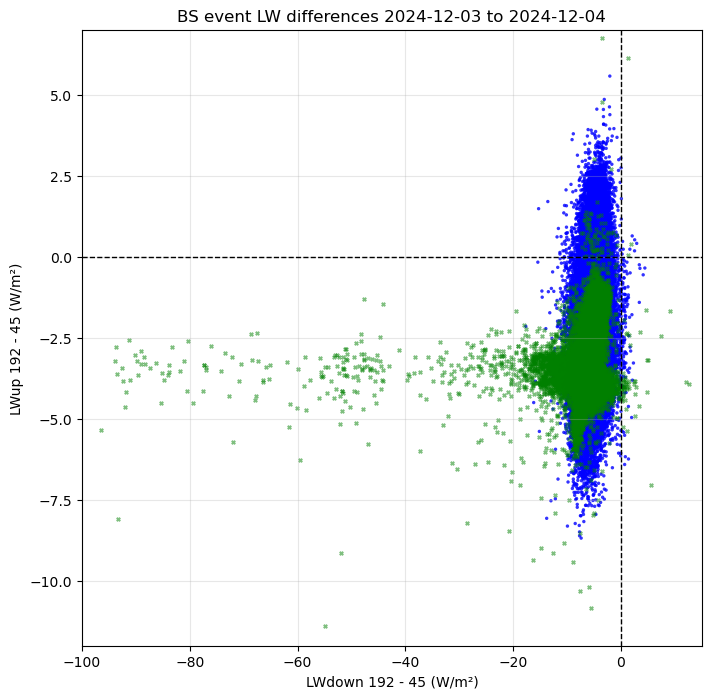

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(8,8), sharex=True)

for period in noBS_periods:
    start = period[0]
    end = period[1]
    if start > pd.Timestamp('2024-07-06 00:00') and start < pd.Timestamp('2024-07-14 00:00'):
        continue
    # prepare a distinct color for each noBS period (created once)
    if 'noBS_colors' not in globals():
        cmap = plt.cm.get_cmap('tab20', len(noBS_periods))
        noBS_colors = cmap(np.arange(len(noBS_periods)))
    idx = noBS_periods.index(period)
    ax.scatter(
        slowdata_cleaned['LWdown1'][start:end] - slowdata_cleaned['LWdown2'][start:end],
        slowdata_cleaned['LWup1'][start:end] - slowdata_cleaned['LWup2'][start:end],
        s=6, alpha=0.8, label=str(start.date()), color='blue', edgecolors='none' 
    )
    # plt.scatter(slowdata_cleaned['LWdown2'][start:end],
                # slowdata_cleaned['LWup2'][start:end], s=5, alpha=0.5, label='45', color='orange')    
    plt.xlabel('LWdown (W/m²)')
    plt.ylabel('LWup (W/m²)')
    plt.title(f'No BS event LW differences {start.date()} to {end.date()}')
    plt.grid(True, alpha=0.3)
# plt.show()

# fig, ax =plt.subplots(1,1, figsize=(8,8), sharex=True)

for period in BS_periods:
    start = period[0]
    end = period[1]
    plt.scatter(slowdata_cleaned['LWdown1'][start:end]-slowdata_cleaned['LWdown2'][start:end],
                slowdata_cleaned['LWup1'][start:end]-slowdata_cleaned['LWup2'][start:end], s=6, alpha=0.5, label=start, marker='x', color='green')
    # plt.scatter(slowdata_cleaned['LWdown2'][start:end],
                # slowdata_cleaned['LWup2'][start:end], s=5, alpha=0.5, label='45', color='orange')    
    plt.xlabel('LWdown 192 - 45 (W/m²)')
    plt.ylabel('LWup 192 - 45 (W/m²)')
    plt.title(f'BS event LW differences {start.date()} to {end.date()}')
    plt.grid(True, alpha=0.3)
# plt.legend()
ax.axvline(0, color='k', linestyle='--', linewidth=1, zorder=3)
ax.axhline(0, color='k', linestyle='--', linewidth=1, zorder=3)
plt.xlim(-100, 15)
plt.ylim(-12,7)
plt.show()



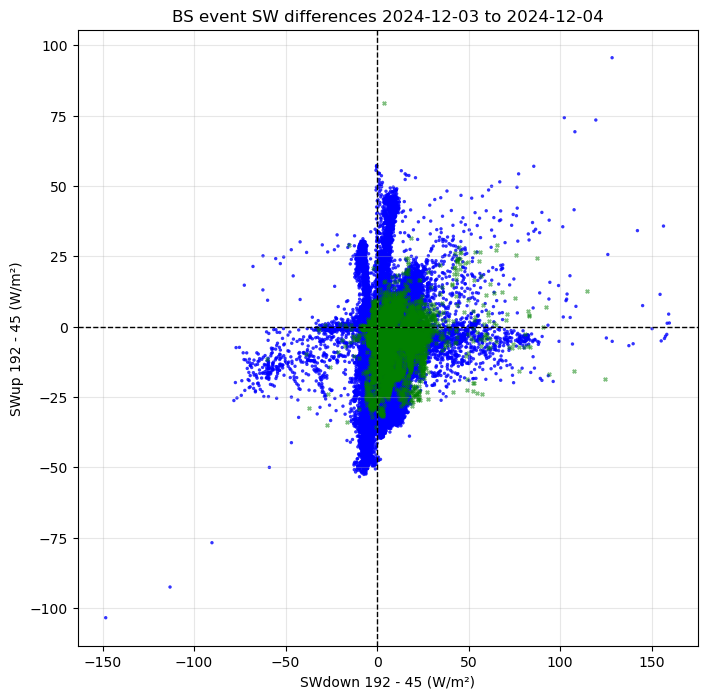

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(8,8), sharex=True)

for period in noBS_periods:
    start = period[0]
    end = period[1]
    if start > pd.Timestamp('2024-07-06 00:00') and start < pd.Timestamp('2024-07-14 00:00'):
        continue
    # prepare a distinct color for each noBS period (created once)
    if 'noBS_colors' not in globals():
        cmap = plt.cm.get_cmap('tab20', len(noBS_periods))
        noBS_colors = cmap(np.arange(len(noBS_periods)))
    idx = noBS_periods.index(period)
    ax.scatter(
        slowdata_cleaned['SWdown1'][start:end] - slowdata_cleaned['SWdown2'][start:end],
        slowdata_cleaned['SWup1'][start:end] - slowdata_cleaned['SWup2'][start:end],
        s=6, alpha=0.8, label=str(start.date()), color='blue', edgecolors='none' 
    )
    # plt.scatter(slowdata_cleaned['SWdown2'][start:end],
                # slowdata_cleaned['SWup2'][start:end], s=5, alpha=0.5, label='45', color='orange')    
    plt.xlabel('SWdown (W/m²)')
    plt.ylabel('SWup (W/m²)')
    plt.title(f'No BS event SW differences {start.date()} to {end.date()}')
    plt.grid(True, alpha=0.3)
# plt.show()

# fig, ax =plt.subplots(1,1, figsize=(8,8), sharex=True)

for period in BS_periods:
    start = period[0]
    end = period[1]
    plt.scatter(slowdata_cleaned['SWdown1'][start:end]-slowdata_cleaned['SWdown2'][start:end],
                slowdata_cleaned['SWup1'][start:end]-slowdata_cleaned['SWup2'][start:end], s=6, alpha=0.5, label=start, marker='x', color='green')
    # plt.scatter(slowdata_cleaned['SWdown2'][start:end],
                # slowdata_cleaned['SWup2'][start:end], s=5, alpha=0.5, label='45', color='orange')    
    plt.xlabel('SWdown 192 - 45 (W/m²)')
    plt.ylabel('SWup 192 - 45 (W/m²)')
    plt.title(f'BS event SW differences {start.date()} to {end.date()}')
    plt.grid(True, alpha=0.3)
# plt.legend()
ax.axvline(0, color='k', linestyle='--', linewidth=1, zorder=3)
ax.axhline(0, color='k', linestyle='--', linewidth=1, zorder=3)
# plt.xlim(-100, 15)
# plt.ylim(-12,7)
plt.show()


(<Figure size 1300x1800 with 10 Axes>,
 array([<Axes: ylabel='Temperature [$^o$C]'>,
        <Axes: ylabel='RH wrt ice [%]'>, <Axes: ylabel='Wind Direction'>,
        <Axes: ylabel='Wind Speed [ms$^{-1}$]'>,
        <Axes: ylabel='Net Radiation [Wm$^{-2}$]'>,
        <Axes: ylabel='Relative snow height [m]'>,
        <Axes: ylabel='Mass flux [gm$^{-2}$s$^{-1}$]'>,
        <Axes: ylabel='SHF [Wm$^{-2}$]'>, <Axes: ylabel='LE [Wm$^{-2}$]'>],
       dtype=object))

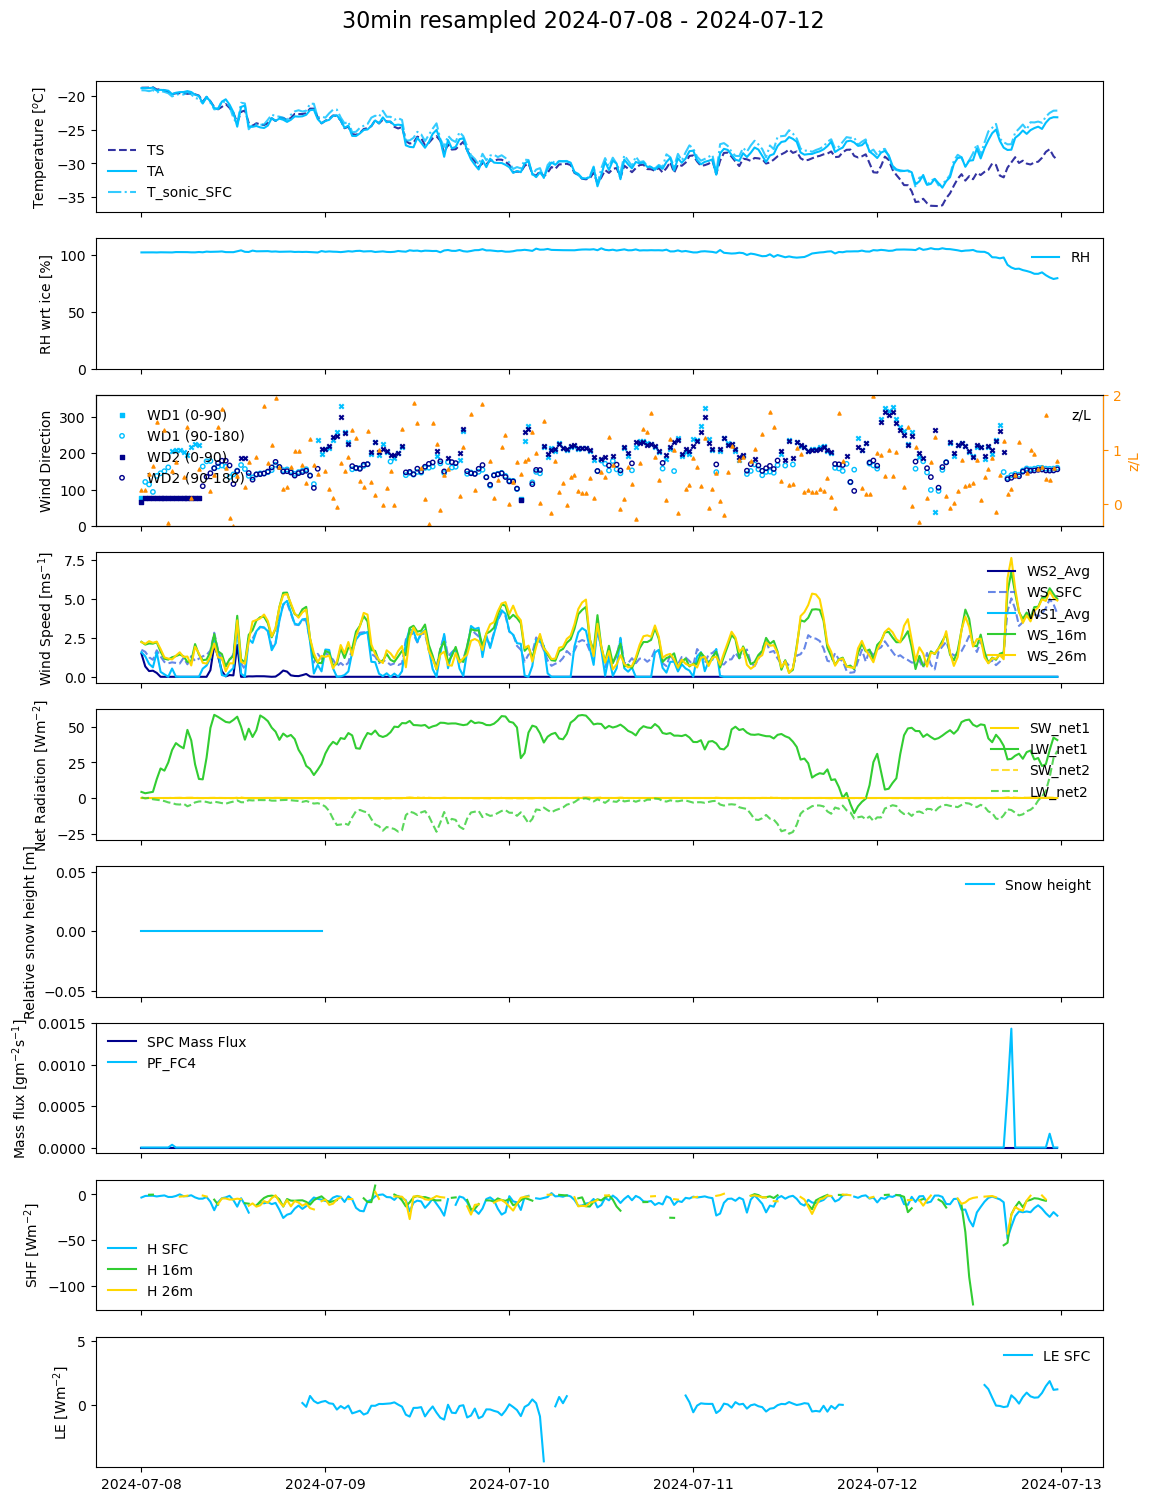

In [ ]:
start= '2024-07-08'
end='2024-07-12'
plot_SFC_slowdata_and_fluxes(slowdata_cleaned, fluxes_SFC, fluxes_16m, fluxes_26m, sensor, start, end, SPC=SPC, resample_time='30min', interpolate=True, interp_time='30min')


In [ ]:
slowdata_cleaned['PF_FC4'].attrs

{'units': {'TIMESTAMP': 'TS',
  'RECORD': 'RN',
  'rmcutcdate': nan,
  'rmcutctime': nan,
  'rmclatitude': nan,
  'rmclongitude': nan,
  'BattV_Min': 'Volts',
  'PTemp_Avg': 'degC',
  'PowerSPC': nan,
  'PowerLIC': nan,
  'PowerHtr': nan,
  'WD1': 'deg',
  'WD2': 'deg',
  'TA': 'degC',
  'RH': '%',
  'HS_Cor': 'm',
  'HS_Qty': nan,
  'SWdown1': 'W/m2',
  'SWup1': 'W/m2',
  'LWdown1': 'W/m2',
  'LWup1': 'W/m2',
  'SWdown2': 'W/m2',
  'SWup2': 'W/m2',
  'LWdown2': 'W/m2',
  'LWup2': 'W/m2',
  'SWdn': 'W/m2',
  'SensorT': 'degC',
  'PF_FC4': 'g/m2/s',
  'WS_FC4': 'km/h'},
 'units_wind': {'TIMESTAMP': 'TS',
  'RECORD': 'RN',
  'WS1_Avg': 'm/s',
  'WS1_Max': 'm/s',
  'WS1_Std': 'm/s',
  'WS2_Avg': 'm/s',
  'WS2_Max': 'm/s',
  'WS2_Std': 'm/s',
  'Ux_Avg': 'm/s',
  'Uy_Avg': 'm/s',
  'Uz_Avg': 'm/s',
  'Ts_Avg': 'degC',
  'Ux_Std': 'm/s',
  'Uy_Std': 'm/s',
  'Uz_Std': 'm/s',
  'Ts_Std': 'degC',
  'n_Tot': 'samples',
  'csat_warnings': 'samples',
  'LI_CO2m_Avg': 'mmol/m3',
  'LI_H2Om_Avg': 

In [ ]:
len(BS_periods)

29

In [ ]:
def check_log_profile(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, start, end, heights=[0,1.5,1.9,3.5,16,26], log=False):
    """
    Check the log profile for the slow data and fluxes.
    """
    fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharey=True)
    time_diff=pd.Timestamp(end) - pd.Timestamp(start)
    #Wind Speed Profile
    wind_speeds = [0, resample_with_threshold(slowdata['WS2_Avg'][start:end], time_diff, True).mean(), 
                   resample_with_threshold(fluxes_SFC['wind_speed'][start:end], time_diff, True).mean(),
                   resample_with_threshold(slowdata['WS1_Avg'][start:end], time_diff, True).mean(), 
                   resample_with_threshold(fluxes_16m['wind_speed'][start:end], time_diff, True).mean(), 
                   resample_with_threshold(fluxes_26m['wind_speed'][start:end], time_diff, True).mean()]
    axes[0].scatter(wind_speeds, heights, label='Wind Speed Data Points')
    if log:
        log_wind_speeds = np.log(wind_speeds[1:])  # Exclude the first zero value
        log_heights = np.log(heights[1:])  # Exclude the first zero value
        slope, intercept = np.polyfit(log_wind_speeds, log_heights, 1)
        fitted_heights = np.exp(intercept) * np.array(wind_speeds[1:])**slope
        axes[0].plot(wind_speeds[1:], fitted_heights, label=f'Fit: slope={slope:.2f}', color='red')
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')
    axes[0].set_xlabel('Wind Speed (m/s)')
    axes[0].set_ylabel('Height (m)')
    # axes[0].legend()
    axes[0].set_title('Wind Speed Profile')
    axes[0].set_xlim(0, 25)

    # Temperature Profile
    temperatures = [
        resample_with_threshold(slowdata['SFTempK'][start:end] - 273.15, time_diff, True).mean(),
        resample_with_threshold(slowdata['TA'][start:end], time_diff, True).mean(),
        resample_with_threshold(fluxes_SFC['sonic_temperature'][start:end]- 273.15, time_diff, True).mean(),
        resample_with_threshold(fluxes_16m['sonic_temperature'][start:end] - 273.15, time_diff, True).mean(),
        resample_with_threshold(fluxes_26m['sonic_temperature'][start:end] - 273.15, time_diff, True).mean()
    ]
    axes[1].scatter(temperatures, heights[:3] + heights[4:], label='Temperature Data Points')
    axes[1].set_xlabel('Temperature (°C)')
    # axes[1].legend()
    axes[1].set_title('Temperature Profile')
    axes[1].set_xlim(-30, 0)

    # Sensible Heat Flux Profile
    sensible_heat_fluxes = [
        resample_with_threshold(fluxes_SFC['H'][start:end], time_diff, True, '1h', 60).mean(),
        resample_with_threshold(fluxes_16m['H'][start:end], time_diff, True, '1h', 60).mean(),
        resample_with_threshold(fluxes_26m['H'][start:end], time_diff, True, '1h', 60).mean()
    ]
    axes[2].scatter(sensible_heat_fluxes, [heights[2]] + heights[4:], label='Sensible Heat Flux Data Points')
    axes[2].set_xlabel('Sensible Heat Flux (W/m²)')
    # axes[2].legend()
    axes[2].set_title('Sensible Heat Flux Profile')
    axes[2].set_xlim(-100, 50)

    # TKE Profile
    tke_fluxes = [
        resample_with_threshold(fluxes_SFC['TKE'][start:end], time_diff, True).mean(),
        resample_with_threshold(fluxes_16m['TKE'][start:end], time_diff, True).mean(),
        resample_with_threshold(fluxes_26m['TKE'][start:end], time_diff, True).mean()
    ]
    axes[3].scatter(tke_fluxes, [heights[2]] + heights[4:], label='TKE Data Points')
    axes[3].set_xlabel('TKE')
    # axes[3].legend()
    axes[3].set_title('TKE Profile')
    axes[3].set_xlim(0, 1)

    # TKE Profile
    tke_fluxes = [
        resample_with_threshold(fluxes_SFC['(z-d)/L'][start:end], time_diff, True).mean(),
        resample_with_threshold(fluxes_16m['(z-d)/L'][start:end], time_diff, True).mean(),
        resample_with_threshold(fluxes_26m['(z-d)/L'][start:end], time_diff, True).mean()
    ]
    axes[4].scatter(tke_fluxes, [heights[2]] + heights[4:], label='stability Data Points')
    axes[4].set_xlabel('stability')
    # axes[4].legend()
    axes[4].set_title('stability Profile')
    axes[4].set_xlim(-0.4, 2)

    plt.suptitle(f'Wind, Temperature, and Sensible Heat Flux Profiles from {start} to {end}', fontsize=16, y=0.97)
    plt.tight_layout()
    plt.savefig(f'./plots_specific_events/log_profile_{start}_to_{end}.png', bbox_inches='tight')
    plt.show()

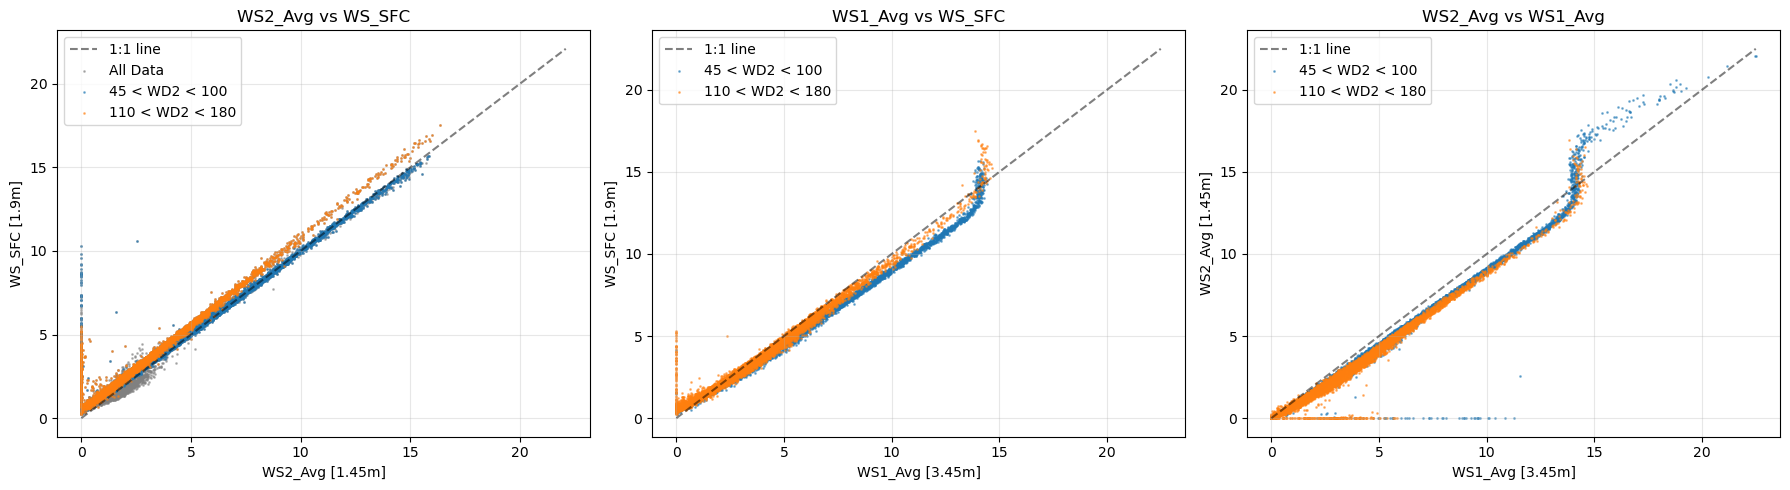

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Apply wind direction masks
ws2 = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '30min')
wsf = resample_with_threshold(fluxes_SFC['wind_speed'], '30min')
wd2 = resample_with_threshold(slowdata_cleaned['WD2'], '30min')
# Align the wind speed series
ws2, wsf = ws2.align(wsf, join='inner')
# Define min and max values for the 1:1 line
min_val = min(ws2.min(), wsf.min())
max_val = max(ws2.max(), wsf.max())
ws2_45_100 = ws2.where((wd2 > 45) & (wd2 < 100))
wsf_45_100 = wsf.where((wd2 > 45) & (wd2 < 100))
ws2_110_180 = ws2.where((wd2 > 110) & (wd2 < 180))
wsf_110_180 = wsf.where((wd2 > 110) & (wd2 < 180))
axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line', alpha=0.5)
axes[0].scatter(ws2, wsf, s=1, alpha=0.5, label='All Data', color='gray')
axes[0].scatter(ws2_45_100, wsf_45_100, s=1, alpha=0.5, label='45 < WD2 < 100')
axes[0].scatter(ws2_110_180, wsf_110_180, s=1, alpha=0.5, label='110 < WD2 < 180')
axes[0].set_xlabel('WS2_Avg [1.45m]')
axes[0].set_ylabel('WS_SFC [1.9m]')
axes[0].legend()
axes[0].set_title('WS2_Avg vs WS_SFC')

ws2 = resample_with_threshold(slowdata_cleaned['WS1_Avg'], '30min')
wsf = resample_with_threshold(fluxes_SFC['wind_speed'], '30min')
wd2 = resample_with_threshold(slowdata_cleaned['WD1'], '30min')
# Align the wind speed series
ws2, wsf = ws2.align(wsf, join='inner')
# Apply wind direction masks
ws2_45_100 = ws2.where((wd2 > 45) & (wd2 < 100))
wsf_45_100 = wsf.where((wd2 > 45) & (wd2 < 100))
ws2_110_180 = ws2.where((wd2 > 110) & (wd2 < 180))
wsf_110_180 = wsf.where((wd2 > 110) & (wd2 < 180))
# Define min and max values for the 1:1 line
min_val = min(ws2.min(), wsf.min())
max_val = max(ws2.max(), wsf.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line', alpha=0.5)
axes[1].scatter(ws2_45_100, wsf_45_100, s=1, alpha=0.5, label='45 < WD2 < 100')
axes[1].scatter(ws2_110_180, wsf_110_180, s=1, alpha=0.5, label='110 < WD2 < 180')
axes[1].set_xlabel('WS1_Avg [3.45m]')
axes[1].set_ylabel('WS_SFC [1.9m]')
axes[1].legend()
axes[1].set_title('WS1_Avg vs WS_SFC')

ws2 = resample_with_threshold(slowdata_cleaned['WS2_Avg'], '30min')
wsf = resample_with_threshold(slowdata_cleaned['WS1_Avg'], '30min')
wd2 = resample_with_threshold(slowdata_cleaned['WD1'], '30min')
# Align the wind speed series
ws2, wsf = ws2.align(wsf, join='inner')
# 1:1 line
min_val = min(ws2.min(), wsf.min())
# Apply wind direction masks
ws2_45_100 = ws2.where((wd2 > 45) & (wd2 < 100))
wsf_45_100 = wsf.where((wd2 > 45) & (wd2 < 100))
ws2_110_180 = ws2.where((wd2 > 110) & (wd2 < 180))
wsf_110_180 = wsf.where((wd2 > 110) & (wd2 < 180))
axes[2].plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line', alpha=0.5)
axes[2].scatter(wsf_45_100, ws2_45_100, s=1, alpha=0.5, label='45 < WD2 < 100')
axes[2].scatter(wsf_110_180, ws2_110_180, s=1, alpha=0.5, label='110 < WD2 < 180')
axes[2].set_xlabel('WS1_Avg [3.45m]')
axes[2].set_ylabel('WS2_Avg [1.45m]')
axes[2].legend()
axes[2].set_title('WS2_Avg vs WS1_Avg')

for ax in axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/engbers/Documents/PhD/Data/plots/12_ws_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import pickle

with open('events.pkl', 'wb') as f:
    pickle.dump(events, f)

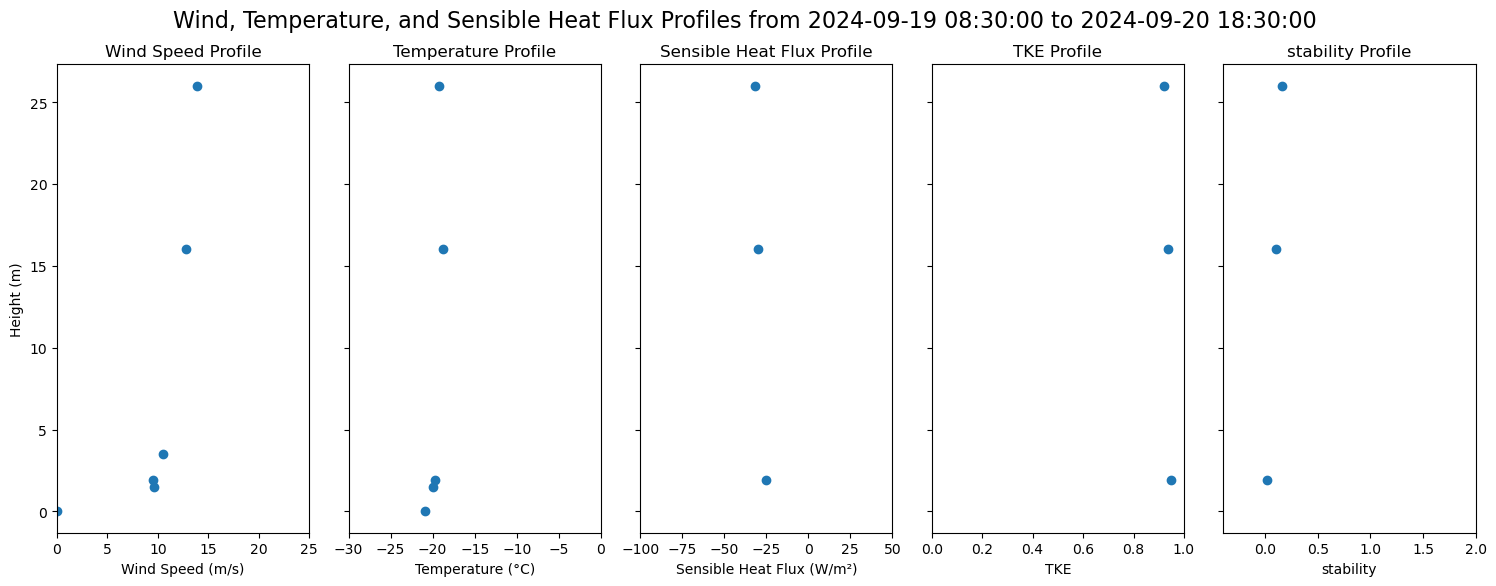

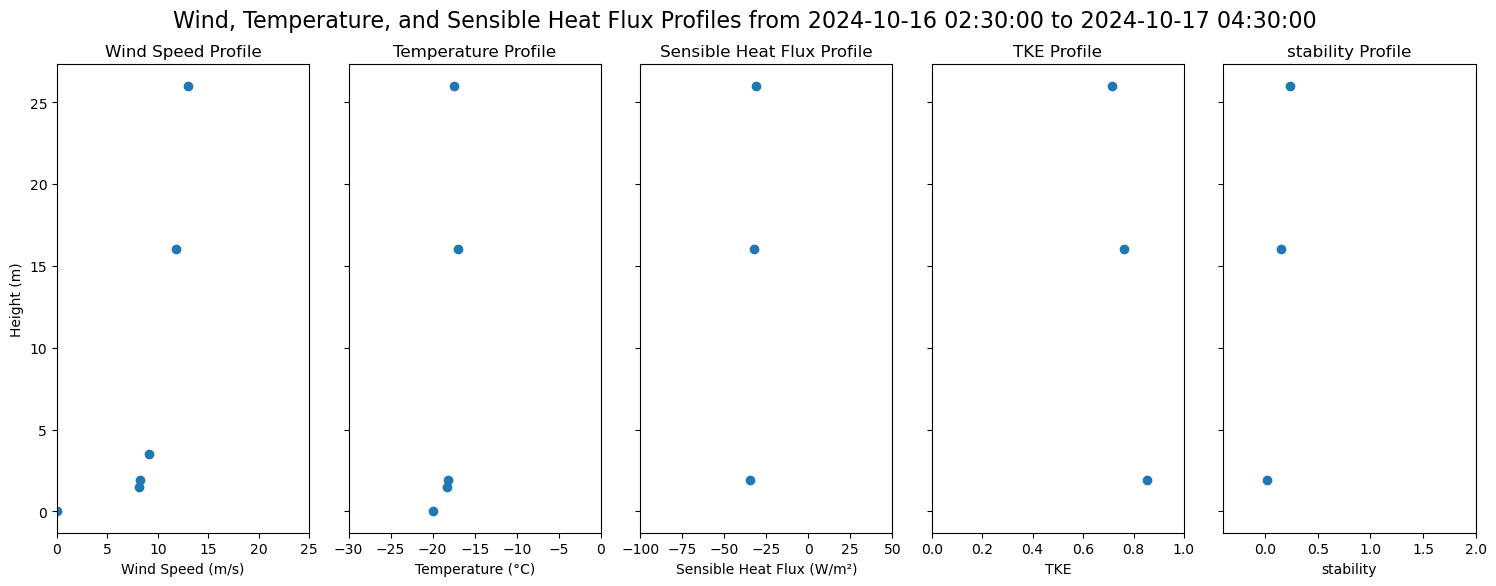

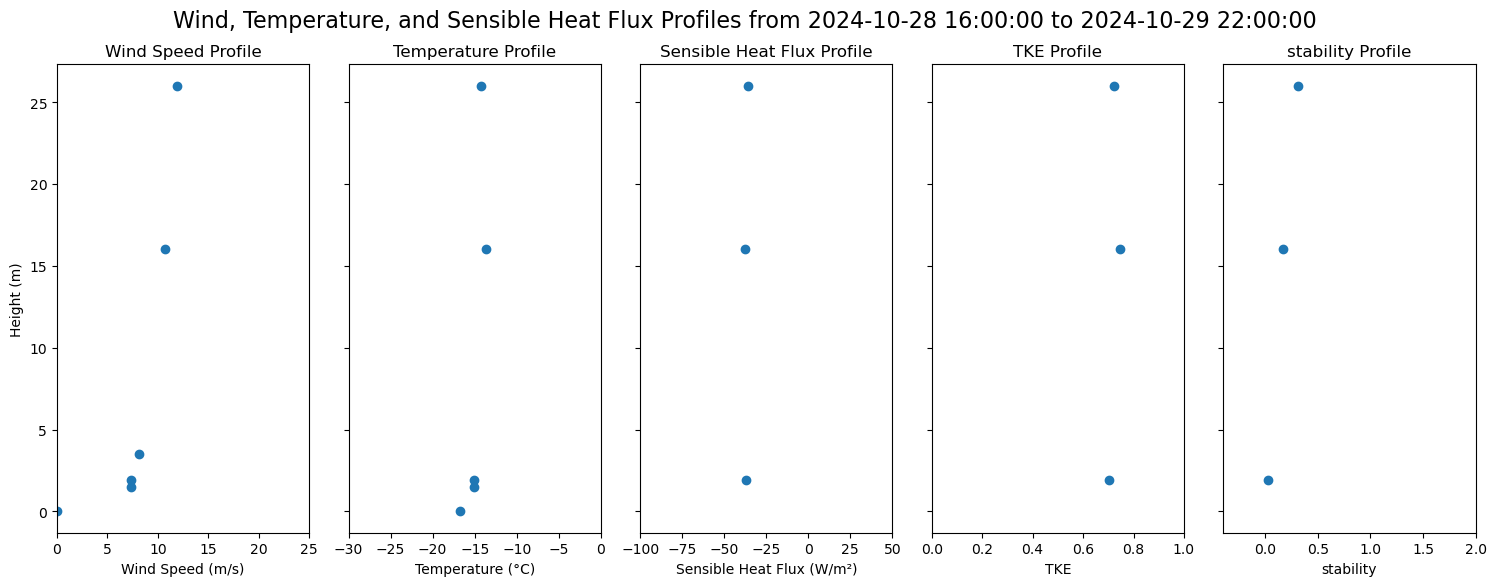

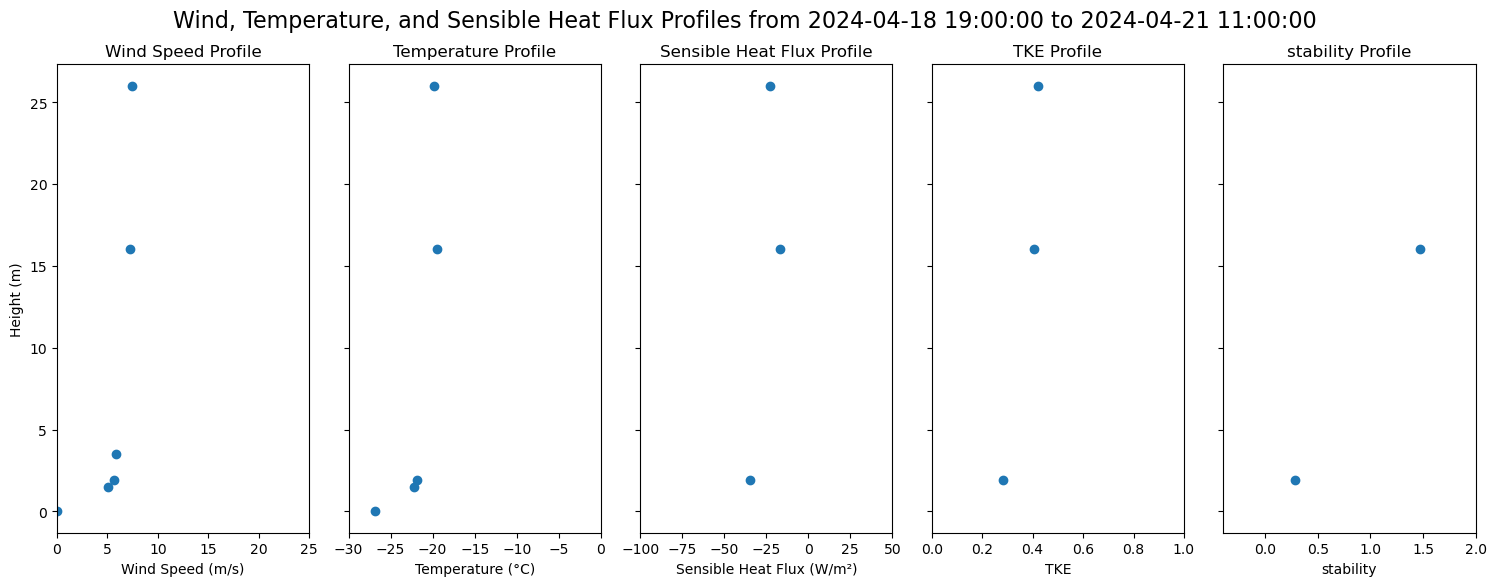

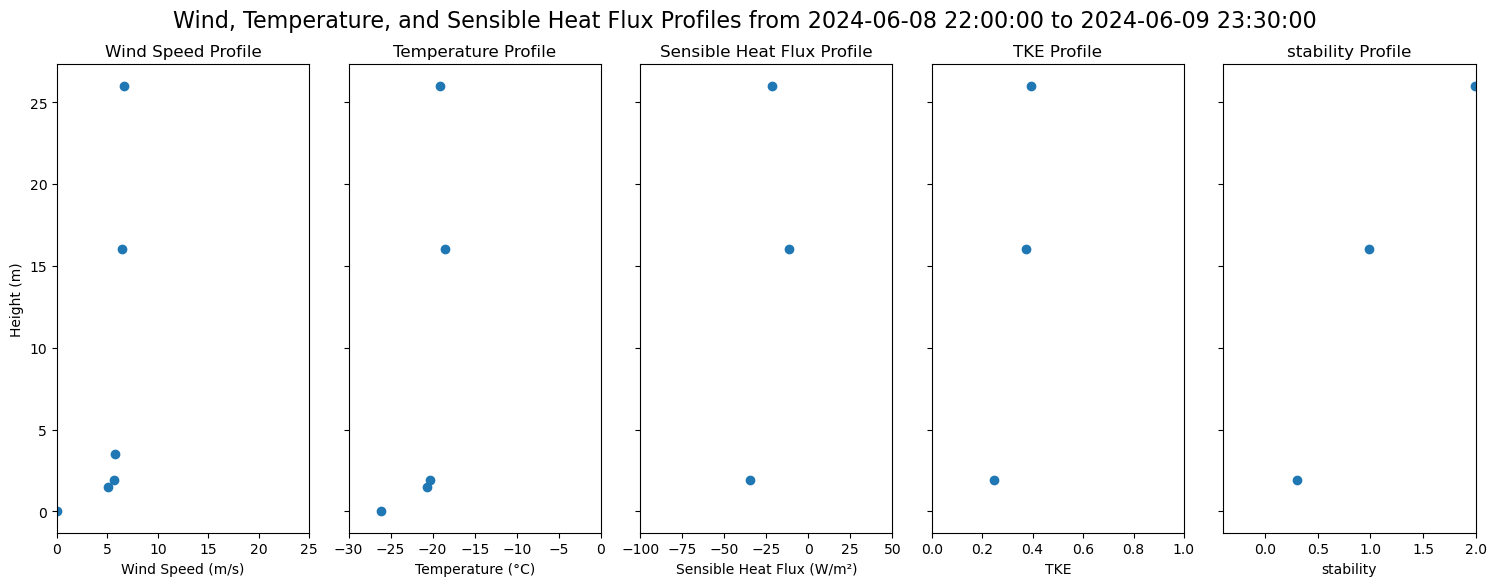

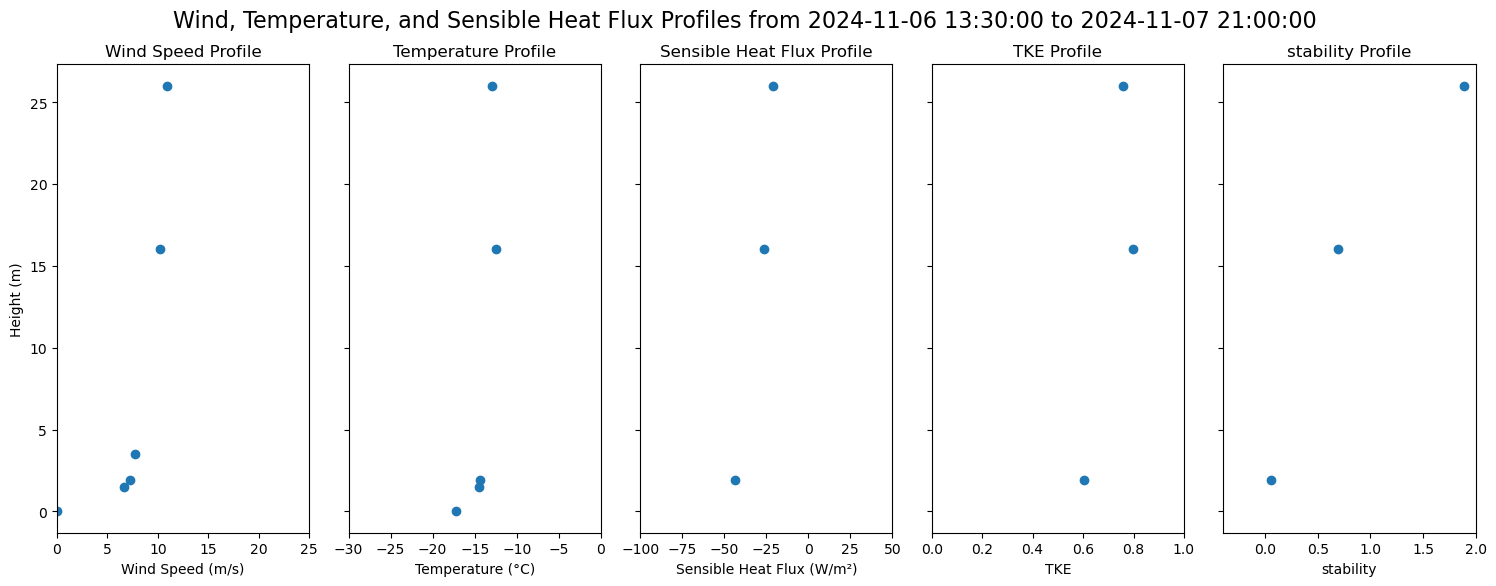

In [ ]:
from scipy.optimize import curve_fit

for start,end in events:
    check_log_profile(slowdata, fluxes_SFC, fluxes_16m_synced, fluxes_26m_synced, start, end, log=False)




In [ ]:
def check_log_profiles(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m,consecutive_days, heights=[0,2,3,16,26], log=False):
    """
    Check the log profile for the slow data and fluxes.
    """
    fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
    for start,end in consecutive_days:
        time_diff=pd.Timestamp(end) - pd.Timestamp(start)
        # Wind Speed Profile
        wind_speeds = [0, resample_with_threshold(slowdata['WS2_Avg'][start:end], time_diff, True).mean(), 
                    resample_with_threshold(slowdata['WS1_Avg'][start:end], time_diff, True).mean(), 
                    resample_with_threshold(fluxes_16m['wind_speed'][start:end], time_diff, True).mean(), 
                    resample_with_threshold(fluxes_26m['wind_speed'][start:end], time_diff, True).mean()]
        axes[0].scatter(wind_speeds, heights, label='Wind Speed Data Points')
        if log:
            log_wind_speeds = np.log(wind_speeds[1:])  # Exclude the first zero value
            log_heights = np.log(heights[1:])  # Exclude the first zero value
            slope, intercept = np.polyfit(log_wind_speeds, log_heights, 1)
            fitted_heights = np.exp(intercept) * np.array(wind_speeds[1:])**slope
            axes[0].plot(wind_speeds[1:], fitted_heights, label=f'Fit: slope={slope:.2f}', color='red')
            axes[0].set_xscale('log')
            axes[0].set_yscale('log')
        axes[0].set_xlabel('Wind Speed (m/s)')
        axes[0].set_ylabel('Height (m)')
        # axes[0].legend()
        axes[0].set_title('Wind Speed Profile')

        # Temperature Profile
        temperatures = [
            resample_with_threshold(slowdata['SFTempK'][start:end] - 273.15, time_diff, True).mean(),
            resample_with_threshold(slowdata['TA'][start:end], time_diff, True).mean(),
            resample_with_threshold(fluxes_16m['sonic_temperature'][start:end] - 273.15, time_diff, True).mean(),
            resample_with_threshold(fluxes_26m['sonic_temperature'][start:end] - 273.15, time_diff, True).mean()
        ]
        axes[1].scatter(temperatures, heights[:2] + heights[3:], label='Temperature Data Points')
        axes[1].set_xlabel('Temperature (°C)')
        # axes[1].legend()
        axes[1].set_title('Temperature Profile')

        # Sensible Heat Flux Profile
        sensible_heat_fluxes = [
            resample_with_threshold(fluxes_SFC['H'][start:end], time_diff, True).mean(),
            resample_with_threshold(fluxes_16m['H'][start:end], time_diff, True).mean(),
            resample_with_threshold(fluxes_26m['H'][start:end], time_diff, True).mean()
        ]
        axes[2].scatter(sensible_heat_fluxes, [heights[1]] + heights[3:], label='Sensible Heat Flux Data Points')
        axes[2].set_xlabel('Sensible Heat Flux (W/m²)')
        # axes[2].legend()
        axes[2].set_title('Sensible Heat Flux Profile')

        # TKE Profile
        tke_fluxes = [
            resample_with_threshold(fluxes_SFC['TKE'][start:end], time_diff, True).mean(),
            resample_with_threshold(fluxes_16m['TKE'][start:end], time_diff, True).mean(),
            resample_with_threshold(fluxes_26m['TKE'][start:end], time_diff, True).mean()
        ]
        axes[3].scatter(tke_fluxes, [heights[1]] + heights[3:], label='TKE Data Points')
        axes[3].set_xlabel('TKE')
        # axes[3].legend()
        axes[3].set_title('TKE Profile')

        plt.suptitle(f'Wind, Temperature, and Sensible Heat Flux Profiles from {start} to {end}', fontsize=16, y=0.97)
    plt.tight_layout()
    plt.savefig(f'./plots/log_profile_{start}_to_{end}.png', bbox_inches='tight')
    plt.show()

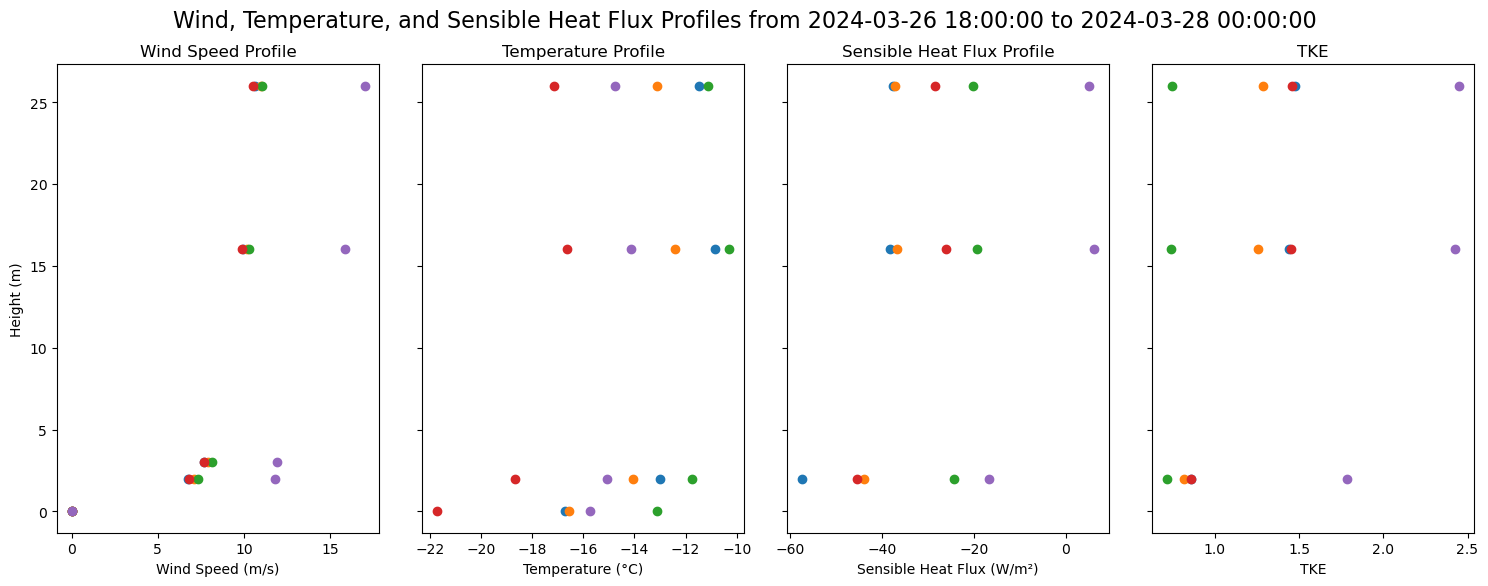

In [ ]:
from scipy.optimize import curve_fit

check_log_profiles(slowdata, fluxes_SFC, fluxes_16m, fluxes_26m, consecutive_periods[0:5], log=False)
plt.show()

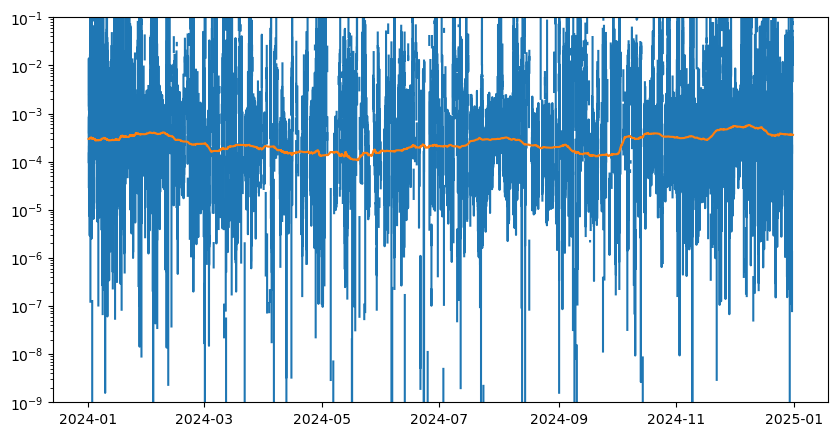

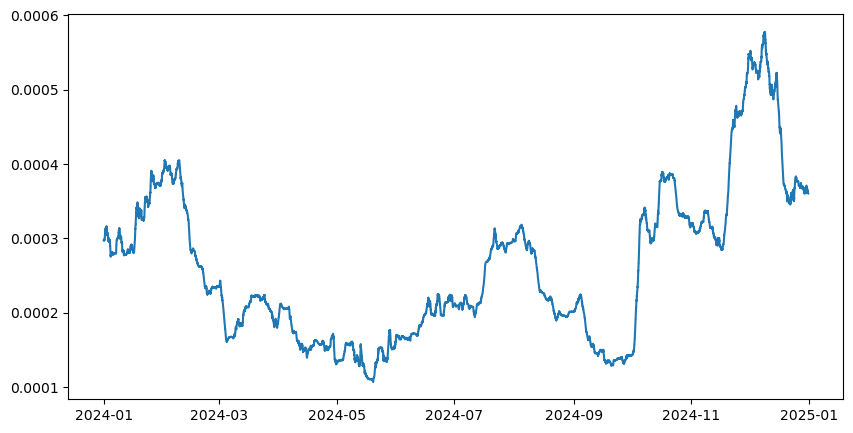

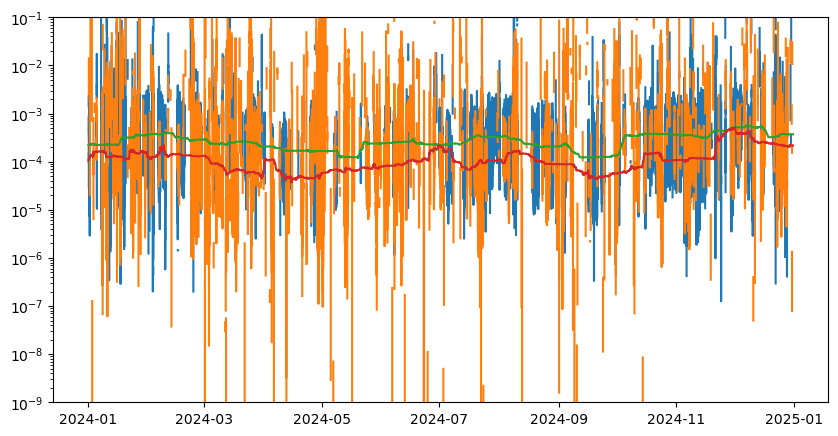

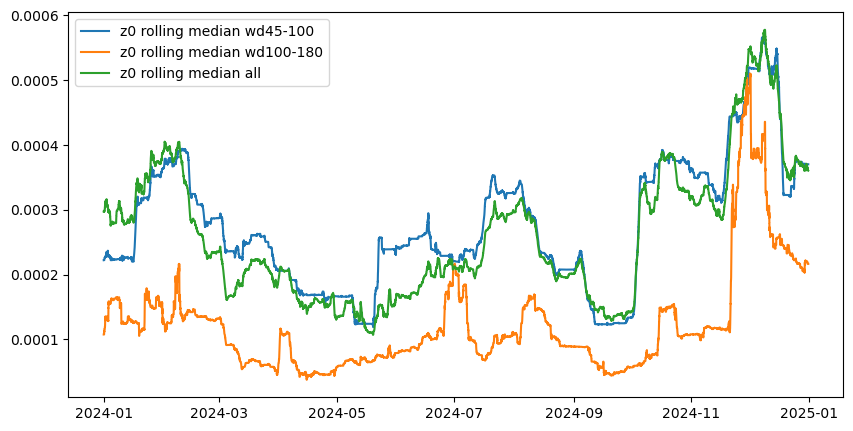

In [ ]:
wd_mask= (resample_with_threshold(slowdata_cleaned['WD1'], '3min') > 45) & (resample_with_threshold(slowdata_cleaned['WD1'], '3min') < 100)
z0wd45, z0rollingwd45=compute_roughness_length(fluxes_SFC.where(wd_mask), fluxes_SFC_qc, 1.9)
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc, 1.9)
plt.figure(figsize=(10, 5))
plt.plot(z0)
plt.plot(z0rolling, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rolling, label='z0 rolling median')
wd_mask= (resample_with_threshold(slowdata_cleaned['WD1'], '3min') > 100) & (resample_with_threshold(slowdata_cleaned['WD1'], '3min') < 180)
z0wd100, z0rollingwd100=compute_roughness_length(fluxes_SFC.where(wd_mask), fluxes_SFC_qc, 1.9)
plt.figure(figsize=(10, 5))
plt.plot(z0wd45, label='z0 wd 45 rolling median')
plt.plot(z0wd100, label='z0 wd 100 rolling median')
plt.plot(z0rollingwd45, label='z0 rolling median')
plt.plot(z0rollingwd100, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rollingwd45, label='z0 rolling median wd45-100')
plt.plot(z0rollingwd100, label='z0 rolling median wd100-180')
plt.plot(z0rolling, label='z0 rolling median all')
plt.savefig('/home/engbers/Documents/PhD/Data/plots/15_roughness_lengths_WD.png', dpi=300)
plt.legend()

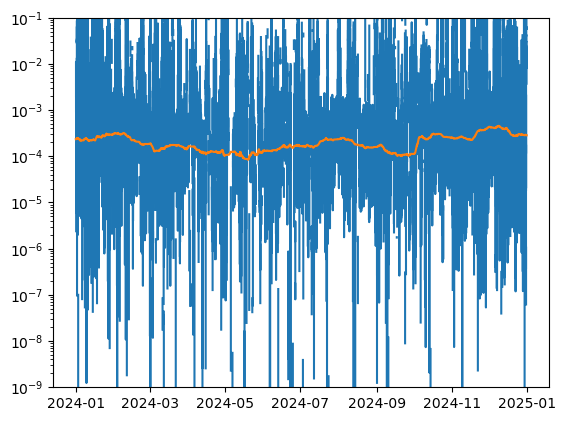

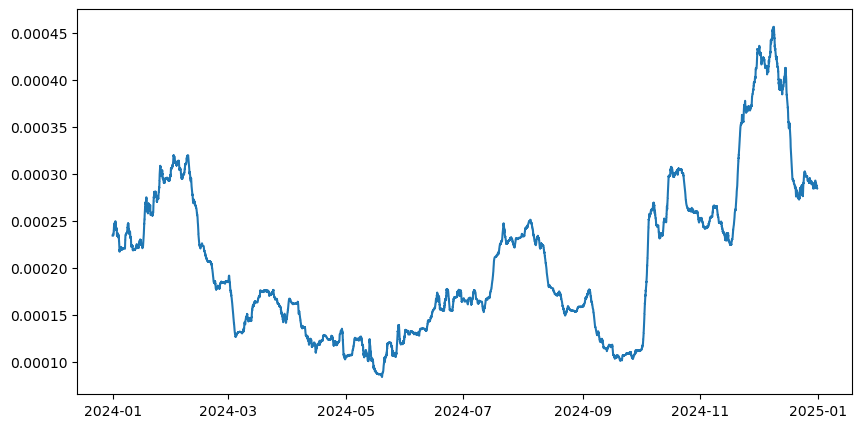

In [ ]:
z0, z0rolling=compute_roughness_length(fluxes_SFC, fluxes_SFC_qc, 1.5)
plt.plot(z0)
plt.plot(z0rolling, label='z0 rolling median')
plt.yscale('log')
plt.ylim(1e-9, 1e-1)
plt.figure(figsize=(10, 5))
plt.plot(z0rolling, label='z0 rolling median')

In [ ]:
def rolling_median(data, column_name='HS_Cor', window='1D', max_value=None):
    """
    Function to despike snow height data using a one-day moving median filter.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing snow height data.
    - column_name (str): The name of the column containing snow height data.
    
    Returns:
    - pd.Series: The despiked snow height data.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Apply a one-day moving median filter
    median_filtered = data[column_name].rolling(window=window, center=True, min_periods=1).median()
    if max_value is not None:
        # Remove values above 2m
        median_filtered[median_filtered > max_value] = np.nan
        # Interpolate NaN values
        median_filtered = median_filtered.interpolate(method='linear', limit_direction='both')
    return median_filtered

In [ ]:
import glob
folder='/home/engbers/Documents/PhD/EC_data_convert/SFC/202403/'
fastdata_list = []
units_metadata = {}

for file in sorted(glob.glob(folder + '*.dat')):
    temp_data = pd.read_csv(
        file,
        sep='\t',
        index_col=0,
        header=0,
        low_memory=False,
        na_values=['NaN'])
    temp_data.index = pd.to_datetime(temp_data.index, errors='coerce', format='mixed')
    dropped_row = temp_data.iloc[0]  # Extract the first row as metadata
    temp_data = temp_data.iloc[1:]  # Remove the first row from the data
    units_metadata[file] = dropped_row.to_dict()  # Store metadata in a dictionary
    
    # Convert all columns to numeric
    temp_data = temp_data.apply(pd.to_numeric, errors='coerce')
    
    fastdata_list.append(temp_data)  # Add the cleaned DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
fastdata = pd.concat(fastdata_list, ignore_index=False)

# Print the resulting DataFrame
print(fastdata)

                              Ux       Uy       Uz        Ts  LI_H2Om  LI_Pres
2024-03-01 00:00:00.000  0.48250 -2.40475  0.21900 -20.63008     35.9   1831.0
2024-03-01 00:00:00.100  0.24375 -2.55500  0.21825 -20.75847     36.6   1805.0
2024-03-01 00:00:00.200  0.18450 -2.35725  0.08550 -20.63641     36.4   1834.0
2024-03-01 00:00:00.300  0.45625 -2.39325  0.15050 -20.66336     36.1   1860.0
2024-03-01 00:00:00.400  0.66725 -2.33725  0.10750 -20.62689     36.1   1829.0
...                          ...      ...      ...       ...      ...      ...
2024-03-31 23:59:59.500  1.15900 -3.25900  0.14600 -22.77211     20.6   2065.0
2024-03-31 23:59:59.600  1.34400 -3.01650 -0.00975 -22.53528     20.7   2065.0
2024-03-31 23:59:59.700  1.12675 -2.96000 -0.05600 -22.51001     21.2   2089.0
2024-03-31 23:59:59.800  0.71775 -2.75525 -0.08900 -22.49261     20.9   2091.0
2024-03-31 23:59:59.900  1.11875 -2.67950 -0.04650 -22.50684     21.1   2065.0

[26784000 rows x 6 columns]


In [ ]:
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(fastdata)


Double rotation for blocks of 0 days 00:30:00


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/1000000 [09:43<01:20, 1504.87it/s]


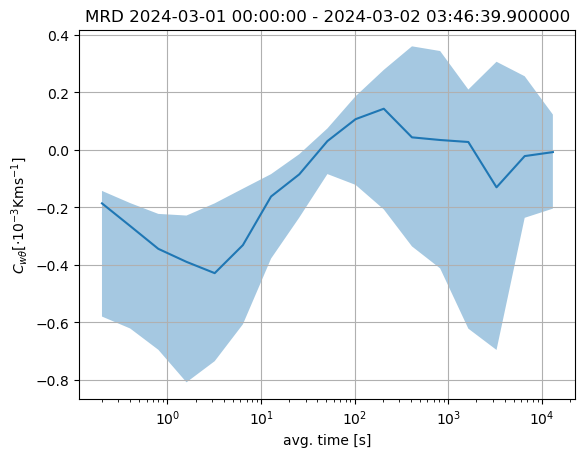

In [ ]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[0:1000000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/999999 [08:24<01:10, 1739.83it/s]


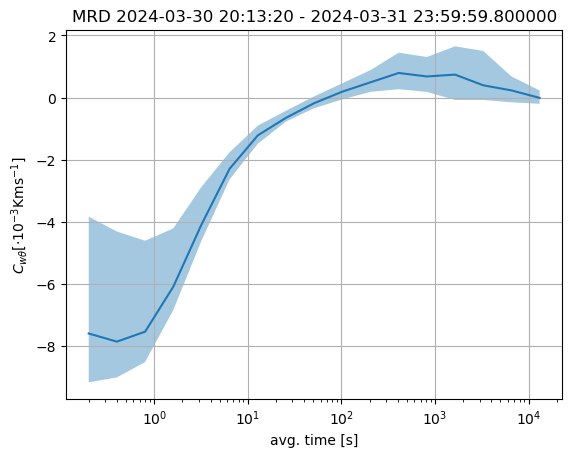

In [ ]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[-1000000:-1], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 92%|█████████▏| 1376235/1500000 [20:17<01:49, 1130.60it/s]


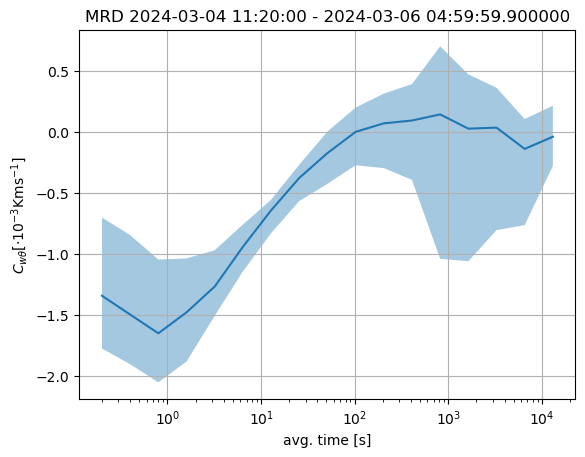

In [ ]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[3000000:4500000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

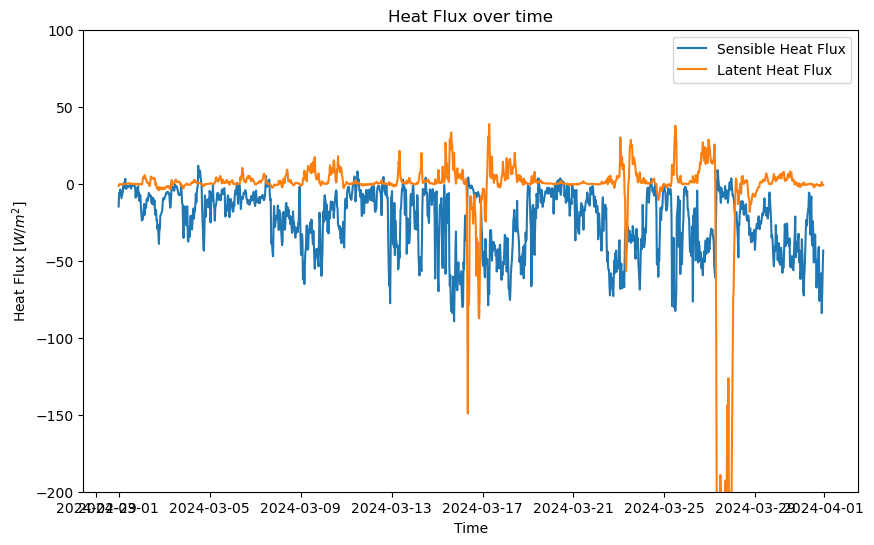

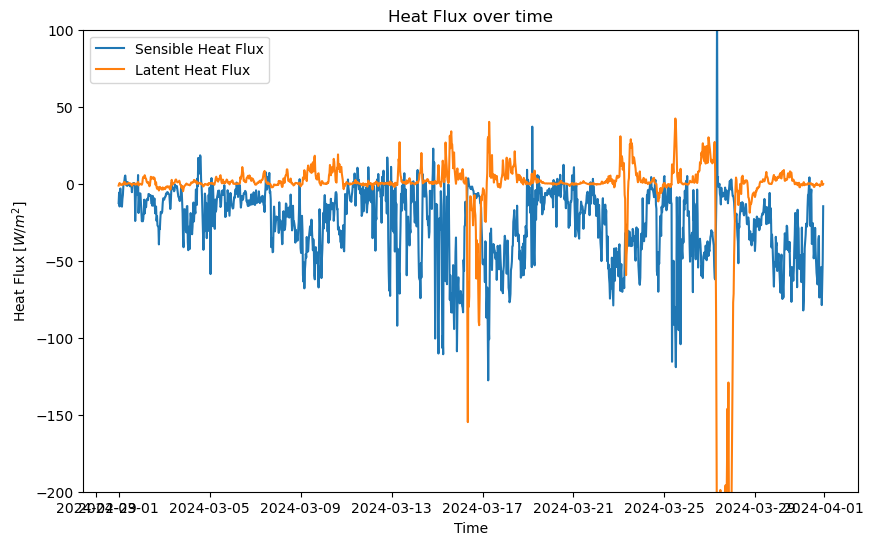

In [ ]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '30s', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '10min', plot=True)